<a href="https://colab.research.google.com/github/kamalatha/Bootcamp/blob/main/Kamalatha__4SN23AE013_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DATE Header.jpg](attachment:358b734d-ea3a-4aaf-a4f3-f8b4818840f7.jpg)

# Instructor: PRASHANTH KANNADAGULI

## DEEP LEARNING Internship: Mini-Project 3

## Prediction of Weather Parameters using Recurrent Neural Networks

## Part 1: Data Loading, Exploration, and EDA

#### Import required Libraries

In [ ]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, TimeDistributed

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("Libraries Imported Successfully")

Libraries Imported Successfully


#### Loading the Dataset: Load the weather.csv dataset into a pandas DataFrame. Display the first 5 rows to verify successful loading.

In [ ]:
#Loading the Dataset
try:
    # Attempt to load the dataset (adjust 'weather.csv' if the path/name is different)
    df = pd.read_csv('weather.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the DataFrame:")
    display(df.head()) # Use display() in Colab/Jupyter for better rendering
except FileNotFoundError:
    print("Error: 'weather.csv' not found. Please ensure the file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.
First 5 rows of the DataFrame:


date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

#### Initial Inspection: Display the last 5 rows of the DataFrame and print the total number of rows and columns to understand the dataset's size and structure.

In [ ]:
#Initial Inspection
if 'df' in locals(): # Check if df was loaded successfully
    print("Last 5 rows of the DataFrame:")
    display(df.tail())
    print("\nDataset Size and Structure:")
    print(f"Total number of rows: {df.shape[0]}")
    print(f"Total number of columns: {df.shape[1]}")
else:
    print("DataFrame 'df' not available. Please load the data first.")

Last 5 rows of the DataFrame:


date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun


Dataset Size and Structure:
Total number of rows: 1461
Total number of columns: 6


#### Column Names and Data Types: Print the names of all columns in the DataFrame. Then, check and display the data type of each column. Are the data types appropriate for numerical analysis and time series processing?

In [ ]:
#Column Names and Data Types
if 'df' in locals():
    print("Column Names:")
    print(list(df.columns))
    print("\nData Types of each column:")
    print(df.dtypes)

    # Analysis of data types
    print("\nAnalysis of Data Types Suitability:")
    # Example check: Assuming 'date' column exists and needs conversion
    if 'date' in df.columns and df['date'].dtype == 'object':
        print("- 'date' column is of type 'object'. It should ideally be converted to datetime for time series analysis.")
        # Attempt conversion (optional here, but good practice for later)
        try:
            df['date'] = pd.to_datetime(df['date'])
            print("  - Successfully converted 'date' column to datetime objects.")
            # Set date as index (common for time series)
            # df.set_index('date', inplace=True)
            # print("  - Set 'date' column as the DataFrame index.")
        except Exception as e:
            print(f"  - Could not convert 'date' to datetime: {e}")
    elif 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
         print("- 'date' column is already in a datetime format.")
         # Optionally set as index if not done
         # if df.index.name != 'date':
         #     df.set_index('date', inplace=True)
         #     print("  - Set 'date' column as the DataFrame index.")

    # Check numerical columns (assuming standard weather names)
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    all_numerical_ok = True
    for col in numerical_cols:
        if col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                print(f"- '{col}' column is of type {df[col].dtype}, which is appropriate for numerical analysis.")
            else:
                print(f"- '{col}' column is of type {df[col].dtype}. Needs conversion to numeric for analysis/modeling.")
                all_numerical_ok = False
        else:
             print(f"- Expected numerical column '{col}' not found in the DataFrame.")
             all_numerical_ok = False # Treat missing column as not OK

    if all_numerical_ok:
        print("- All expected numerical columns have appropriate data types.")
    else:
        print("- One or more numerical columns might require inspection or conversion.")
else:
    print("DataFrame 'df' not available.")

Column Names:
['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

Data Types of each column:
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

Analysis of Data Types Suitability:
- 'date' column is of type 'object'. It should ideally be converted to datetime for time series analysis.
  - Successfully converted 'date' column to datetime objects.
- 'precipitation' column is of type float64, which is appropriate for numerical analysis.
- 'temp_max' column is of type float64, which is appropriate for numerical analysis.
- 'temp_min' column is of type float64, which is appropriate for numerical analysis.
- 'wind' column is of type float64, which is appropriate for numerical analysis.
- All expected numerical columns have appropriate data types.


#### Check Dataset Shape: Print the number of rows and columns in the DataFrame.

In [ ]:
#Check Dataset Shape
if 'df' in locals():
    print("DataFrame Shape (rows, columns):")
    print(df.shape)
else:
    print("DataFrame 'df' not available.")

DataFrame Shape (rows, columns):
(1461, 6)


#### Get Data Information: Display concise information about the DataFrame, including the index dtype, column dtypes, and non-null values.

In [ ]:
#Get Data Information
if 'df' in locals():
    print("Concise summary of the DataFrame:")
    df.info()
else:
    print("DataFrame 'df' not available.")

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


#### Check for Missing Values (Count): Check if there are any missing values in each column and display the count of missing values per column.

In [ ]:
#Check for Missing Values (Count)
if 'df' in locals():
    print("Count of missing values per column:")
    missing_counts = df.isnull().sum()
    print(missing_counts)
    if missing_counts.sum() == 0:
        print("\nNo missing values found in the dataset.")
    else:
        print("\nMissing values found. See counts above.")
else:
    print("DataFrame 'df' not available.")

Count of missing values per column:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

No missing values found in the dataset.


#### Check for Missing Values (Percentage): Calculate and display the percentage of missing values for each column.

In [ ]:
#Check for Missing Values (Percentage)
if 'df' in locals():
    print("Percentage of missing values per column:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)
    if missing_percentage.sum() == 0:
        print("\nNo missing values found in the dataset.")
    else:
        print("\nMissing values found. See percentages above.")
else:
    print("DataFrame 'df' not available.")

Percentage of missing values per column:
date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64

No missing values found in the dataset.


#### Handle Missing Values (If Any):
Based on the previous checks, if missing values were found, write comments explaining how you would choose to handle them in this time series context (e.g., imputation, dropping).

In [ ]:
#Handle Missing Values (If Any)

# Comments on handling missing values:
# Based on the previous checks, if missing values were found, here's how they could be handled:
# 1. Imputation (Recommended for Time Series):
#    - Forward Fill (fillna(method='ffill')): Uses the last known value. Good if values don't change drastically between steps.
#    - Backward Fill (fillna(method='bfill')): Uses the next known value.
#    - Interpolation (interpolate()): Estimates missing values based on surrounding points (linear, polynomial, etc.). Often a good choice.
#    - Mean/Median/Mode Imputation: Generally less suitable for time series as it ignores the temporal dependence, but could be used if missingness is random and low.
# 2. Dropping:
#    - Drop Rows (dropna()): If the percentage of missing values is very small, dropping rows might be acceptable, but it disrupts the time sequence. Be cautious.
#    - Drop Columns (drop()): If a column has a very high percentage of missing values and isn't crucial, dropping it might be an option.

# Example Implementation (using forward fill):
if 'df' in locals() and df.isnull().sum().sum() > 0:
    print("Handling missing values using Forward Fill (ffill)...")
    # Identify numerical columns to fill (adjust if needed)
    numerical_cols_to_fill = ['precipitation', 'temp_max', 'temp_min', 'wind']
    # Ensure columns exist before trying to fill
    cols_exist = [col for col in numerical_cols_to_fill if col in df.columns]
    if cols_exist:
        df[cols_exist] = df[cols_exist].fillna(method='ffill')
        # Optional: Check if any NaNs remain (e.g., at the beginning) and backward fill
        if df[cols_exist].isnull().sum().sum() > 0:
            print("Forward fill left some NaNs (likely at the start), applying Backward Fill (bfill)...")
            df[cols_exist] = df[cols_exist].fillna(method='bfill')
        print("Missing values handled.")
        print("\nMissing values count after handling:")
        print(df.isnull().sum())
    else:
        print("Warning: None of the specified numerical columns found for filling.")

elif 'df' in locals():
    print("No missing values needed handling.")
else:
    print("DataFrame 'df' not available.")

No missing values needed handling.


#### Get Descriptive Statistics:
Generate descriptive statistics for the numerical columns (precipitation, temp_max, temp_min, wind).

In [ ]:
#Get Descriptive Statistics
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    # Ensure columns exist
    cols_exist = [col for col in numerical_cols if col in df.columns]
    if cols_exist:
        print("Descriptive statistics for numerical columns:")
        display(df[cols_exist].describe())
    else:
        print("Warning: None of the specified numerical columns found for descriptive statistics.")
else:
    print("DataFrame 'df' not available.")

Descriptive statistics for numerical columns:


precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

#### Extract Specific Statistics:
From the descriptive statistics, identify and print the minimum, maximum, and average values for temp_max and temp_min.

In [ ]:
#Extract Specific Statistics
if 'df' in locals() and 'temp_max' in df.columns and 'temp_min' in df.columns:
    desc_stats = df[['temp_max', 'temp_min']].describe()
    print("Specific statistics for temp_max and temp_min:")
    print(f"Temp Max - Min: {desc_stats.loc['min', 'temp_max']:.2f}")
    print(f"Temp Max - Max: {desc_stats.loc['max', 'temp_max']:.2f}")
    print(f"Temp Max - Average (Mean): {desc_stats.loc['mean', 'temp_max']:.2f}")
    print(f"Temp Min - Min: {desc_stats.loc['min', 'temp_min']:.2f}")
    print(f"Temp Min - Max: {desc_stats.loc['max', 'temp_min']:.2f}")
    print(f"Temp Min - Average (Mean): {desc_stats.loc['mean', 'temp_min']:.2f}")
elif 'df' in locals():
    print("Warning: 'temp_max' or 'temp_min' column not found.")
else:
    print("DataFrame 'df' not available.")

Specific statistics for temp_max and temp_min:
Temp Max - Min: -1.60
Temp Max - Max: 35.60
Temp Max - Average (Mean): 16.44
Temp Min - Min: -7.10
Temp Min - Max: 18.30
Temp Min - Average (Mean): 8.23


#### Calculate Variance and Standard Deviation:
Calculate and print the variance and standard deviation for all numerical columns.

In [ ]:
#Calculate Variance and Standard Deviation
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    cols_exist = [col for col in numerical_cols if col in df.columns]
    if cols_exist:
        print("Variance for numerical columns:")
        print(df[cols_exist].var())
        print("\nStandard Deviation for numerical columns:")
        print(df[cols_exist].std())
    else:
        print("Warning: None of the specified numerical columns found.")
else:
    print("DataFrame 'df' not available.")

Variance for numerical columns:
precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

Standard Deviation for numerical columns:
precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64


#### Visualize Distributions (Histograms):
Plot a histogram for each of the four numerical columns (precipitation, temp_max, temp_min, wind) to visualize their distribution. Use a suitable number of bins.

Visualizing distributions (Histograms):


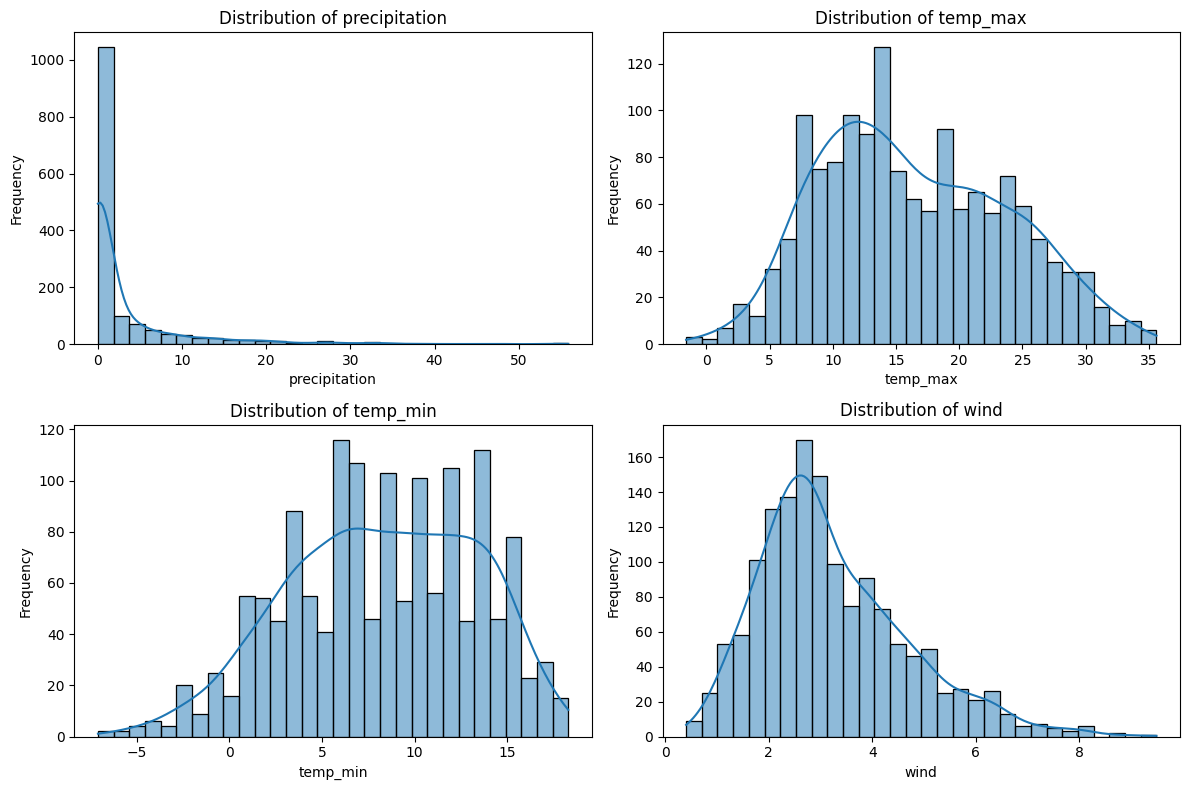

In [ ]:
#Visualize Distributions (Histograms)
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    cols_exist = [col for col in numerical_cols if col in df.columns]

    if cols_exist:
        print("Visualizing distributions (Histograms):")
        n_cols = 2
        n_rows = (len(cols_exist) + n_cols - 1) // n_cols # Calculate rows needed
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
        axes = axes.flatten() # Flatten to easily iterate

        for i, col in enumerate(cols_exist):
            sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("Warning: No numerical columns found for plotting histograms.")
else:
    print("DataFrame 'df' not available.")

#### Visualize Time Series Trends:
Plot the values of each of the four features over time. Assume the row index represents the time step. Use different subplots for each feature for clarity.

Visualizing Time Series Trends:


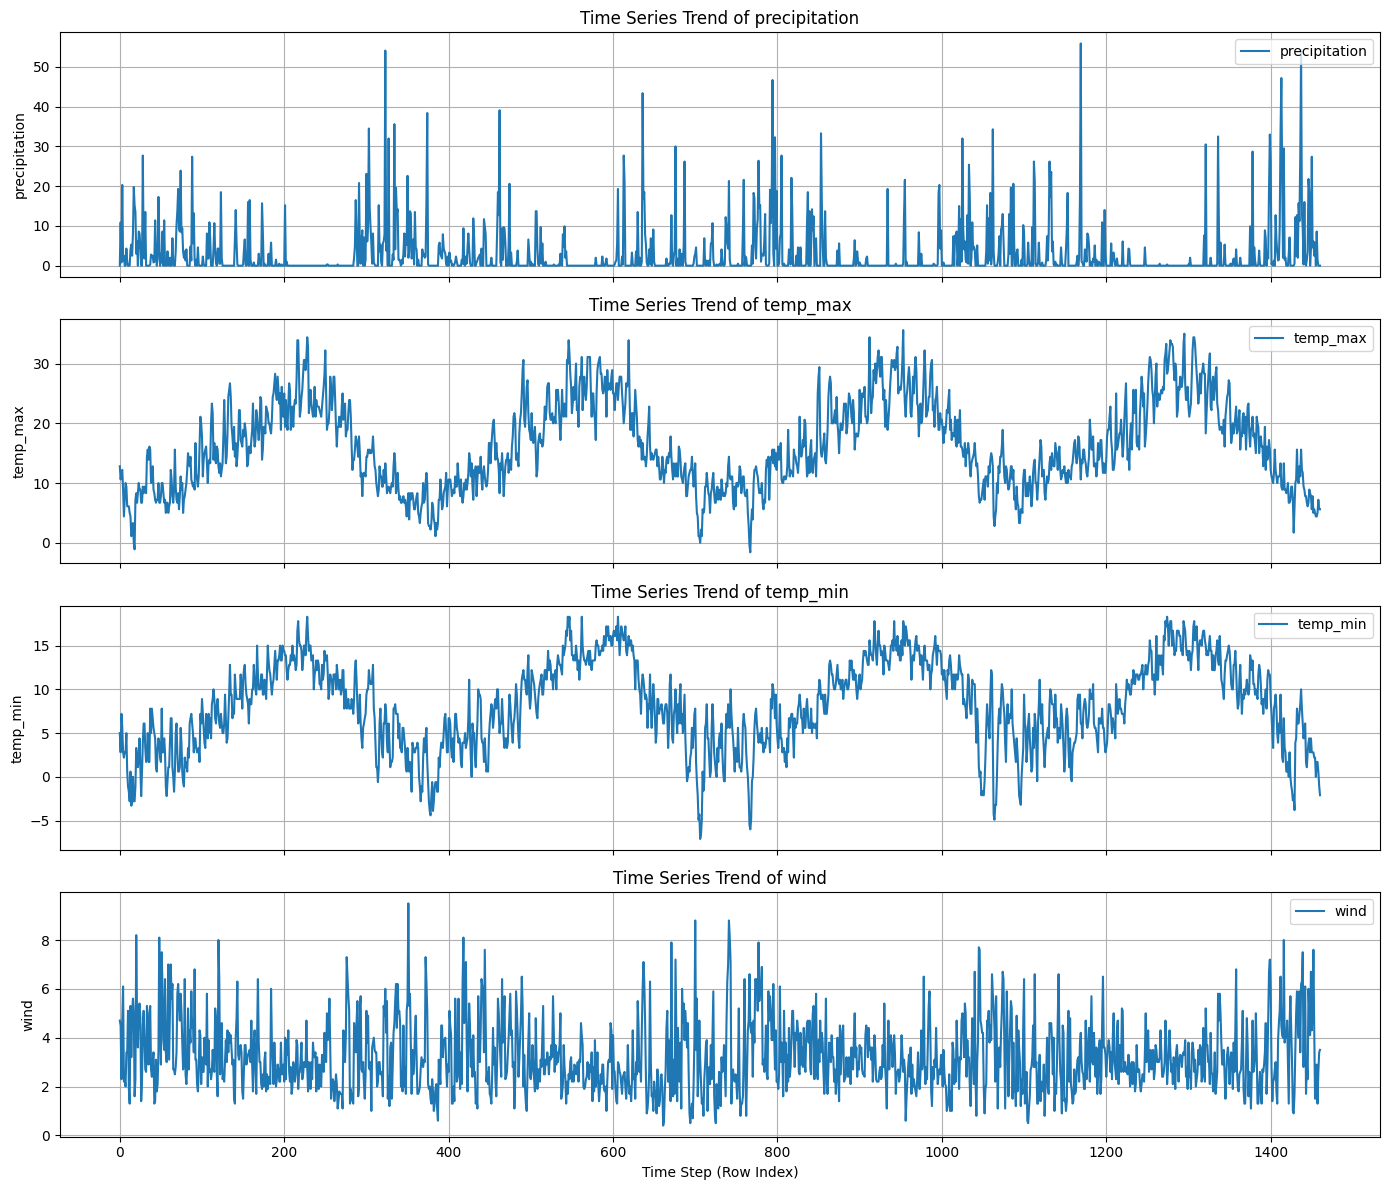

In [ ]:
#Visualize Time Series Trends
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    cols_exist = [col for col in numerical_cols if col in df.columns]

    # Use the DataFrame index if it's datetime, otherwise use row number
    if isinstance(df.index, pd.DatetimeIndex):
        time_index = df.index
        xlabel = 'Date'
    else:
        time_index = np.arange(len(df))
        xlabel = 'Time Step (Row Index)'


    if cols_exist:
        print("Visualizing Time Series Trends:")
        n_cols = 1
        n_rows = len(cols_exist)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3), sharex=True)
        if n_rows == 1: # Make axes iterable if only one plot
             axes = [axes]

        for i, col in enumerate(cols_exist):
            axes[i].plot(time_index, df[col], label=col)
            axes[i].set_title(f'Time Series Trend of {col}')
            axes[i].set_ylabel(col)
            axes[i].legend(loc='upper right')
            axes[i].grid(True)

        axes[-1].set_xlabel(xlabel) # Set x-label only on the last plot
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: No numerical columns found for plotting time series.")
else:
    print("DataFrame 'df' not available.")

#### Visualize Potential Outliers (Box Plots):
Create box plots for each numerical column to visualize potential outliers.

Visualizing Potential Outliers (Box Plots):


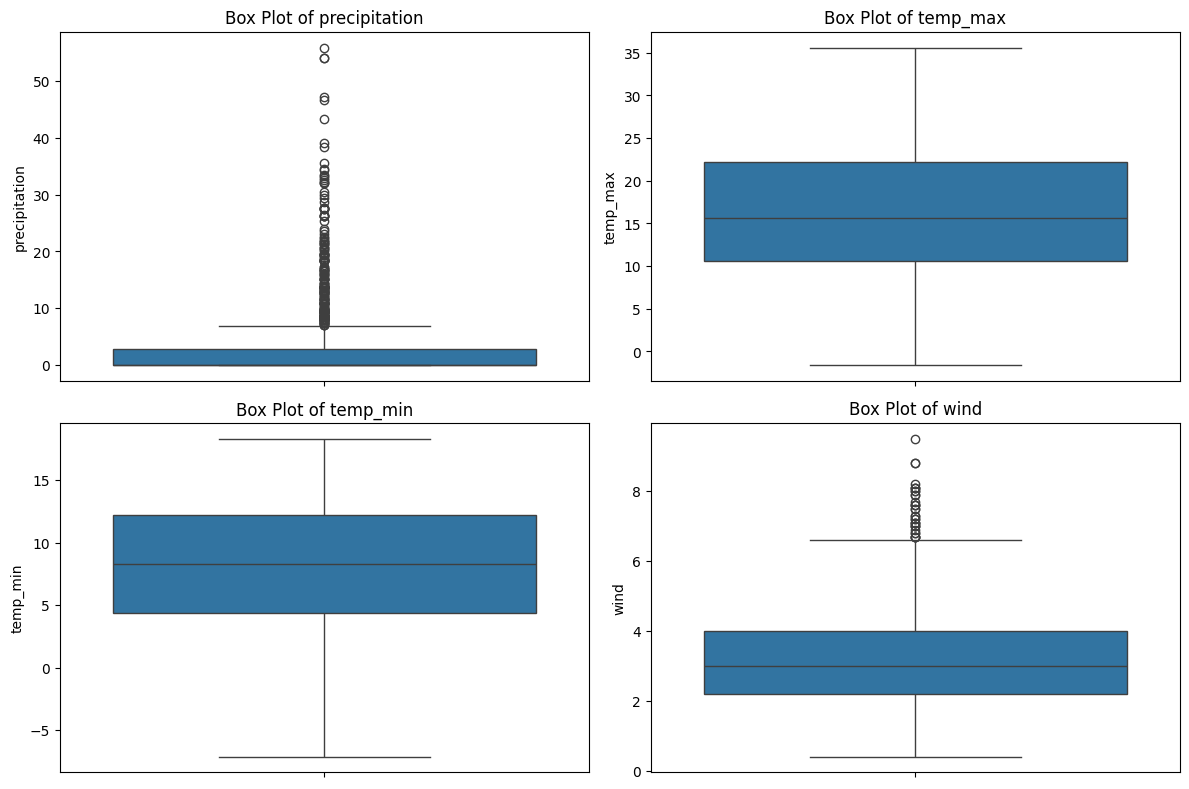

In [ ]:
#Visualize Potential Outliers (Box Plots)
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    cols_exist = [col for col in numerical_cols if col in df.columns]

    if cols_exist:
        print("Visualizing Potential Outliers (Box Plots):")
        n_cols = 2
        n_rows = (len(cols_exist) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
        axes = axes.flatten()

        for i, col in enumerate(cols_exist):
            sns.boxplot(y=df[col], ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')
            axes[i].set_ylabel(col)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("Warning: No numerical columns found for plotting box plots.")
else:
    print("DataFrame 'df' not available.")

#### Calculate Feature Correlation:
Calculate the pairwise correlation of columns using the Pearson correlation coefficient.

In [ ]:
#Calculate Feature Correlation
if 'df' in locals():
    numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    cols_exist = [col for col in numerical_cols if col in df.columns]
    if len(cols_exist) > 1:
        print("Calculating Pairwise Pearson Correlation:")
        correlation_matrix = df[cols_exist].corr(method='pearson')
        display(correlation_matrix)
    elif len(cols_exist) <= 1:
         print("Need at least two numerical columns to calculate pairwise correlation.")
    else:
        print("Warning: No numerical columns found for correlation analysis.")

else:
    print("DataFrame 'df' not available.")

Calculating Pairwise Pearson Correlation:


precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000

#### Visualize Feature Correlation (Heatmap):
Visualize the correlation matrix using a heatmap. Add annotations to show the correlation values.

Visualizing Feature Correlation (Heatmap):


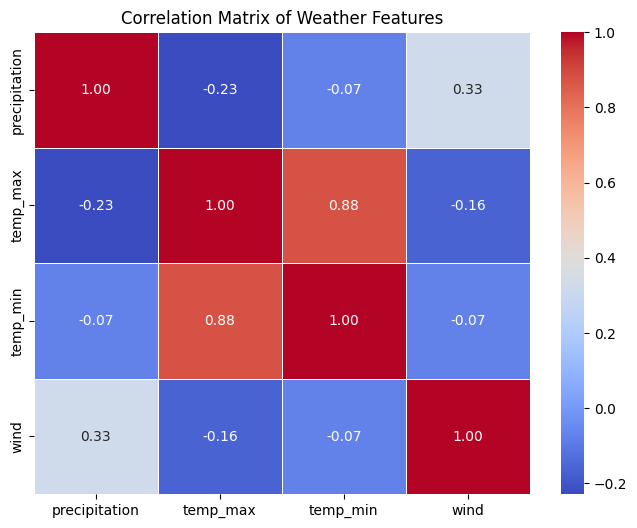

In [ ]:
#Visualize Feature Correlation (Heatmap)
if 'correlation_matrix' in locals() and isinstance(correlation_matrix, pd.DataFrame):
    print("Visualizing Feature Correlation (Heatmap):")
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Weather Features')
    plt.show()
elif 'df' in locals():
     print("Correlation matrix not calculated yet or is not a DataFrame. Please run the previous cell.")
else:
    print("DataFrame 'df' not available.")

## Part 2: Single-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict a single value one time step into the future, using a sequence of past observations from all four weather features.

#### General Instructions:

Assume a lookback_window of 10 time steps for creating sequences unless otherwise specified. This means each input sample X will be a sequence of 10 past data points (each point having 4 features), and the corresponding output y will be the value(s) at the 11th time step.

Use appropriate scaling (e.g., MinMaxScaler or StandardScaler) on the data before creating sequences. Remember to scale your target variable(s) as well if they are numerical.

Split your data into training and testing sets while preserving the time order. A common split is 80% for training and 20% for testing. Ensure your splitting method does not shuffle the data.

Use Keras with a TensorFlow backend to build your RNN models. You can experiment with SimpleRNN, GRU, or LSTM layers.

In [ ]:
#Helper function to create sequences
def create_sequences(input_data, target_data, lookback):
    """
    Creates sequences for RNN training.
    Args:
        input_data (np.array): Scaled input features (samples, features).
        target_data (np.array): Scaled target feature(s) (samples, targets).
                                Can be 1D (single target) or 2D (multiple targets).
        lookback (int): Number of past time steps for each input sequence.
    Returns:
        tuple: (X, y) numpy arrays for RNN input and output.
    """
    X, y = [], []
    # Ensure target_data is 2D for consistent indexing
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1)

    for i in range(len(input_data) - lookback):
        X.append(input_data[i:(i + lookback)])
        y.append(target_data[i + lookback]) # Target is the step immediately after the lookback window
    return np.array(X), np.array(y)

# Define constants
LOOKBACK_WINDOW = 10
FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind'] # Features used for input
N_FEATURES = len(FEATURES)
TEST_SPLIT_RATIO = 0.2

print(f"Lookback window: {LOOKBACK_WINDOW}")
print(f"Input Features: {FEATURES}")
print(f"Test split ratio: {TEST_SPLIT_RATIO}")

Lookback window: 10
Input Features: ['precipitation', 'temp_max', 'temp_min', 'wind']
Test split ratio: 0.2


### Model 1: Predict single precipitation value in future

#### Data Preparation for Precipitation Prediction:

Prepare the data for training an RNN model to predict the single future precipitation value.

Scale the relevant features (precipitation, temp_max, temp_min, wind) using a suitable scaler.

Create input sequences (X) of length lookback_window (10) using the scaled features.

Create the corresponding output array (y) containing the single scaled future precipitation value for each sequence.

Split the sequence data (X, y) into training and testing sets chronologically.

In [ ]:
#Data Preparation for Precipitation Prediction
TARGET_FEATURE_PRECIP = 'precipitation'

if 'df' in locals() and all(f in df.columns for f in FEATURES):
    print(f"\n--- Preparing Data for Model 1: Predict '{TARGET_FEATURE_PRECIP}' ---")
    # 1. Select relevant data
    data_for_scaling = df[FEATURES].values # Use .values to get numpy array

    # 2. Scale features
    scaler = MinMaxScaler()
    # Fit on the entire dataset for simplicity here, but split then fit/transform is better practice
    # For true time series validation, split first! Let's implement the better way.

    # Split data chronologically
    split_index = int(len(data_for_scaling) * (1 - TEST_SPLIT_RATIO))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]
    print(f"Training data shape: {train_data.shape}")
    print(f"Testing data shape: {test_data.shape}")

    # Scale data using the training set only
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data) # Use transform only for test data

    # Identify the index of the target feature *within the scaled array*
    target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)

    # 3. Create sequences for training and testing
    # Training sequences
    X_train_p, y_train_p = create_sequences(
        input_data=scaled_train_data,
        target_data=scaled_train_data[:, target_col_index_precip], # Target is the scaled precip column
        lookback=LOOKBACK_WINDOW
    )
    # Testing sequences
    X_test_p, y_test_p = create_sequences(
        input_data=scaled_test_data,
        target_data=scaled_test_data[:, target_col_index_precip], # Target is the scaled precip column
        lookback=LOOKBACK_WINDOW
    )

    print(f"\nShapes after creating sequences for '{TARGET_FEATURE_PRECIP}':")
    print(f"X_train shape: {X_train_p.shape}") # (samples, lookback, features)
    print(f"y_train shape: {y_train_p.shape}") # (samples, 1) -> single target value
    print(f"X_test shape: {X_test_p.shape}")
    print(f"y_test shape: {y_test_p.shape}")

    # Store the scaler for inverse transform later
    scaler_precip = scaler # This scaler was fit on all features based on training data

else:
    print("Error: DataFrame 'df' not available or missing required feature columns.")
    # Assign None to prevent errors in subsequent cells if data prep failed
    X_train_p, y_train_p, X_test_p, y_test_p, scaler_precip = None, None, None, None, None


--- Preparing Data for Model 1: Predict 'precipitation' ---
Training data shape: (1168, 4)
Testing data shape: (293, 4)

Shapes after creating sequences for 'precipitation':
X_train shape: (1158, 10, 4)
y_train shape: (1158, 1)
X_test shape: (283, 10, 4)
y_test shape: (283, 1)


#### Build RNN Model for Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) specifically for predicting a single future precipitation value.

Define the input shape based on your sequences (lookback_window, number of features).

Add one or more RNN layers.

Add a Dense output layer with 1 unit and an appropriate activation function (or none, for regression).

Print the model summary.

In [ ]:
# Build RNN Model for Precipitation
if X_train_p is not None:
    print("\n--- Building RNN Model 1 (LSTM) for Precipitation ---")
    model_precip = Sequential([
        # Using LSTM layer. You can swap with GRU(50, ...) or SimpleRNN(50, ...)
        LSTM(units=50, input_shape=(LOOKBACK_WINDOW, N_FEATURES), name='LSTM_Layer'),
        # No activation function needed for regression output
        Dense(units=1, name='Output_Layer')
    ])

    model_precip.summary()
else:
    print("Skipping model building as data preparation failed.")
    model_precip = None


--- Building RNN Model 1 (LSTM) for Precipitation ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 1:
Compile the precipitation prediction model.

Choose a suitable optimizer (e.g., 'adam').

Choose an appropriate loss function for regression (e.g., 'mean_squared_error').

Add relevant metrics (e.g., 'mean_absolute_error'). Train the model using your prepared training data for a reasonable number of epochs and batch size.


--- Compiling and Training Model 1 ---
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0740 - val_loss: 0.0167 - val_mean_absolute_error: 0.0835
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - mean_absolute_error: 0.0685 - val_loss: 0.0159 - val_mean_absolute_error: 0.0678
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 - mean_absolute_error: 0.0661 - val_loss: 0.0155 - val_mean_absolute_error: 0.0673
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0116 - mean_absolute_error: 0.0653 - val_loss: 0.0153 - val_mean_absolute_error: 0.0659
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0646 - val_loss: 0.0151 - val_mean_absolute_error: 0.0640
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0642 - val_loss: 0.0151 - val_mean_absolute_error: 0.0628
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0114 - mean

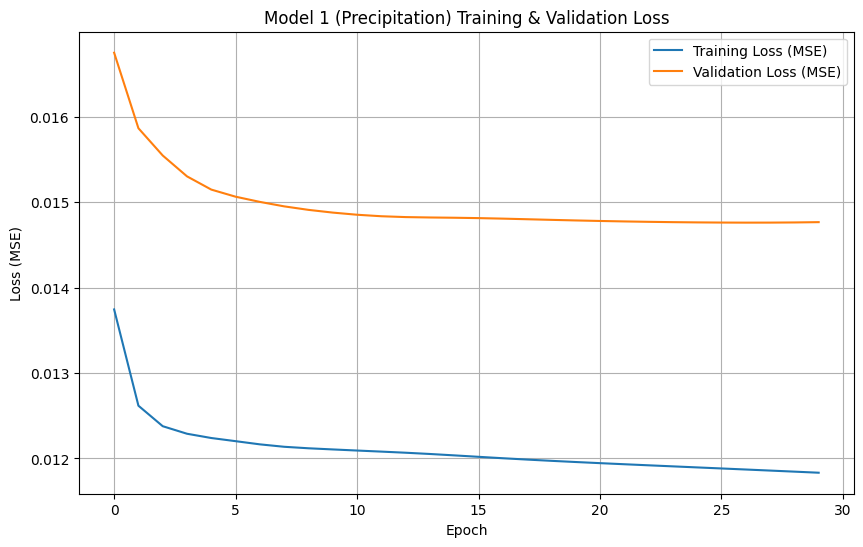

In [ ]:
#Compile and Train Model 1
if model_precip is not None and X_train_p is not None:
    print("\n--- Compiling and Training Model 1 ---")
    # Compile
    model_precip.compile(optimizer='adam',
                         loss='mean_squared_error', # Good choice for regression
                         metrics=['mean_absolute_error']) # Useful metric

    # Train
    EPOCHS = 30 # Adjust as needed
    BATCH_SIZE = 32 # Adjust as needed

    history_precip = model_precip.fit(
        X_train_p, y_train_p,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_test_p, y_test_p),
        verbose=1, # Set to 0 to silence output, 1 for progress bar, 2 for one line per epoch
        shuffle=False # Important for time series not to shuffle!
    )

    print("\nTraining completed.")

    # Plot training history (optional but recommended)
    plt.figure(figsize=(10, 6))
    plt.plot(history_precip.history['loss'], label='Training Loss (MSE)')
    plt.plot(history_precip.history['val_loss'], label='Validation Loss (MSE)')
    plt.title('Model 1 (Precipitation) Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Skipping model compilation/training as model or data is not available.")
    history_precip = None # To avoid errors later

#### Evaluate Model 1 Performance:
Evaluate the trained precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set.

Calculate and report the Root Mean Squared Error (RMSE) on the test set.

In [ ]:
#Evaluate Model 1 Performance
if model_precip is not None and X_test_p is not None:
    print("\n--- Evaluating Model 1 Performance on Test Set ---")
    results_precip = model_precip.evaluate(X_test_p, y_test_p, verbose=0)

    mse_precip = results_precip[0]
    mae_precip = results_precip[1]
    rmse_precip = np.sqrt(mse_precip)

    print(f"Test Loss (Mean Squared Error - MSE): {mse_precip:.6f}")
    print(f"Test Mean Absolute Error (MAE):       {mae_precip:.6f}")
    print(f"Test Root Mean Squared Error (RMSE):  {rmse_precip:.6f}")

    # Store metrics for later comparison
    model1_metrics = {'MSE': mse_precip, 'MAE': mae_precip, 'RMSE': rmse_precip}

else:
    print("Skipping model evaluation as model or test data is not available.")
    model1_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


--- Evaluating Model 1 Performance on Test Set ---
Test Loss (Mean Squared Error - MSE): 0.014766
Test Mean Absolute Error (MAE):       0.066650
Test Root Mean Squared Error (RMSE):  0.121517


#### Predict and Visualize Model 1 Results:
Use the trained model to make predictions on the test set input sequences.

Inverse scale the predictions and the actual test precipitation values to return them to their original scale.

Plot the actual future precipitation values from the test set against the model's predicted future precipitation values over time (using the time index corresponding to the prediction point).


--- Predicting and Visualizing Model 1 Results ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


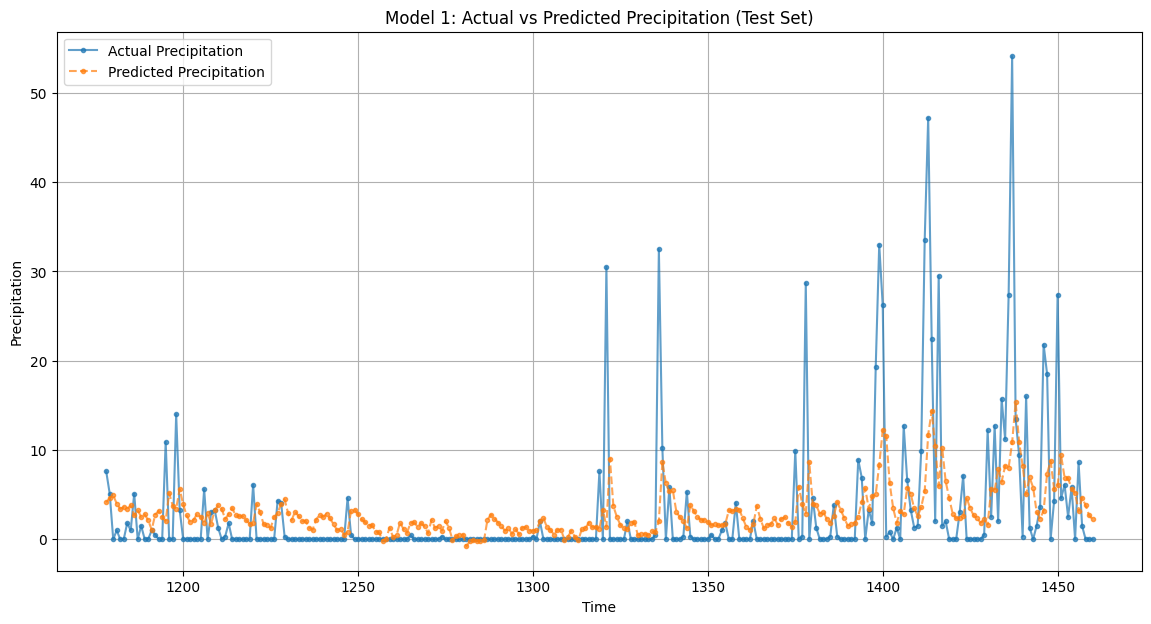

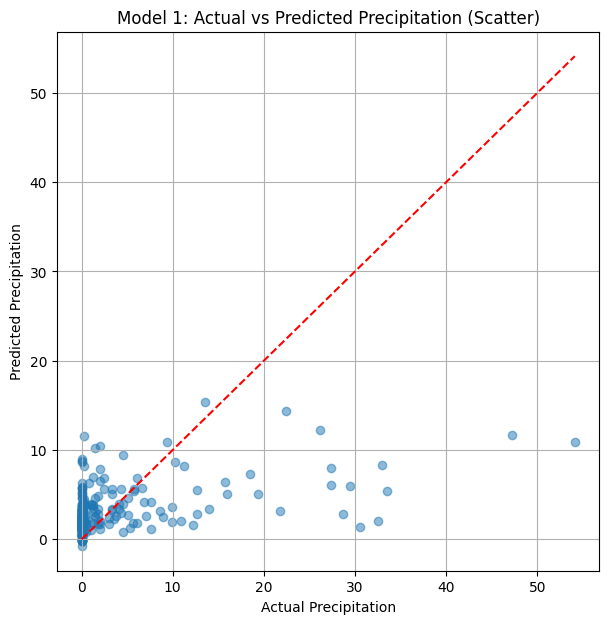

In [ ]:
#Predict and Visualize Model 1 Results
if model_precip is not None and X_test_p is not None and scaler_precip is not None:
    print("\n--- Predicting and Visualizing Model 1 Results ---")
    # Make predictions (scaled)
    y_pred_scaled_p = model_precip.predict(X_test_p)

    # Inverse transform predictions and actual values
    # We need to create a dummy array matching the scaler's expected input shape
    # Place the predicted/actual values in the correct column index (precipitation)

    # Get the index of precipitation in the original feature list
    target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)

    # Inverse Predictions
    dummy_pred = np.zeros((len(y_pred_scaled_p), N_FEATURES))
    dummy_pred[:, target_col_index_precip] = y_pred_scaled_p.flatten()
    y_pred_actual_p = scaler_precip.inverse_transform(dummy_pred)[:, target_col_index_precip]

    # Inverse Actual (y_test)
    dummy_actual = np.zeros((len(y_test_p), N_FEATURES))
    dummy_actual[:, target_col_index_precip] = y_test_p.flatten()
    y_test_actual_p = scaler_precip.inverse_transform(dummy_actual)[:, target_col_index_precip]

    # Get the corresponding time index for the test set predictions
    # The first prediction corresponds to the data point at split_index + LOOKBACK_WINDOW
    start_index_pred = split_index + LOOKBACK_WINDOW
    if isinstance(df.index, pd.DatetimeIndex):
         pred_time_index = df.index[start_index_pred : start_index_pred + len(y_test_actual_p)]
    else:
         pred_time_index = np.arange(start_index_pred, start_index_pred + len(y_test_actual_p))


    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(pred_time_index, y_test_actual_p, label='Actual Precipitation', marker='.', linestyle='-', alpha=0.7)
    plt.plot(pred_time_index, y_pred_actual_p, label='Predicted Precipitation', marker='.', linestyle='--', alpha=0.7)
    plt.title('Model 1: Actual vs Predicted Precipitation (Test Set)')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Optional: Scatter plot
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test_actual_p, y_pred_actual_p, alpha=0.5)
    plt.plot([min(y_test_actual_p), max(y_test_actual_p)], [min(y_test_actual_p), max(y_test_actual_p)], color='red', linestyle='--') # y=x line
    plt.title('Model 1: Actual vs Predicted Precipitation (Scatter)')
    plt.xlabel('Actual Precipitation')
    plt.ylabel('Predicted Precipitation')
    plt.grid(True)
    plt.show()

else:
    print("Skipping prediction/visualization as model, data, or scaler is not available.")

### Model 2: Predict single temp_max value in future

#### Data Preparation for temp_max Prediction:
Prepare the data similarly to Model 1, but create the output array (y) containing the single scaled future temp_max value for each sequence.

#### Build RNN Model for temp_max:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_max value. The model architecture can be similar to Model 1, but ensure it's configured correctly for this specific output. Print the model summary.

#### Compile and Train Model 2:
Compile the temp_max prediction model using appropriate optimizer, loss function (MSE), and metrics (MAE). Train the model on the prepared training data.

#### Evaluate Model 2 Performance:
Evaluate the trained temp_max prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 2 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_max values. Plot the actual vs. predicted future temp_max values over time.


==================== Running Model for: temp_max ====================
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- Building LSTM Model for temp_max ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_temp_max"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling and Training Model for temp_max ---
Training completed.

--- Evaluating Model for temp_max ---
Test MSE: 0.006268, MAE: 0.062994, RMSE: 0.079171

--- Predicting and Visualizing for temp_max ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


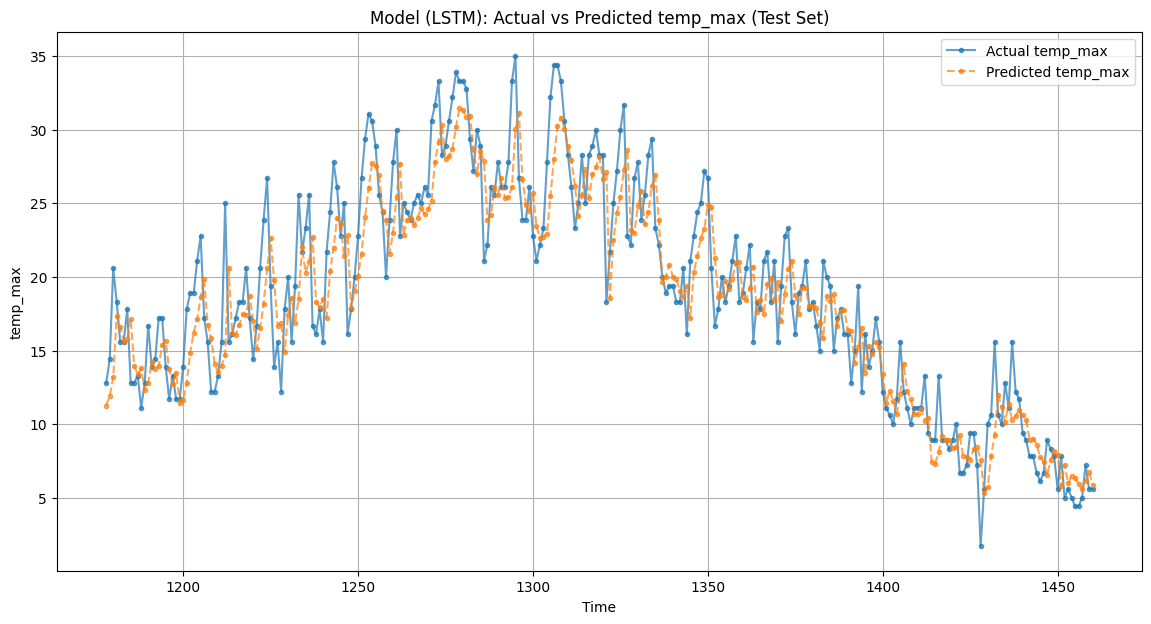


==================== Finished Model for: temp_max ====================


In [ ]:
 #Function Template for Single-Step Model 2

def run_single_step_model(df, target_feature, features, lookback, test_split_ratio, epochs=30, batch_size=32, model_type='LSTM'):
    """
    Prepares data, builds, trains, evaluates, and visualizes a single-step RNN model.
    Returns a dictionary containing model metrics.
    """
    if 'df' not in locals() or not all(f in df.columns for f in features) or target_feature not in df.columns:
        print(f"Error: DataFrame 'df' not available or missing required columns for {target_feature}.")
        return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"\n{'='*20} Running Model for: {target_feature} {'='*20}")

    # 1. Data Preparation
    n_features = len(features)
    data_for_scaling = df[features].values
    split_index = int(len(data_for_scaling) * (1 - test_split_ratio))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data)

    target_col_index = features.index(target_feature)

    X_train, y_train = create_sequences(scaled_train_data, scaled_train_data[:, target_col_index], lookback)
    X_test, y_test = create_sequences(scaled_test_data, scaled_test_data[:, target_col_index], lookback)

    if X_train.size == 0 or X_test.size == 0:
         print(f"Error: Not enough data to create sequences for {target_feature} with lookback {lookback}.")
         return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # 2. Build Model
    print(f"\n--- Building {model_type} Model for {target_feature} ---")
    model = Sequential(name=f'Model_{target_feature}')
    if model_type == 'LSTM':
        model.add(LSTM(50, input_shape=(lookback, n_features), name='LSTM_Layer'))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(lookback, n_features), name='GRU_Layer'))
    else: # SimpleRNN
        model.add(SimpleRNN(50, input_shape=(lookback, n_features), name='SimpleRNN_Layer'))
    model.add(Dense(1, name='Output_Layer'))
    model.summary()

    # 3. Compile and Train
    print(f"\n--- Compiling and Training Model for {target_feature} ---")
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0, # Quieter training for repeated runs
        shuffle=False
    )
    print("Training completed.")

    # 4. Evaluate
    print(f"\n--- Evaluating Model for {target_feature} ---")
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[0]
    mae = results[1]
    rmse = np.sqrt(mse)
    print(f"Test MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}")
    metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}


    # 5. Predict and Visualize (Optional - can be turned off)
    visualize = True
    if visualize:
        print(f"\n--- Predicting and Visualizing for {target_feature} ---")
        y_pred_scaled = model.predict(X_test)

        # Inverse transform
        dummy_pred = np.zeros((len(y_pred_scaled), n_features))
        dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
        y_pred_actual = scaler.inverse_transform(dummy_pred)[:, target_col_index]

        dummy_actual = np.zeros((len(y_test), n_features))
        dummy_actual[:, target_col_index] = y_test.flatten()
        y_test_actual = scaler.inverse_transform(dummy_actual)[:, target_col_index]

        start_index_pred = split_index + lookback
        if isinstance(df.index, pd.DatetimeIndex):
             pred_time_index = df.index[start_index_pred : start_index_pred + len(y_test_actual)]
        else:
             pred_time_index = np.arange(start_index_pred, start_index_pred + len(y_test_actual))

        plt.figure(figsize=(14, 7))
        plt.plot(pred_time_index, y_test_actual, label=f'Actual {target_feature}', marker='.', linestyle='-', alpha=0.7)
        plt.plot(pred_time_index, y_pred_actual, label=f'Predicted {target_feature}', marker='.', linestyle='--', alpha=0.7)
        plt.title(f'Model ({model_type}): Actual vs Predicted {target_feature} (Test Set)')
        plt.xlabel('Time')
        plt.ylabel(target_feature)
        plt.legend()
        plt.grid(True)
        plt.show()

    print(f"\n{'='*20} Finished Model for: {target_feature} {'='*20}")
    return metrics, model, scaler, history # Return model and scaler if needed later



 #--- Run Model 2: temp_max ---
model2_metrics, model_temp_max, scaler_temp_max, history_temp_max = run_single_step_model(
    df, 'temp_max', FEATURES, LOOKBACK_WINDOW, TEST_SPLIT_RATIO
)


### Model 3: Predict single temp_min value in future

#### Data Preparation for temp_min Prediction:
Prepare the data, creating the output array (y) containing the single scaled future temp_min value for each sequence.

#### Build RNN Model for temp_min:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_min value. Print the model summary.

#### Compile and Train Model 3:
Compile and train the temp_min prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 3 Performance:
Evaluate the trained temp_min prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 3 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_min values. Plot the actual vs. predicted future temp_min values over time.


==================== Running Model for: temp_min ====================
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- Building LSTM Model for temp_min ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_temp_min"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling and Training Model for temp_min ---
Training completed.

--- Evaluating Model for temp_min ---
Test MSE: 0.004503, MAE: 0.053266, RMSE: 0.067103

--- Predicting and Visualizing for temp_min ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


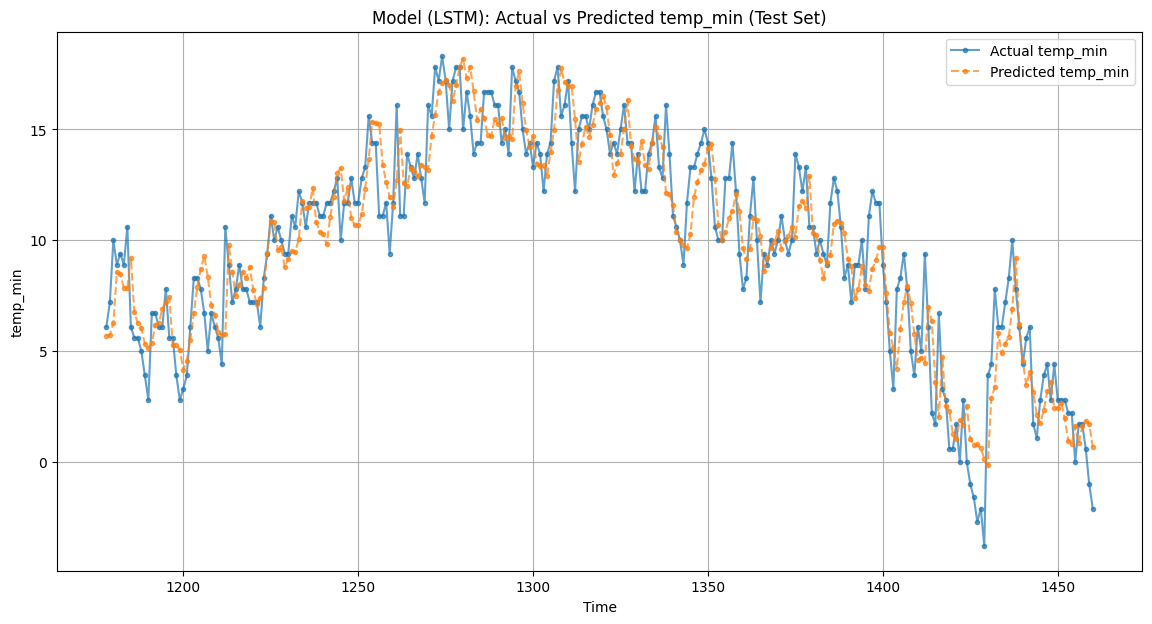


==================== Finished Model for: temp_min ====================


In [ ]:
#Function Template for Single-Step Model 3

def run_single_step_model(df, target_feature, features, lookback, test_split_ratio, epochs=30, batch_size=32, model_type='LSTM'):
    """
    Prepares data, builds, trains, evaluates, and visualizes a single-step RNN model.
    Returns a dictionary containing model metrics.
    """
    if 'df' not in locals() or not all(f in df.columns for f in features) or target_feature not in df.columns:
        print(f"Error: DataFrame 'df' not available or missing required columns for {target_feature}.")
        return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"\n{'='*20} Running Model for: {target_feature} {'='*20}")

    # 1. Data Preparation
    n_features = len(features)
    data_for_scaling = df[features].values
    split_index = int(len(data_for_scaling) * (1 - test_split_ratio))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data)

    target_col_index = features.index(target_feature)

    X_train, y_train = create_sequences(scaled_train_data, scaled_train_data[:, target_col_index], lookback)
    X_test, y_test = create_sequences(scaled_test_data, scaled_test_data[:, target_col_index], lookback)

    if X_train.size == 0 or X_test.size == 0:
         print(f"Error: Not enough data to create sequences for {target_feature} with lookback {lookback}.")
         return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # 2. Build Model
    print(f"\n--- Building {model_type} Model for {target_feature} ---")
    model = Sequential(name=f'Model_{target_feature}')
    if model_type == 'LSTM':
        model.add(LSTM(50, input_shape=(lookback, n_features), name='LSTM_Layer'))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(lookback, n_features), name='GRU_Layer'))
    else: # SimpleRNN
        model.add(SimpleRNN(50, input_shape=(lookback, n_features), name='SimpleRNN_Layer'))
    model.add(Dense(1, name='Output_Layer'))
    model.summary()

    # 3. Compile and Train
    print(f"\n--- Compiling and Training Model for {target_feature} ---")
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0, # Quieter training for repeated runs
        shuffle=False
    )
    print("Training completed.")

    # 4. Evaluate
    print(f"\n--- Evaluating Model for {target_feature} ---")
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[0]
    mae = results[1]
    rmse = np.sqrt(mse)
    print(f"Test MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}")
    metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}


    # 5. Predict and Visualize (Optional - can be turned off)
    visualize = True
    if visualize:
        print(f"\n--- Predicting and Visualizing for {target_feature} ---")
        y_pred_scaled = model.predict(X_test)

        # Inverse transform
        dummy_pred = np.zeros((len(y_pred_scaled), n_features))
        dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
        y_pred_actual = scaler.inverse_transform(dummy_pred)[:, target_col_index]

        dummy_actual = np.zeros((len(y_test), n_features))
        dummy_actual[:, target_col_index] = y_test.flatten()
        y_test_actual = scaler.inverse_transform(dummy_actual)[:, target_col_index]

        start_index_pred = split_index + lookback
        if isinstance(df.index, pd.DatetimeIndex):
             pred_time_index = df.index[start_index_pred : start_index_pred + len(y_test_actual)]
        else:
             pred_time_index = np.arange(start_index_pred, start_index_pred + len(y_test_actual))

        plt.figure(figsize=(14, 7))
        plt.plot(pred_time_index, y_test_actual, label=f'Actual {target_feature}', marker='.', linestyle='-', alpha=0.7)
        plt.plot(pred_time_index, y_pred_actual, label=f'Predicted {target_feature}', marker='.', linestyle='--', alpha=0.7)
        plt.title(f'Model ({model_type}): Actual vs Predicted {target_feature} (Test Set)')
        plt.xlabel('Time')
        plt.ylabel(target_feature)
        plt.legend()
        plt.grid(True)
        plt.show()

    print(f"\n{'='*20} Finished Model for: {target_feature} {'='*20}")
    return metrics, model, scaler, history # Return model and scaler if needed later



# --- Run Model 3: temp_min ---
model3_metrics, model_temp_min, scaler_temp_min, history_temp_min = run_single_step_model(
    df, 'temp_min', FEATURES, LOOKBACK_WINDOW, TEST_SPLIT_RATIO
)


### Model 4: Predict single wind value in future

#### Data Preparation for Wind Prediction:
Prepare the data, creating the output array (y) containing the single scaled future wind value for each sequence.

#### Build RNN Model for Wind:
Design and implement a Keras Sequential model using RNN layers for predicting a single future wind value. Print the model summary.

#### Compile and Train Model 4:
Compile and train the wind prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 4 Performance:
Evaluate the trained wind prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 4 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test wind values. Plot the actual vs. predicted future wind values over time.


==================== Running Model for: wind ====================
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- Building LSTM Model for wind ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_wind"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling and Training Model for wind ---
Training completed.

--- Evaluating Model for wind ---
Test MSE: 0.016357, MAE: 0.097257, RMSE: 0.127893

--- Predicting and Visualizing for wind ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


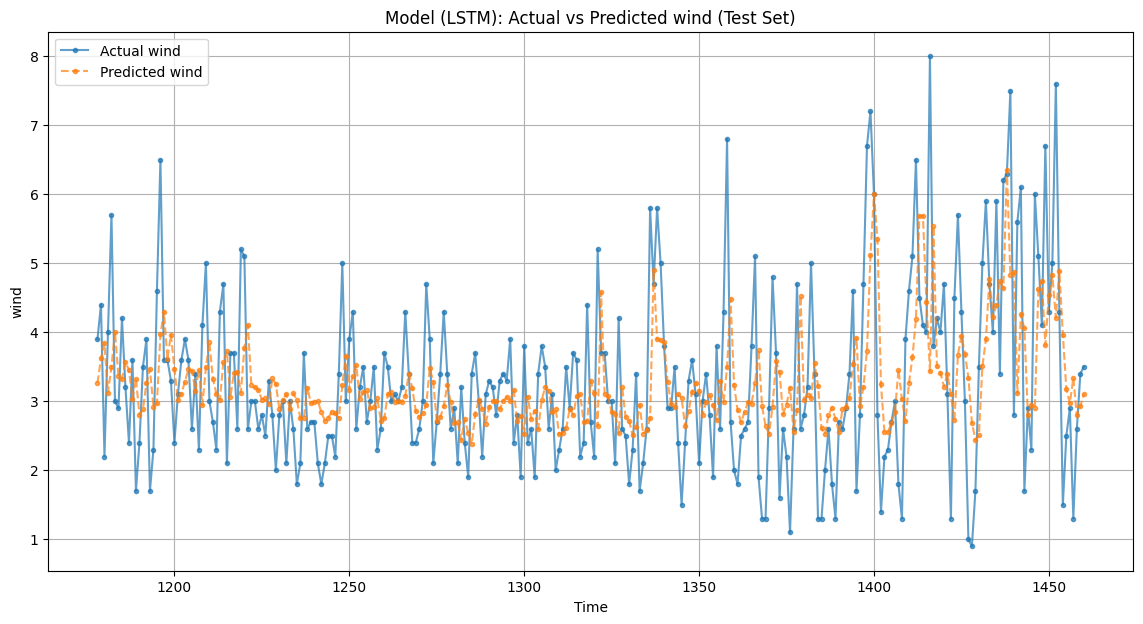


==================== Finished Model for: wind ====================


In [ ]:
#Function Template for Single-Step Model 4

def run_single_step_model(df, target_feature, features, lookback, test_split_ratio, epochs=30, batch_size=32, model_type='LSTM'):
    """
    Prepares data, builds, trains, evaluates, and visualizes a single-step RNN model.
    Returns a dictionary containing model metrics.
    """
    if 'df' not in locals() or not all(f in df.columns for f in features) or target_feature not in df.columns:
        print(f"Error: DataFrame 'df' not available or missing required columns for {target_feature}.")
        return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"\n{'='*20} Running Model for: {target_feature} {'='*20}")

    # 1. Data Preparation
    n_features = len(features)
    data_for_scaling = df[features].values
    split_index = int(len(data_for_scaling) * (1 - test_split_ratio))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data)

    target_col_index = features.index(target_feature)

    X_train, y_train = create_sequences(scaled_train_data, scaled_train_data[:, target_col_index], lookback)
    X_test, y_test = create_sequences(scaled_test_data, scaled_test_data[:, target_col_index], lookback)

    if X_train.size == 0 or X_test.size == 0:
         print(f"Error: Not enough data to create sequences for {target_feature} with lookback {lookback}.")
         return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}, None, None, None

    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # 2. Build Model
    print(f"\n--- Building {model_type} Model for {target_feature} ---")
    model = Sequential(name=f'Model_{target_feature}')
    if model_type == 'LSTM':
        model.add(LSTM(50, input_shape=(lookback, n_features), name='LSTM_Layer'))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(lookback, n_features), name='GRU_Layer'))
    else: # SimpleRNN
        model.add(SimpleRNN(50, input_shape=(lookback, n_features), name='SimpleRNN_Layer'))
    model.add(Dense(1, name='Output_Layer'))
    model.summary()

    # 3. Compile and Train
    print(f"\n--- Compiling and Training Model for {target_feature} ---")
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0, # Quieter training for repeated runs
        shuffle=False
    )
    print("Training completed.")

    # 4. Evaluate
    print(f"\n--- Evaluating Model for {target_feature} ---")
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[0]
    mae = results[1]
    rmse = np.sqrt(mse)
    print(f"Test MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}")
    metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}


    # 5. Predict and Visualize (Optional - can be turned off)
    visualize = True
    if visualize:
        print(f"\n--- Predicting and Visualizing for {target_feature} ---")
        y_pred_scaled = model.predict(X_test)

        # Inverse transform
        dummy_pred = np.zeros((len(y_pred_scaled), n_features))
        dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
        y_pred_actual = scaler.inverse_transform(dummy_pred)[:, target_col_index]

        dummy_actual = np.zeros((len(y_test), n_features))
        dummy_actual[:, target_col_index] = y_test.flatten()
        y_test_actual = scaler.inverse_transform(dummy_actual)[:, target_col_index]

        start_index_pred = split_index + lookback
        if isinstance(df.index, pd.DatetimeIndex):
             pred_time_index = df.index[start_index_pred : start_index_pred + len(y_test_actual)]
        else:
             pred_time_index = np.arange(start_index_pred, start_index_pred + len(y_test_actual))

        plt.figure(figsize=(14, 7))
        plt.plot(pred_time_index, y_test_actual, label=f'Actual {target_feature}', marker='.', linestyle='-', alpha=0.7)
        plt.plot(pred_time_index, y_pred_actual, label=f'Predicted {target_feature}', marker='.', linestyle='--', alpha=0.7)
        plt.title(f'Model ({model_type}): Actual vs Predicted {target_feature} (Test Set)')
        plt.xlabel('Time')
        plt.ylabel(target_feature)
        plt.legend()
        plt.grid(True)
        plt.show()

    print(f"\n{'='*20} Finished Model for: {target_feature} {'='*20}")
    return metrics, model, scaler, history # Return model and scaler if needed later



# --- Run Model 4: wind ---
model4_metrics, model_wind, scaler_wind, history_wind = run_single_step_model(
    df, 'wind', FEATURES, LOOKBACK_WINDOW, TEST_SPLIT_RATIO
)

### Model 5: Predict single future values of all 4 parameters

#### Data Preparation for All 4 Parameters Prediction:
Prepare the data for a multi-output RNN model. Scale the features. Create input sequences (X) of length lookback_window (10) using the scaled features. Create the corresponding output array (y) containing the single scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence. Split the sequence data (X, y) into training and testing sets.

In [ ]:
#Model 5 - Data Preparation for All 4 Parameters Prediction
print(f"\n{'='*20} Running Model 5: Predict All Features {'='*20}")

if 'df' in locals() and all(f in df.columns for f in FEATURES):
    # 1. Select & Split Data (using the same split point as before for consistency)
    data_for_scaling = df[FEATURES].values
    split_index = int(len(data_for_scaling) * (1 - TEST_SPLIT_RATIO))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    # 2. Scale Data
    scaler_all = MinMaxScaler()
    scaled_train_data = scaler_all.fit_transform(train_data)
    scaled_test_data = scaler_all.transform(test_data)

    # 3. Create Sequences - Target is now the vector of all features at the next step
    X_train_all, y_train_all = create_sequences(
        input_data=scaled_train_data,
        target_data=scaled_train_data, # Target is the full row
        lookback=LOOKBACK_WINDOW
    )
    X_test_all, y_test_all = create_sequences(
        input_data=scaled_test_data,
        target_data=scaled_test_data, # Target is the full row
        lookback=LOOKBACK_WINDOW
    )

    print(f"Shapes after creating sequences for All Features:")
    print(f"X_train shape: {X_train_all.shape}") # (samples, lookback, features)
    print(f"y_train shape: {y_train_all.shape}") # (samples, features) -> multi-target
    print(f"X_test shape: {X_test_all.shape}")
    print(f"y_test shape: {y_test_all.shape}") # (samples, features)

else:
    print("Error: DataFrame 'df' not available or missing required feature columns.")
    X_train_all, y_train_all, X_test_all, y_test_all, scaler_all = None, None, None, None, None


==================== Running Model 5: Predict All Features ====================
Shapes after creating sequences for All Features:
X_train shape: (1158, 10, 4)
y_train shape: (1158, 4)
X_test shape: (283, 10, 4)
y_test shape: (283, 4)


#### Build RNN Model for All 4 Parameters:
Design and implement a Keras Sequential model using RNN layers for predicting the single future values of all four parameters simultaneously.

Define the input shape.
Add one or more RNN layers.
Add a Dense output layer with 4 units (one for each predicted feature). Print the model summary.

In [ ]:
#Build RNN Model for All 4 Parameters
if X_train_all is not None:
    print("\n--- Building RNN Model 5 (LSTM) for All Features ---")
    model_all = Sequential([
        LSTM(units=50, input_shape=(LOOKBACK_WINDOW, N_FEATURES), name='LSTM_Layer'),
        # Output layer now has N_FEATURES units, one for each predicted feature
        Dense(units=N_FEATURES, name='Output_Layer')
    ])
    model_all.summary()
else:
    print("Skipping model building as data preparation failed.")
    model_all = None


--- Building RNN Model 5 (LSTM) for All Features ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204 (43.77 KB)

 Trainable params: 11,204 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 5:
Compile the multi-output prediction model using appropriate optimizer, loss function (e.g., 'mean_squared_error'), and metrics (e.g., 'mean_absolute_error'). Train the model on the prepared training data.


--- Compiling and Training Model 5 ---
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0863 - mean_absolute_error: 0.2256 - val_loss: 0.0188 - val_mean_absolute_error: 0.0932
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.1056 - val_loss: 0.0151 - val_mean_absolute_error: 0.0870
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0939 - val_loss: 0.0132 - val_mean_absolute_error: 0.0811
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0874 - val_loss: 0.0127 - val_mean_absolute_error: 0.0781
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0857 - val_loss: 0.0126 - val_mean_absolute_error: 0.0782
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0851 - val_loss: 0.0124 - val_mean_absolute_error: 0.0772
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - mean

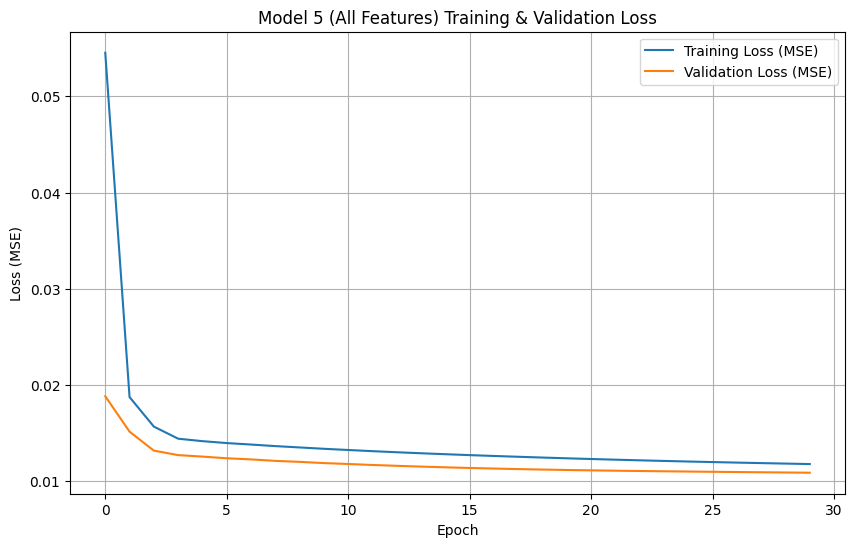

In [ ]:
#Compile and Train Model 5
if model_all is not None and X_train_all is not None:
    print("\n--- Compiling and Training Model 5 ---")
    model_all.compile(optimizer='adam',
                      loss='mean_squared_error',
                      metrics=['mean_absolute_error'])

    EPOCHS = 30 # Adjust as needed
    BATCH_SIZE = 32

    history_all = model_all.fit(
        X_train_all, y_train_all,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_test_all, y_test_all),
        verbose=1,
        shuffle=False
    )

    print("\nTraining completed.")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history_all.history['loss'], label='Training Loss (MSE)')
    plt.plot(history_all.history['val_loss'], label='Validation Loss (MSE)')
    plt.title('Model 5 (All Features) Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Skipping model compilation/training as model or data is not available.")
    history_all = None

#### Evaluate Model 5 Performance:
Evaluate the trained multi-output prediction model on the test dataset. Report the overall MSE and MAE. Discuss how you might evaluate the performance for each individual output feature if needed.

In [ ]:
#Evaluate Model 5 Performance
if model_all is not None and X_test_all is not None:
    print("\n--- Evaluating Model 5 Performance on Test Set ---")
    results_all = model_all.evaluate(X_test_all, y_test_all, verbose=0)

    mse_all = results_all[0]
    mae_all = results_all[1]
    rmse_all = np.sqrt(mse_all) # Overall RMSE

    print(f"Overall Test Loss (Mean Squared Error - MSE): {mse_all:.6f}")
    print(f"Overall Test Mean Absolute Error (MAE):       {mae_all:.6f}")
    print(f"Overall Test Root Mean Squared Error (RMSE):  {rmse_all:.6f}")

    # Discussion on individual feature performance:
    print("\nDiscussion: Evaluating individual feature performance")
    print("To evaluate performance per feature, we would make predictions, inverse transform both predictions and actual values,")
    print("and then calculate MSE, MAE, RMSE for each column (feature) separately.")
    print("Example: Calculate MAE for precipitation:")
    # y_pred_all_scaled = model_all.predict(X_test_all)
    # y_pred_all_actual = scaler_all.inverse_transform(y_pred_all_scaled)
    # y_test_all_actual = scaler_all.inverse_transform(y_test_all)
    # precip_index = FEATURES.index('precipitation')
    # mae_precip_model5 = mean_absolute_error(y_test_all_actual[:, precip_index], y_pred_all_actual[:, precip_index])
    # print(f"  - MAE for Precipitation in Model 5: {mae_precip_model5:.6f}")
    # (Repeat for other metrics and features)

    # Store overall metrics
    model5_metrics = {'MSE': mse_all, 'MAE': mae_all, 'RMSE': rmse_all}

else:
    print("Skipping model evaluation as model or test data is not available.")
    model5_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


--- Evaluating Model 5 Performance on Test Set ---
Overall Test Loss (Mean Squared Error - MSE): 0.010876
Overall Test Mean Absolute Error (MAE):       0.072303
Overall Test Root Mean Squared Error (RMSE):  0.104288

Discussion: Evaluating individual feature performance
To evaluate performance per feature, we would make predictions, inverse transform both predictions and actual values,
and then calculate MSE, MAE, RMSE for each column (feature) separately.
Example: Calculate MAE for precipitation:


#### Predict and Visualize Model 5 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and the actual test target values (which are vectors of 4). Visualize the results by plotting the actual vs. predicted values over time for each of the four features, possibly using subplots or different colored lines on the same plot.


--- Predicting and Visualizing Model 5 Results ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
Plotting Actual vs Predicted values for each feature (Test Set)


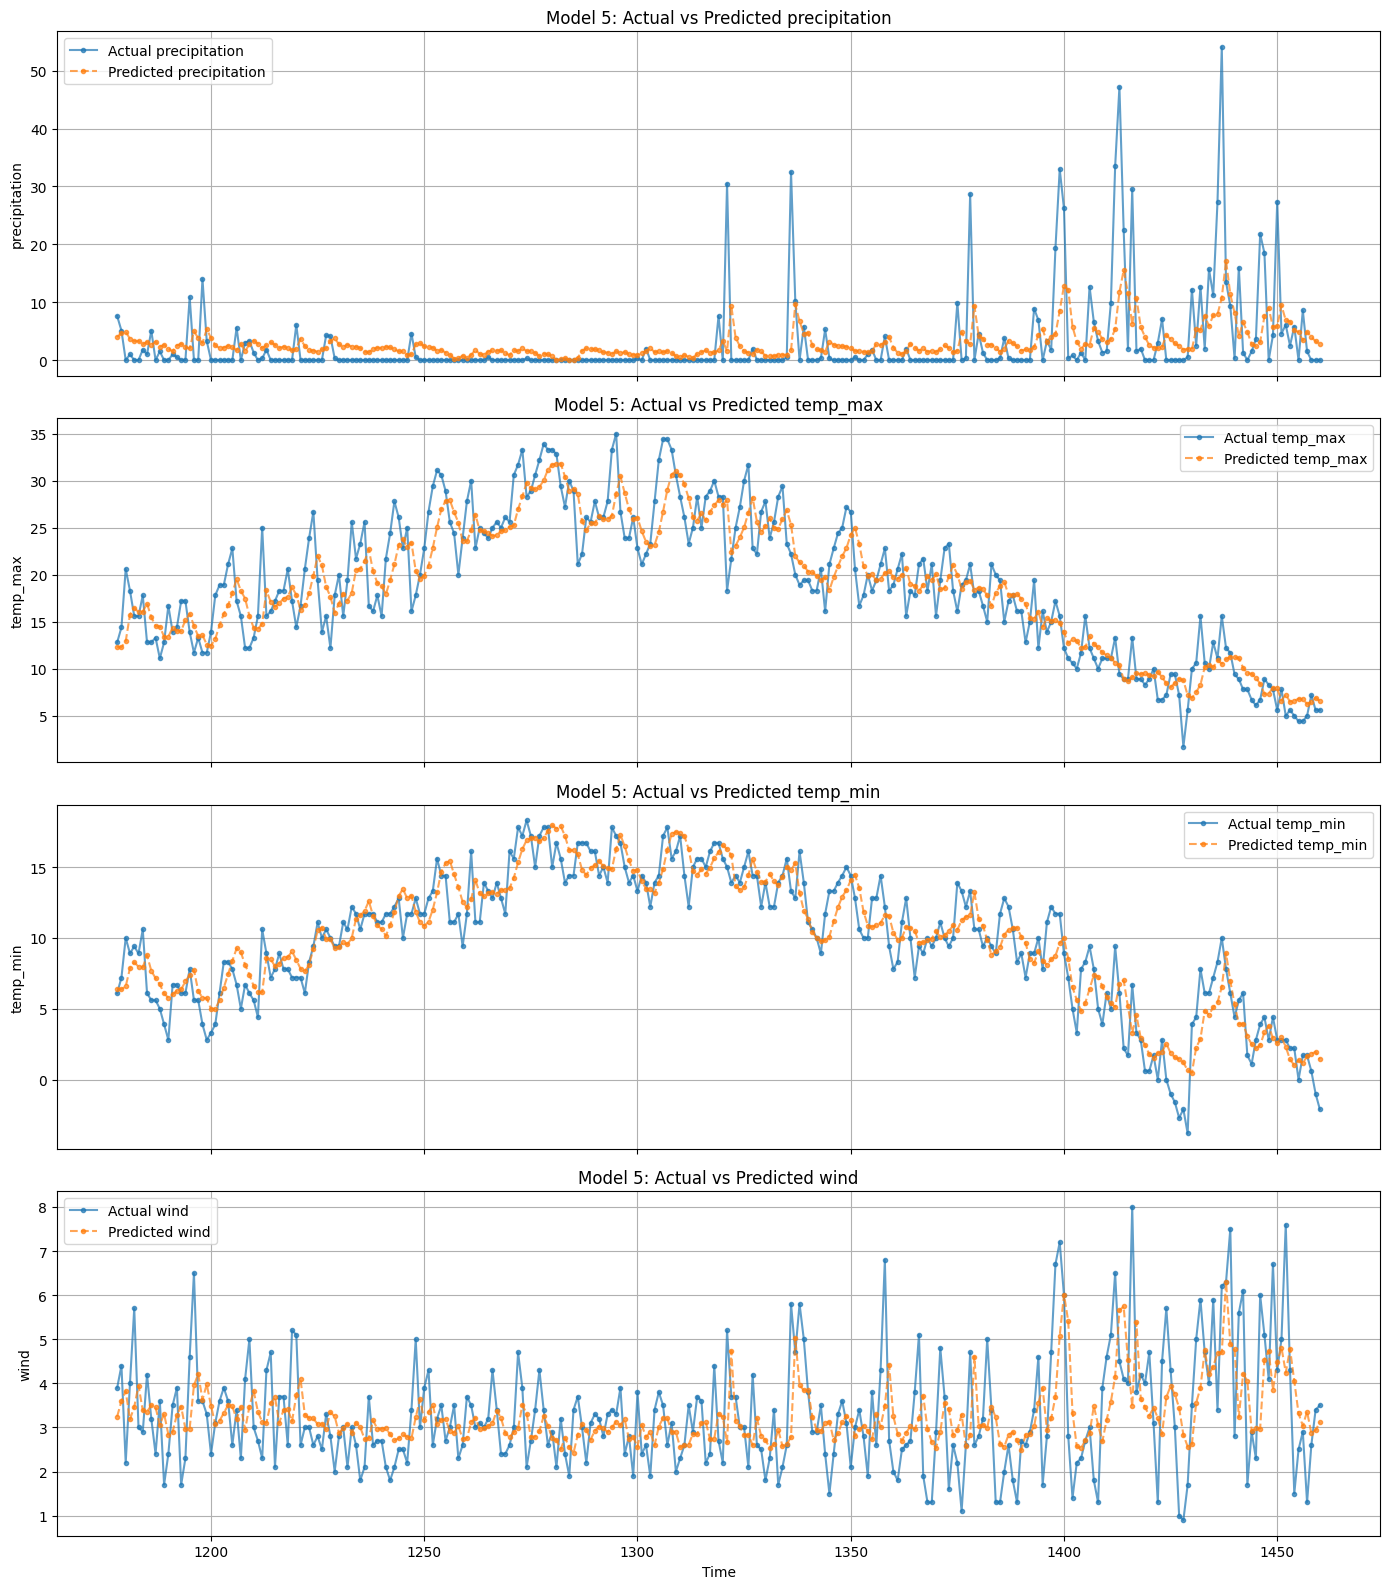

In [ ]:
#Predict and Visualize Model 5 Results
if model_all is not None and X_test_all is not None and scaler_all is not None:
    print("\n--- Predicting and Visualizing Model 5 Results ---")
    # Make predictions (scaled)
    y_pred_all_scaled = model_all.predict(X_test_all)

    # Inverse transform predictions and actual values
    y_pred_all_actual = scaler_all.inverse_transform(y_pred_all_scaled)
    y_test_all_actual = scaler_all.inverse_transform(y_test_all) # y_test_all already contains the scaled targets

    # Get the time index
    start_index_pred = split_index + LOOKBACK_WINDOW
    if isinstance(df.index, pd.DatetimeIndex):
         pred_time_index = df.index[start_index_pred : start_index_pred + len(y_test_all_actual)]
    else:
         pred_time_index = np.arange(start_index_pred, start_index_pred + len(y_test_all_actual))

    # Plotting each feature
    print("Plotting Actual vs Predicted values for each feature (Test Set)")
    n_features_plot = y_test_all_actual.shape[1]
    fig, axes = plt.subplots(n_features_plot, 1, figsize=(14, n_features_plot * 4), sharex=True)
    if n_features_plot == 1: axes = [axes] # Make iterable

    for i in range(n_features_plot):
        feature_name = FEATURES[i]
        axes[i].plot(pred_time_index, y_test_all_actual[:, i], label=f'Actual {feature_name}', marker='.', linestyle='-', alpha=0.7)
        axes[i].plot(pred_time_index, y_pred_all_actual[:, i], label=f'Predicted {feature_name}', marker='.', linestyle='--', alpha=0.7)
        axes[i].set_title(f'Model 5: Actual vs Predicted {feature_name}')
        axes[i].set_ylabel(feature_name)
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

else:
    print("Skipping prediction/visualization as model, data, or scaler is not available.")

### Part 3: Multi-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict 5 time steps into the future, using a sequence of 10 past observations from all four weather features.

#### General Instructions:

Use a lookback_window of 10 time steps for input sequences (X).
Use a prediction_horizon of 5 time steps for the output sequences (y).
Continue using appropriate scaling on the data before creating sequences.
Split your data into training and testing sets chronologically (e.g., 80/20 split).
Build Keras RNN models, considering how the output layer structure needs to handle predicting a sequence. A TimeDistributed layer is commonly used for this.

### Model 6: Predict multiple (prediction_horizon=5) precipitation values in future

### Data Preparation for Multi-Step Precipitation Prediction:
Prepare the data for training an RNN model to predict the next 5 precipitation values.

Scale the relevant features (precipitation, temp_max, temp_min, wind).

Create input sequences (X) of length 10 using the scaled features.

Create the corresponding output sequences (y) containing the scaled future precipitation values for the next 5 time steps for each input sequence.

Split the sequence data (X, y) into training and testing sets chronologically. Ensure the shapes of your training and testing X and y are correct (e.g., (num_samples, lookback_window, num_features) for X and (num_samples, prediction_horizon, 1) for y).

In [ ]:
#Helper function for Multi-Step Sequences
def create_multistep_sequences(input_data, target_data, lookback, horizon):
    """
    Creates sequences for multi-step RNN training.
    Args:
        input_data (np.array): Scaled input features (samples, features).
        target_data (np.array): Scaled target feature(s) (samples, targets).
                                Can be 1D (single target) or 2D (multiple targets).
        lookback (int): Number of past time steps for each input sequence.
        horizon (int): Number of future time steps to predict.
    Returns:
        tuple: (X, y) numpy arrays for RNN input and output.
               y shape: (samples, horizon, n_target_features)
    """
    X, y = [], []
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1) # Ensure target is 2D

    for i in range(len(input_data) - lookback - horizon + 1):
        X.append(input_data[i:(i + lookback)])
        y.append(target_data[i + lookback : i + lookback + horizon]) # Target is the next 'horizon' steps
    return np.array(X), np.array(y)

# Define constants
PREDICTION_HORIZON = 5
print(f"\nPrediction Horizon: {PREDICTION_HORIZON}")


Prediction Horizon: 5


In [ ]:
#Model 6 - Data Preparation for Multi-Step Precipitation Prediction
TARGET_FEATURE_PRECIP = 'precipitation'

if 'df' in locals() and all(f in df.columns for f in FEATURES):
    print(f"\n--- Preparing Data for Model 6: Multi-Step Predict '{TARGET_FEATURE_PRECIP}' ---")
    # 1. Select & Split Data (using same split as before)
    data_for_scaling = df[FEATURES].values
    split_index = int(len(data_for_scaling) * (1 - TEST_SPLIT_RATIO))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    # 2. Scale Data (reuse scaler_precip fitted before, or refit)
    # Let's refit for independence, though using scaler_precip is also valid
    scaler_ms_precip = MinMaxScaler()
    scaled_train_data = scaler_ms_precip.fit_transform(train_data)
    scaled_test_data = scaler_ms_precip.transform(test_data)

    # 3. Create Multi-Step Sequences
    target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)

    X_train_ms_p, y_train_ms_p = create_multistep_sequences(
        input_data=scaled_train_data,
        target_data=scaled_train_data[:, target_col_index_precip], # Target column
        lookback=LOOKBACK_WINDOW,
        horizon=PREDICTION_HORIZON
    )
    X_test_ms_p, y_test_ms_p = create_multistep_sequences(
        input_data=scaled_test_data,
        target_data=scaled_test_data[:, target_col_index_precip], # Target column
        lookback=LOOKBACK_WINDOW,
        horizon=PREDICTION_HORIZON
    )

    print(f"\nShapes after creating multi-step sequences for '{TARGET_FEATURE_PRECIP}':")
    print(f"X_train shape: {X_train_ms_p.shape}") # (samples, lookback, features)
    print(f"y_train shape: {y_train_ms_p.shape}") # (samples, horizon, 1)
    print(f"X_test shape: {X_test_ms_p.shape}")
    print(f"y_test shape: {y_test_ms_p.shape}")   # (samples, horizon, 1)

else:
    print("Error: DataFrame 'df' not available or missing required feature columns.")
    X_train_ms_p, y_train_ms_p, X_test_ms_p, y_test_ms_p, scaler_ms_precip = None, None, None, None, None


--- Preparing Data for Model 6: Multi-Step Predict 'precipitation' ---

Shapes after creating multi-step sequences for 'precipitation':
X_train shape: (1154, 10, 4)
y_train shape: (1154, 5, 1)
X_test shape: (279, 10, 4)
y_test shape: (279, 5, 1)


#### Build RNN Model for Multi-Step Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) suitable for predicting a sequence of 5 future precipitation values.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers, making sure the last one returns sequences (return_sequences=True).

Add a TimeDistributed(Dense(1)) layer to output a single value for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 1).

In [ ]:
#Build RNN Model for Multi-Step Precipitation
if X_train_ms_p is not None:
    print("\n--- Building RNN Model 6 (LSTM) for Multi-Step Precipitation ---")
    model_ms_precip = Sequential(name='Model_MS_Precip')
    # LSTM layer needs return_sequences=True to output a sequence for TimeDistributed
    model_ms_precip.add(LSTM(units=50, return_sequences=True, input_shape=(LOOKBACK_WINDOW, N_FEATURES), name='LSTM_Layer'))
    # Optional: Add another LSTM layer
    # model_ms_precip.add(LSTM(units=50, return_sequences=True, name='LSTM_Layer_2'))
    # TimeDistributed applies the Dense layer to each time step of the sequence
    model_ms_precip.add(TimeDistributed(Dense(units=1), name='Output_Layer')) # Output 1 value per time step

    model_ms_precip.summary()
    # Confirm output shape: (None, PREDICTION_HORIZON, 1)
else:
    print("Skipping model building as data preparation failed.")
    model_ms_precip = None


--- Building RNN Model 6 (LSTM) for Multi-Step Precipitation ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_MS_Precip"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 10, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (TimeDistributed)  │ (None, 10, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 6:
Compile the multi-step precipitation prediction model.

Use 'adam' optimizer.

Use 'mean_squared_error' as the loss function.

Add 'mean_absolute_error' as a metric. Train the model using your prepared training data for a reasonable number of epochs and batch size.


--- Compiling and Training Model 6 ---
Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0929 - val_loss: 0.0185 - val_mean_absolute_error: 0.0726
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0706 - val_loss: 0.0179 - val_mean_absolute_error: 0.0720
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0696 - val_loss: 0.0178 - val_mean_absolute_error: 0.0718
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0693 - val_loss: 0.0177 - val_mean_absolute_error: 0.0708
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0124 - mean_absolute_error: 0.0689 - val_loss: 0.0176 - val_mean_absolute_error: 0.0707
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0688 - val_loss: 0.0175 - val_mean_absolute_error: 0.0704
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mea

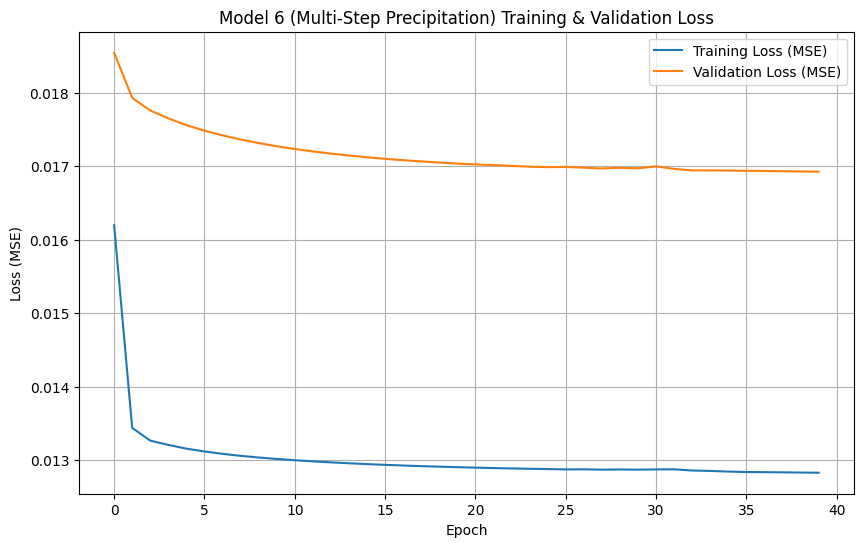

In [ ]:
# Cell 33: Compile and Train Model 6
# Write your code here
if model_ms_precip is not None and X_train_ms_p is not None:
    print("\n--- Compiling and Training Model 6 ---")
    model_ms_precip.compile(optimizer='adam',
                            loss='mean_squared_error',
                            metrics=['mean_absolute_error'])

    EPOCHS = 40 # Might need more epochs for multi-step
    BATCH_SIZE = 32

    history_ms_precip = model_ms_precip.fit(
        X_train_ms_p, y_train_ms_p,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_test_ms_p, y_test_ms_p),
        verbose=1,
        shuffle=False
    )
    print("\nTraining completed.")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history_ms_precip.history['loss'], label='Training Loss (MSE)')
    plt.plot(history_ms_precip.history['val_loss'], label='Validation Loss (MSE)')
    plt.title('Model 6 (Multi-Step Precipitation) Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Skipping model compilation/training as model or data is not available.")
    history_ms_precip = None

#### Evaluate Model 6 Performance:
Evaluate the trained multi-step precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set. These metrics represent the average error over the 5 predicted time steps.

Discuss how you could calculate and analyze the performance metrics (e.g., MSE or MAE) specifically for each of the 5 predicted future time steps.

In [ ]:
#Evaluate Model 6 Performance
if model_ms_precip is not None and X_test_ms_p is not None:
    print("\n--- Evaluating Model 6 Performance on Test Set ---")
    results_ms_precip = model_ms_precip.evaluate(X_test_ms_p, y_test_ms_p, verbose=0)

    mse_ms_precip = results_ms_precip[0]
    mae_ms_precip = results_ms_precip[1]
    rmse_ms_precip = np.sqrt(mse_ms_precip) # Overall RMSE across all steps

    print(f"Overall Test Loss (Mean Squared Error - MSE): {mse_ms_precip:.6f}")
    print(f"Overall Test Mean Absolute Error (MAE):       {mae_ms_precip:.6f}")
    print(f"Overall Test Root Mean Squared Error (RMSE):  {rmse_ms_precip:.6f}")
    print("(Metrics are averaged over the 5 predicted time steps)")

    # Discussion on per-step metrics:
    print("\nDiscussion: Evaluating performance per prediction step")
    print("To evaluate per step, predict on the test set, then calculate metrics")
    print("comparing the i-th prediction step with the i-th actual step.")
    # y_pred_ms_p_scaled = model_ms_precip.predict(X_test_ms_p) # Shape (samples, 5, 1)
    # for step in range(PREDICTION_HORIZON):
    #     step_mae = mean_absolute_error(y_test_ms_p[:, step, 0], y_pred_ms_p_scaled[:, step, 0])
    #     # Inverse transform before calculating metrics on actual scale is more meaningful
    #     print(f"  - MAE for step {step+1} (scaled): {step_mae:.6f}") # Note: this is scaled MAE

    # Store overall metrics
    model6_metrics = {'MSE': mse_ms_precip, 'MAE': mae_ms_precip, 'RMSE': rmse_ms_precip}

else:
    print("Skipping model evaluation as model or test data is not available.")
    model6_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


--- Evaluating Model 6 Performance on Test Set ---
Overall Test Loss (Mean Squared Error - MSE): 0.016928
Overall Test Mean Absolute Error (MAE):       0.070609
Overall Test Root Mean Squared Error (RMSE):  0.130106
(Metrics are averaged over the 5 predicted time steps)

Discussion: Evaluating performance per prediction step
To evaluate per step, predict on the test set, then calculate metrics
comparing the i-th prediction step with the i-th actual step.


#### Predict and Visualize Model 6 Results:
Use the trained model to make predictions on the test set input sequences.

The model output will have shape (num_test_samples, prediction_horizon, 1).

Inverse scale the predictions and the actual test precipitation sequences.

Select a few example test samples and plot their actual future precipitation sequences against the model's predicted sequences. Alternatively, plot the average predicted precipitation across the test set for each of the 5 steps against the actual average.


--- Predicting and Visualizing Model 6 Results ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Plotting example predictions vs actuals:


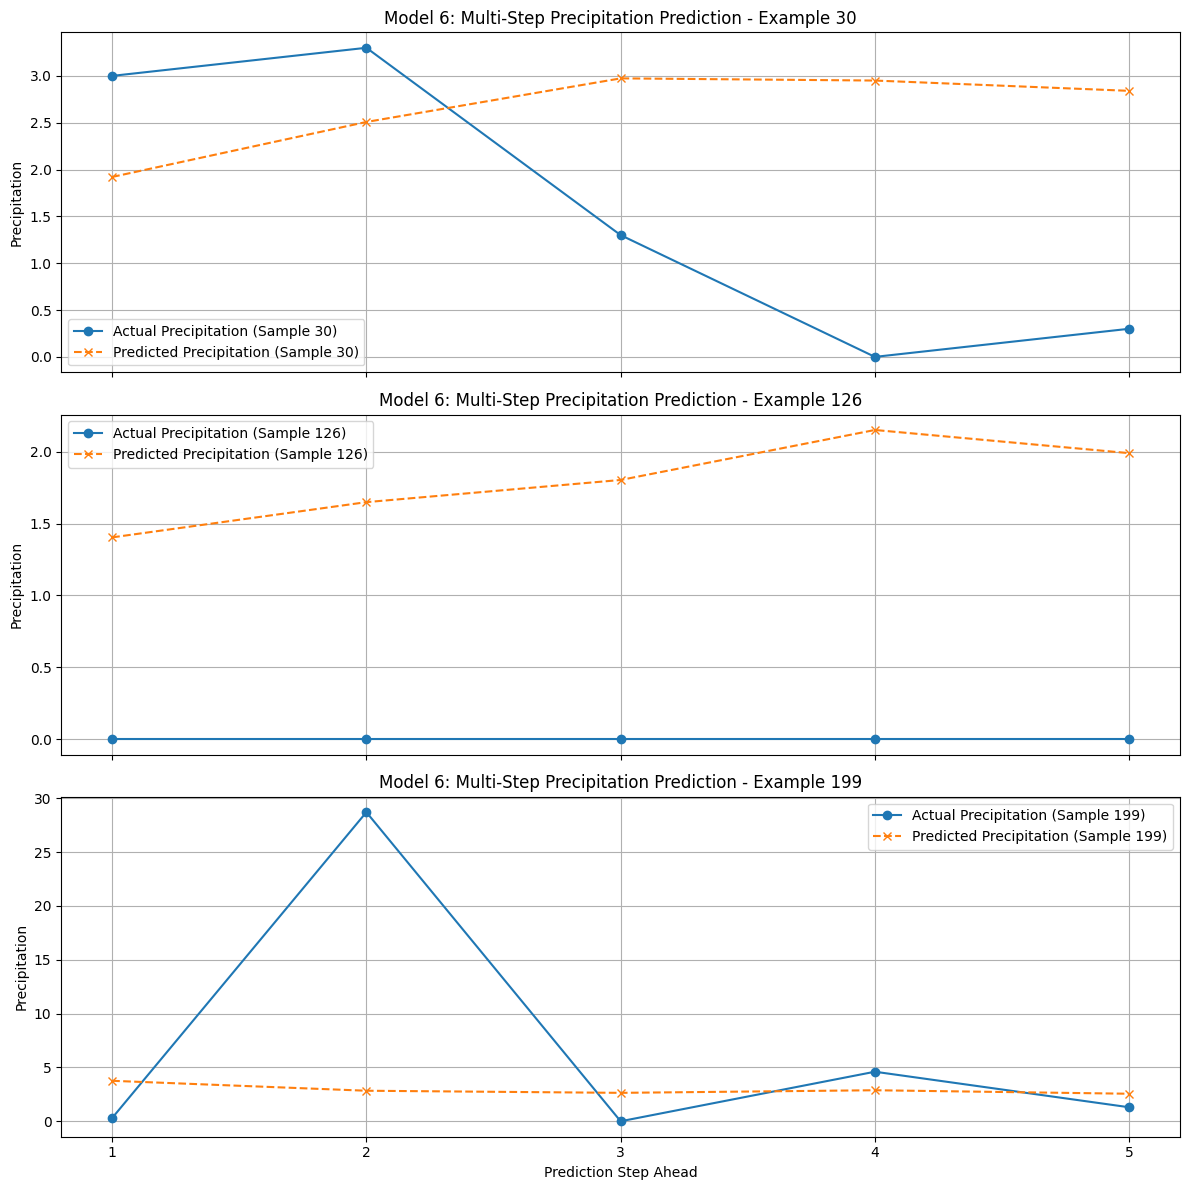


Plotting average prediction vs average actual for each step:


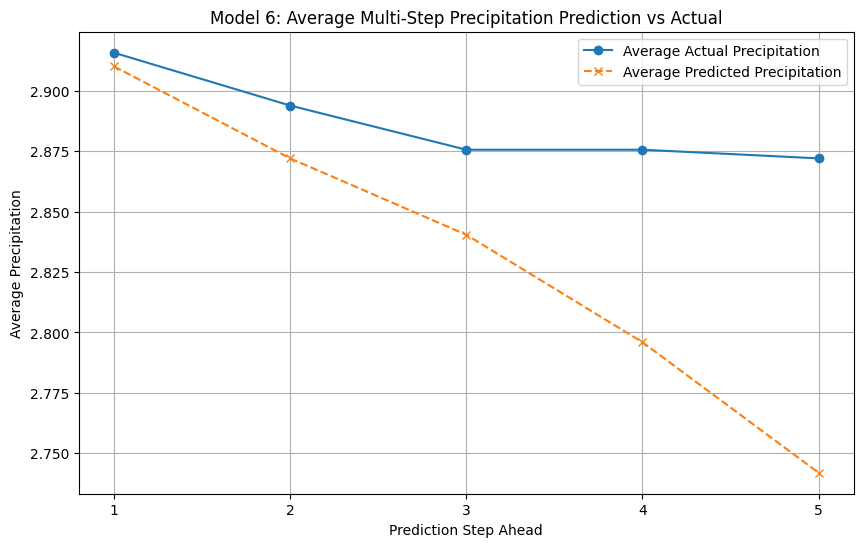

In [ ]:
#Predict and Visualize Model 6 Results
if model_ms_precip is not None and X_test_ms_p is not None and scaler_ms_precip is not None:
    print("\n--- Predicting and Visualizing Model 6 Results ---")
    # Make predictions (scaled)
    y_pred_ms_p_scaled = model_ms_precip.predict(X_test_ms_p) # Shape: (num_test_samples, prediction_horizon, 1)

    # Inverse transform predictions and actual values
    # Reshape for scaler: Need (samples * horizon, n_features)
    target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)
    num_samples = y_pred_ms_p_scaled.shape[0]

    # Inverse Predictions
    dummy_pred_ms = np.zeros((num_samples * PREDICTION_HORIZON, N_FEATURES))
    dummy_pred_ms[:, target_col_index_precip] = y_pred_ms_p_scaled.flatten()
    y_pred_ms_p_actual_flat = scaler_ms_precip.inverse_transform(dummy_pred_ms)[:, target_col_index_precip]
    y_pred_ms_p_actual = y_pred_ms_p_actual_flat.reshape(num_samples, PREDICTION_HORIZON) # Reshape back

    # Inverse Actual (y_test)
    dummy_actual_ms = np.zeros((num_samples * PREDICTION_HORIZON, N_FEATURES))
    dummy_actual_ms[:, target_col_index_precip] = y_test_ms_p.flatten()
    y_test_ms_p_actual_flat = scaler_ms_precip.inverse_transform(dummy_actual_ms)[:, target_col_index_precip]
    y_test_ms_p_actual = y_test_ms_p_actual_flat.reshape(num_samples, PREDICTION_HORIZON) # Reshape back

    # Plotting examples
    print("Plotting example predictions vs actuals:")
    num_examples_to_plot = 3
    example_indices = np.random.choice(num_samples, num_examples_to_plot, replace=False)

    fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
    if num_examples_to_plot == 1: axes = [axes] # Make iterable

    for i, idx in enumerate(example_indices):
        time_steps = np.arange(1, PREDICTION_HORIZON + 1)
        axes[i].plot(time_steps, y_test_ms_p_actual[idx, :], label=f'Actual Precipitation (Sample {idx})', marker='o', linestyle='-')
        axes[i].plot(time_steps, y_pred_ms_p_actual[idx, :], label=f'Predicted Precipitation (Sample {idx})', marker='x', linestyle='--')
        axes[i].set_title(f'Model 6: Multi-Step Precipitation Prediction - Example {idx}')
        axes[i].set_ylabel('Precipitation')
        axes[i].legend()
        axes[i].grid(True)
        axes[i].set_xticks(time_steps)

    axes[-1].set_xlabel('Prediction Step Ahead')
    plt.tight_layout()
    plt.show()

    # Plotting average prediction per step
    print("\nPlotting average prediction vs average actual for each step:")
    avg_actual_per_step = np.mean(y_test_ms_p_actual, axis=0)
    avg_pred_per_step = np.mean(y_pred_ms_p_actual, axis=0)

    plt.figure(figsize=(10, 6))
    time_steps = np.arange(1, PREDICTION_HORIZON + 1)
    plt.plot(time_steps, avg_actual_per_step, label='Average Actual Precipitation', marker='o')
    plt.plot(time_steps, avg_pred_per_step, label='Average Predicted Precipitation', marker='x', linestyle='--')
    plt.title('Model 6: Average Multi-Step Precipitation Prediction vs Actual')
    plt.xlabel('Prediction Step Ahead')
    plt.ylabel('Average Precipitation')
    plt.legend()
    plt.grid(True)
    plt.xticks(time_steps)
    plt.show()

else:
    print("Skipping prediction/visualization as model, data, or scaler is not available.")

### Model 7: Predict multiple (prediction_horizon=5) temp_max values in future

#### Data Preparation for Multi-Step temp_max Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_max values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_max:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_max values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 7:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 7 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 7 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_max sequences. Plot actual vs. predicted future temp_max sequences for example samples or averages.


==================== Running Multi-Step Model for: temp_max ====================
X_train: (1154, 10, 4), y_train: (1154, 5, 1), X_test: (279, 10, 4), y_test: (279, 5, 1)

--- Building LSTM Model for temp_max ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_MS_temp_max"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 5)              │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,255 (43.96 KB)

 Trainable params: 11,255 (43.96 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling & Training Model for temp_max ---
Training completed.

--- Evaluating Model for temp_max ---
Overall Test MSE: 0.010035, MAE: 0.080274, RMSE: 0.100175

--- Predicting and Visualizing Avg Results for temp_max ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


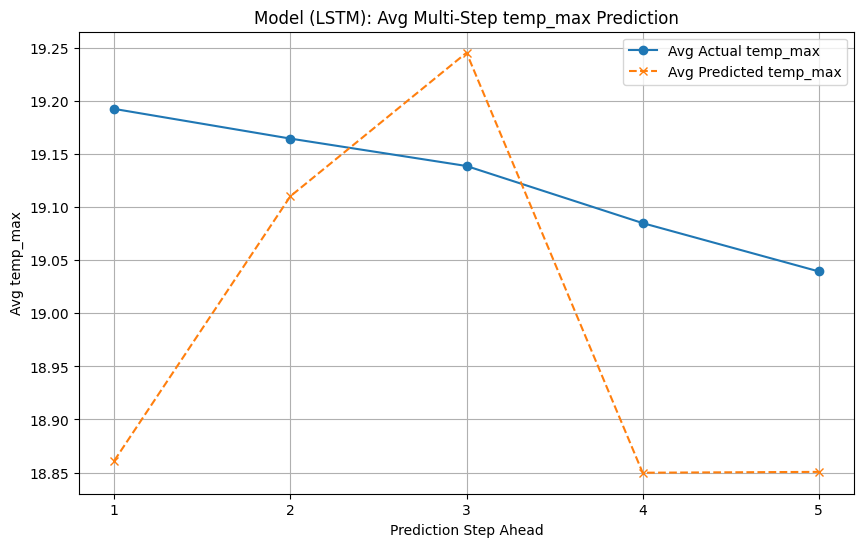


==================== Finished Multi-Step Model for: temp_max ====================

==================== Running Multi-Step Model for: temp_min ====================
X_train: (1154, 10, 4), y_train: (1154, 5, 1), X_test: (279, 10, 4), y_test: (279, 5, 1)

--- Building LSTM Model for temp_min ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_MS_temp_min"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 5)              │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,255 (43.96 KB)

 Trainable params: 11,255 (43.96 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling & Training Model for temp_min ---
Training completed.

--- Evaluating Model for temp_min ---
Overall Test MSE: 0.006935, MAE: 0.066772, RMSE: 0.083279

--- Predicting and Visualizing Avg Results for temp_min ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


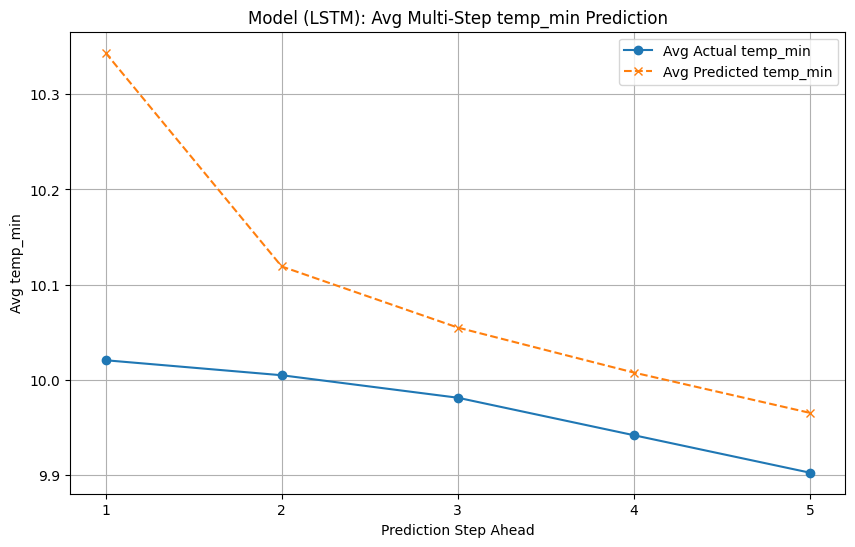


==================== Finished Multi-Step Model for: temp_min ====================

==================== Running Multi-Step Model for: wind ====================
X_train: (1154, 10, 4), y_train: (1154, 5, 1), X_test: (279, 10, 4), y_test: (279, 5, 1)

--- Building LSTM Model for wind ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_MS_wind"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 5)              │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,255 (43.96 KB)

 Trainable params: 11,255 (43.96 KB)

 Non-trainable params: 0 (0.00 B)


--- Compiling & Training Model for wind ---
Training completed.

--- Evaluating Model for wind ---
Overall Test MSE: 0.018466, MAE: 0.104223, RMSE: 0.135890

--- Predicting and Visualizing Avg Results for wind ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


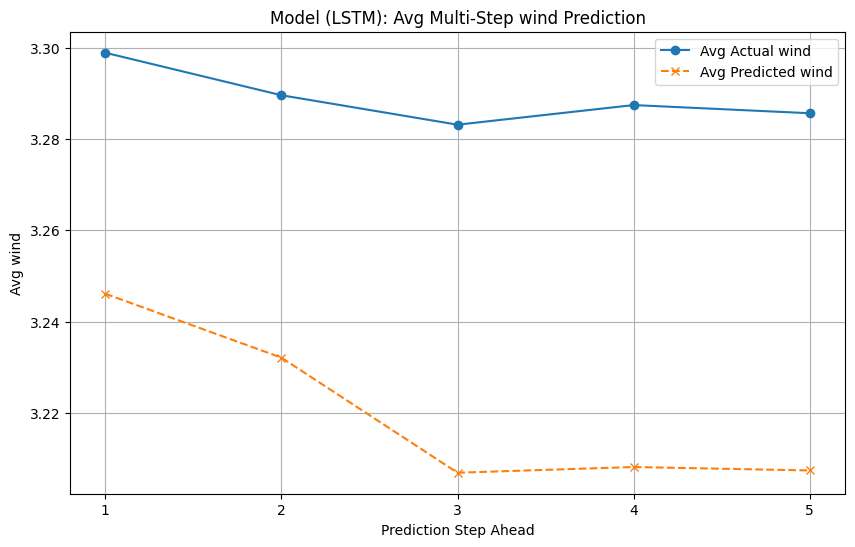


==================== Finished Multi-Step Model for: wind ====================


In [ ]:
#Function Template for Multi-Step Single-Target Models (Corrected)
from tensorflow.keras.layers import Reshape, Dropout # Added Dropout optionally

def run_multistep_single_target_model(df, target_feature, features, lookback, horizon, test_split_ratio, epochs=40, batch_size=32, model_type='LSTM'):
    """
    Runs a multi-step RNN model for a single target feature. (Corrected Architecture)
    Returns metrics dictionary.
    """
    if 'df' not in locals() or not all(f in df.columns for f in features) or target_feature not in df.columns:
        print(f"Error: DataFrame 'df' not available or missing required columns for {target_feature}.")
        return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}

    print(f"\n{'='*20} Running Multi-Step Model for: {target_feature} {'='*20}")

    # 1. Data Prep
    n_features = len(features)
    data_for_scaling = df[features].values
    split_index = int(len(data_for_scaling) * (1 - test_split_ratio))
    train_data = data_for_scaling[:split_index]
    test_data = data_for_scaling[split_index:]

    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data)

    target_col_index = features.index(target_feature)

    X_train, y_train = create_multistep_sequences(
        scaled_train_data, scaled_train_data[:, target_col_index], lookback, horizon
    )
    X_test, y_test = create_multistep_sequences(
        scaled_test_data, scaled_test_data[:, target_col_index], lookback, horizon
    )

    if X_train.size == 0 or X_test.size == 0:
         print(f"Error: Not enough data to create multi-step sequences for {target_feature}.")
         return {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}

    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

    # 2. Build Model (Corrected Architecture)
    print(f"\n--- Building {model_type} Model for {target_feature} ---")
    model = Sequential(name=f'Model_MS_{target_feature}')
    # --- Architecture Change START ---
    if model_type == 'LSTM':
        # return_sequences=False (or default) outputs only the last step's output
        model.add(LSTM(50, input_shape=(lookback, n_features), name=f'{model_type}_Layer'))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(lookback, n_features), name=f'{model_type}_Layer'))
    else: # SimpleRNN
         model.add(SimpleRNN(50, input_shape=(lookback, n_features), name=f'{model_type}_Layer'))

    # Optional Dropout
    # model.add(Dropout(0.2))

    # Dense layer predicts all horizon steps (outputs shape: (None, horizon))
    model.add(Dense(horizon, name='Dense_Output'))

    # Reshape to match target shape (None, horizon, 1)
    model.add(Reshape((horizon, 1), name='Reshape_Output'))
    # --- Architecture Change END ---

    model.summary() # Verify output shape is (None, horizon, 1) e.g., (None, 5, 1)

    # 3. Compile & Train
    print(f"\n--- Compiling & Training Model for {target_feature} ---")
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0, shuffle=False)
    print("Training completed.")

    # 4. Evaluate
    print(f"\n--- Evaluating Model for {target_feature} ---")
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[0]
    mae = results[1]
    rmse = np.sqrt(mse)
    print(f"Overall Test MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}")
    metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

    # 5. Predict & Visualize (Simplified: only average plot)
    visualize = True
    if visualize:
        print(f"\n--- Predicting and Visualizing Avg Results for {target_feature} ---")
        y_pred_scaled = model.predict(X_test) # Shape (None, horizon, 1)
        num_samples_test = y_pred_scaled.shape[0]

        # Inverse Transform needs careful handling of shapes
        dummy_pred = np.zeros((num_samples_test * horizon, n_features))
        # Flatten prediction correctly before placing in dummy array
        dummy_pred[:, target_col_index] = y_pred_scaled.reshape(-1) # Flatten prediction
        y_pred_actual_flat = scaler.inverse_transform(dummy_pred)[:, target_col_index]
        y_pred_actual = y_pred_actual_flat.reshape(num_samples_test, horizon) # Reshape back

        dummy_actual = np.zeros((num_samples_test * horizon, n_features))
        # Flatten target correctly before placing in dummy array
        dummy_actual[:, target_col_index] = y_test.reshape(-1) # Flatten target
        y_test_actual_flat = scaler.inverse_transform(dummy_actual)[:, target_col_index]
        y_test_actual = y_test_actual_flat.reshape(num_samples_test, horizon) # Reshape back

        avg_actual_step = np.mean(y_test_actual, axis=0)
        avg_pred_step = np.mean(y_pred_actual, axis=0)

        plt.figure(figsize=(10, 6))
        steps = np.arange(1, horizon + 1)
        plt.plot(steps, avg_actual_step, label=f'Avg Actual {target_feature}', marker='o')
        plt.plot(steps, avg_pred_step, label=f'Avg Predicted {target_feature}', marker='x', linestyle='--')
        plt.title(f'Model ({model_type}): Avg Multi-Step {target_feature} Prediction')
        plt.xlabel('Prediction Step Ahead'); plt.ylabel(f'Avg {target_feature}')
        plt.legend(); plt.grid(True); plt.xticks(steps)
        plt.show()

    print(f"\n{'='*20} Finished Multi-Step Model for: {target_feature} {'='*20}")
    return metrics

# --- Run Model 7: temp_max ---
# Now this call will use the corrected function definition
model7_metrics = run_multistep_single_target_model(
    df, 'temp_max', FEATURES, LOOKBACK_WINDOW, PREDICTION_HORIZON, TEST_SPLIT_RATIO
)

# --- Run Model 8: temp_min ---
# This will also use the corrected function
model8_metrics = run_multistep_single_target_model(
    df, 'temp_min', FEATURES, LOOKBACK_WINDOW, PREDICTION_HORIZON, TEST_SPLIT_RATIO
)

# --- Run Model 9: wind ---
# This will also use the corrected function
model9_metrics = run_multistep_single_target_model(
    df, 'wind', FEATURES, LOOKBACK_WINDOW, PREDICTION_HORIZON, TEST_SPLIT_RATIO
)

### Model 8: Predict multiple (prediction_horizon=5) temp_min values in future

#### Data Preparation for Multi-Step temp_min Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_min values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_min:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_min values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 8:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 8 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 8 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_min sequences. Plot actual vs. predicted future temp_min sequences for example samples or averages.


==================== Setting up Model 8: Multi-Step Predict 'temp_min' ====================

--- 1. Data Preparation ---
X_train shape: (1154, 10, 4)
y_train shape: (1154, 5, 1)
X_test shape: (279, 10, 4)
y_test shape: (279, 5, 1)
Data preparation successful.

--- 2. Building Model ---
Model Summary (Model_8_MS_TempMin):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_8_MS_TempMin"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989 (70.27 KB)

 Trainable params: 17,989 (70.27 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Compiling and Training ---
Starting training for 50 epochs...
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1577 - mean_absolute_error: 0.3403 - val_loss: 0.0223 - val_mean_absolute_error: 0.1263
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.1293 - val_loss: 0.0111 - val_mean_absolute_error: 0.0847
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.1121 - val_loss: 0.0086 - val_mean_absolute_error: 0.0730
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.1073 - val_loss: 0.0090 - val_mean_absolute_error: 0.0756
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0163 - mean_absolute_error: 0.1012 - val_loss: 0.0081 - val_mean_absolute_error: 0.0715
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - mean_absolute_error: 0.1041 - val_loss: 0.0090 - val_mean_absolute_error: 0.0757
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━

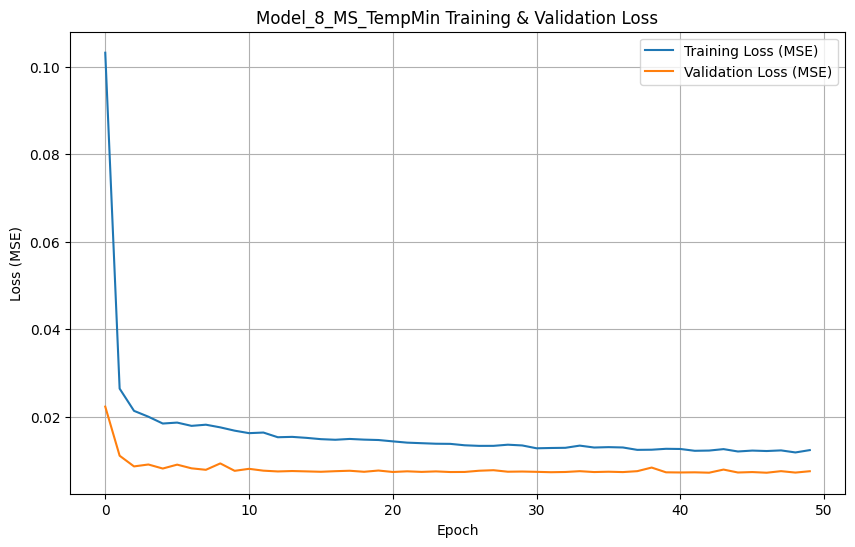


--- 4. Evaluating Performance ---
Overall Test Loss (Mean Squared Error - MSE): 0.007509
Overall Test Mean Absolute Error (MAE):       0.069269
Overall Test Root Mean Squared Error (RMSE):  0.086655
(Metrics averaged over the 5 predicted time steps)

Discussion: Performance per predicted time step requires analyzing predictions step-by-step.

--- 5. Predicting and Visualizing ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Plotting example predictions vs actuals...


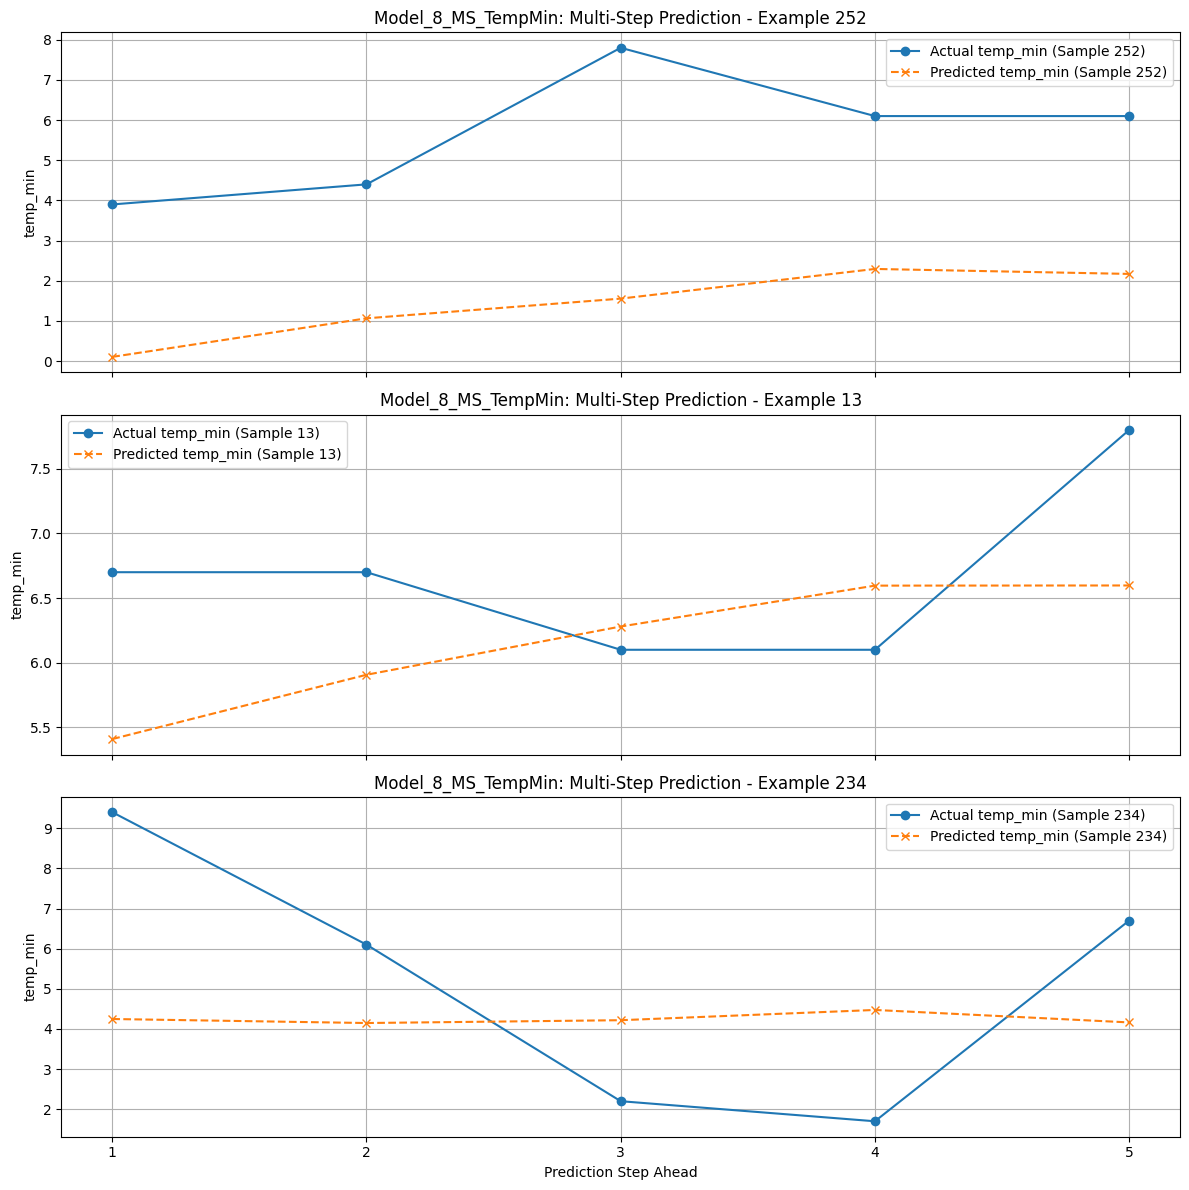


Plotting average prediction vs average actual for each step:


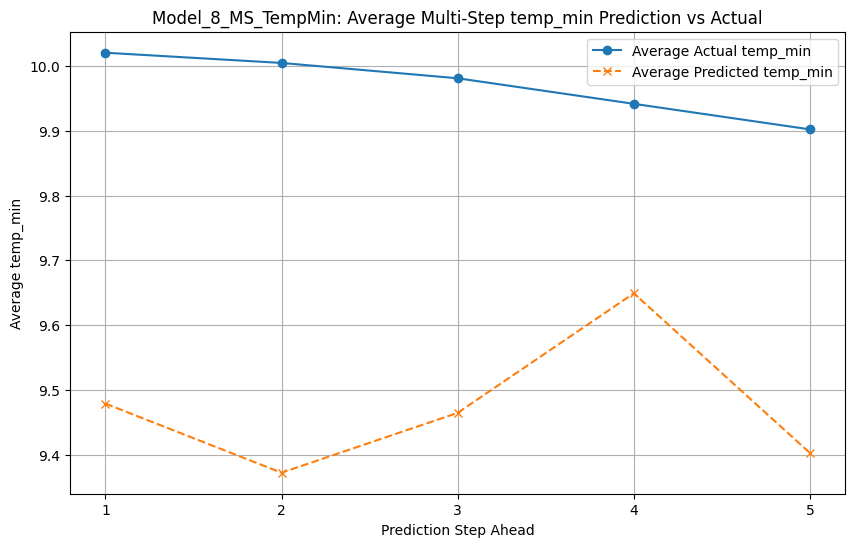


==================== Model 8 Execution Finished ====================


In [ ]:
#Model 8 - Multi-Step Temp_Min Prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout # Import necessary layers

# --- Assume these are defined earlier ---
# from helper_functions import create_multistep_sequences # Or paste the function definition here
# df = pd.read_csv(...) # Make sure df is loaded and preprocessed (NaNs handled)
# FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
# LOOKBACK_WINDOW = 10
# PREDICTION_HORIZON = 5
# TEST_SPLIT_RATIO = 0.2
# N_FEATURES = len(FEATURES)
# create_multistep_sequences function should be defined as previously shown
# --- End Assumptions ---

TARGET_FEATURE_TM = 'temp_min'
MODEL_NAME = 'Model_8_MS_TempMin'

print(f"\n{'='*20} Setting up Model 8: Multi-Step Predict '{TARGET_FEATURE_TM}' {'='*20}")

# Check if necessary variables exist
required_vars = ['df', 'FEATURES', 'LOOKBACK_WINDOW', 'PREDICTION_HORIZON', 'TEST_SPLIT_RATIO', 'N_FEATURES', 'create_multistep_sequences']
if not all(v in locals() or v in globals() for v in required_vars):
    print("Error: One or more required variables/functions (df, FEATURES, etc.) not defined.")
    # Exit or raise error if in a script, or just print if in notebook
    model8_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan} # Set default metrics
else:
    # 1. Data Preparation for Multi-Step temp_min Prediction
    print("\n--- 1. Data Preparation ---")
    if TARGET_FEATURE_TM not in FEATURES:
        print(f"Error: Target feature '{TARGET_FEATURE_TM}' not in FEATURES list.")
        model8_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    else:
        try:
            data_for_scaling_tm = df[FEATURES].values
            split_index_tm = int(len(data_for_scaling_tm) * (1 - TEST_SPLIT_RATIO))
            train_data_tm = data_for_scaling_tm[:split_index_tm]
            test_data_tm = data_for_scaling_tm[split_index_tm:]

            scaler_ms_temp_min = MinMaxScaler()
            scaled_train_data_tm = scaler_ms_temp_min.fit_transform(train_data_tm)
            scaled_test_data_tm = scaler_ms_temp_min.transform(test_data_tm)

            target_col_index_tm = FEATURES.index(TARGET_FEATURE_TM)

            X_train_ms_tm, y_train_ms_tm = create_multistep_sequences(
                scaled_train_data_tm,
                scaled_train_data_tm[:, target_col_index_tm], # Target is temp_min column
                LOOKBACK_WINDOW,
                PREDICTION_HORIZON
            )
            X_test_ms_tm, y_test_ms_tm = create_multistep_sequences(
                scaled_test_data_tm,
                scaled_test_data_tm[:, target_col_index_tm], # Target is temp_min column
                LOOKBACK_WINDOW,
                PREDICTION_HORIZON
            )

            if X_train_ms_tm.size == 0 or X_test_ms_tm.size == 0:
                 print(f"Error: Not enough data to create multi-step sequences for {TARGET_FEATURE_TM}.")
                 model8_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
                 # Set data vars to None to prevent downstream errors
                 X_train_ms_tm, y_train_ms_tm, X_test_ms_tm, y_test_ms_tm = None, None, None, None
            else:
                print(f"X_train shape: {X_train_ms_tm.shape}") # Should be (samples, 10, 4)
                print(f"y_train shape: {y_train_ms_tm.shape}") # Should be (samples, 5, 1)
                print(f"X_test shape: {X_test_ms_tm.shape}")
                print(f"y_test shape: {y_test_ms_tm.shape}")   # Should be (samples, 5, 1)
                print("Data preparation successful.")

        except Exception as e:
            print(f"An error occurred during data preparation: {e}")
            model8_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
            X_train_ms_tm, y_train_ms_tm, X_test_ms_tm, y_test_ms_tm = None, None, None, None

    # Proceed only if data preparation was successful
    if X_train_ms_tm is not None:
        # 2. Build RNN Model for Multi-Step temp_min
        print("\n--- 2. Building Model ---")
        # Using LSTM -> Dense -> Reshape architecture, suitable for direct multi-step forecast
        # Note: The architecture return_sequences=True -> TimeDistributed(Dense(1)) outputs
        # a sequence of length LOOKBACK_WINDOW (10), not PREDICTION_HORIZON (5),
        # causing a shape mismatch with the target data created by create_multistep_sequences.
        model_ms_temp_min = Sequential(name=MODEL_NAME)
        model_ms_temp_min.add(LSTM(units=64, # Increased units slightly
                                   input_shape=(LOOKBACK_WINDOW, N_FEATURES),
                                   name='LSTM_Layer')) # return_sequences=False is default
        model_ms_temp_min.add(Dropout(0.2, name='Dropout_Layer')) # Added dropout for regularization
        model_ms_temp_min.add(Dense(units=PREDICTION_HORIZON, name='Dense_Output')) # Predict all steps
        model_ms_temp_min.add(Reshape((PREDICTION_HORIZON, 1), name='Reshape_Output')) # Reshape to target format

        print(f"Model Summary ({MODEL_NAME}):")
        model_ms_temp_min.summary()

        # 3. Compile and Train Model 8
        print("\n--- 3. Compiling and Training ---")
        EPOCHS_M8 = 50 # Increased epochs, monitor loss plot
        BATCH_SIZE_M8 = 32

        model_ms_temp_min.compile(optimizer='adam',
                                  loss='mean_squared_error',
                                  metrics=['mean_absolute_error'])

        print(f"Starting training for {EPOCHS_M8} epochs...")
        history_ms_temp_min = model_ms_temp_min.fit(
            X_train_ms_tm, y_train_ms_tm,
            epochs=EPOCHS_M8,
            batch_size=BATCH_SIZE_M8,
            validation_data=(X_test_ms_tm, y_test_ms_tm),
            verbose=1, # Show progress
            shuffle=False # Crucial for time series
        )
        print("Training completed.")

        # Plot training history
        print("Plotting training history...")
        plt.figure(figsize=(10, 6))
        plt.plot(history_ms_temp_min.history['loss'], label='Training Loss (MSE)')
        plt.plot(history_ms_temp_min.history['val_loss'], label='Validation Loss (MSE)')
        plt.title(f'{MODEL_NAME} Training & Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 4. Evaluate Model 8 Performance
        print("\n--- 4. Evaluating Performance ---")
        results_ms_tm = model_ms_temp_min.evaluate(X_test_ms_tm, y_test_ms_tm, verbose=0)

        mse_ms_tm = results_ms_tm[0]
        mae_ms_tm = results_ms_tm[1]
        rmse_ms_tm = np.sqrt(mse_ms_tm)

        print(f"Overall Test Loss (Mean Squared Error - MSE): {mse_ms_tm:.6f}")
        print(f"Overall Test Mean Absolute Error (MAE):       {mae_ms_tm:.6f}")
        print(f"Overall Test Root Mean Squared Error (RMSE):  {rmse_ms_tm:.6f}")
        print("(Metrics averaged over the 5 predicted time steps)")

        print("\nDiscussion: Performance per predicted time step requires analyzing predictions step-by-step.")
        # To do this: predict -> inverse_scale -> calculate metrics for y_test[:, step] vs y_pred[:, step]

        # Store metrics
        model8_metrics = {'MSE': mse_ms_tm, 'MAE': mae_ms_tm, 'RMSE': rmse_ms_tm}


        # 5. Predict and Visualize Model 8 Results
        print("\n--- 5. Predicting and Visualizing ---")
        try:
            y_pred_ms_tm_scaled = model_ms_temp_min.predict(X_test_ms_tm) # Shape: (num_test_samples, 5, 1)
            num_samples_test_tm = y_pred_ms_tm_scaled.shape[0]

            # Inverse transform predictions
            dummy_pred_ms_tm = np.zeros((num_samples_test_tm * PREDICTION_HORIZON, N_FEATURES))
            dummy_pred_ms_tm[:, target_col_index_tm] = y_pred_ms_tm_scaled.reshape(-1) # Flatten predictions
            y_pred_ms_tm_actual_flat = scaler_ms_temp_min.inverse_transform(dummy_pred_ms_tm)[:, target_col_index_tm]
            y_pred_ms_tm_actual = y_pred_ms_tm_actual_flat.reshape(num_samples_test_tm, PREDICTION_HORIZON) # Reshape back

            # Inverse transform actual values (y_test)
            dummy_actual_ms_tm = np.zeros((num_samples_test_tm * PREDICTION_HORIZON, N_FEATURES))
            dummy_actual_ms_tm[:, target_col_index_tm] = y_test_ms_tm.reshape(-1) # Flatten actuals
            y_test_ms_tm_actual_flat = scaler_ms_temp_min.inverse_transform(dummy_actual_ms_tm)[:, target_col_index_tm]
            y_test_ms_tm_actual = y_test_ms_tm_actual_flat.reshape(num_samples_test_tm, PREDICTION_HORIZON) # Reshape back

            # --- Visualization: Example Samples ---
            print("Plotting example predictions vs actuals...")
            num_examples_to_plot = 3
            if num_samples_test_tm < num_examples_to_plot:
                 num_examples_to_plot = num_samples_test_tm # Adjust if test set is small
            example_indices = np.random.choice(num_samples_test_tm, num_examples_to_plot, replace=False)

            fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
            if num_examples_to_plot == 1: axes = [axes] # Make iterable

            for i, idx in enumerate(example_indices):
                time_steps = np.arange(1, PREDICTION_HORIZON + 1)
                axes[i].plot(time_steps, y_test_ms_tm_actual[idx, :], label=f'Actual {TARGET_FEATURE_TM} (Sample {idx})', marker='o', linestyle='-')
                axes[i].plot(time_steps, y_pred_ms_tm_actual[idx, :], label=f'Predicted {TARGET_FEATURE_TM} (Sample {idx})', marker='x', linestyle='--')
                axes[i].set_title(f'{MODEL_NAME}: Multi-Step Prediction - Example {idx}')
                axes[i].set_ylabel(TARGET_FEATURE_TM)
                axes[i].legend()
                axes[i].grid(True)
                axes[i].set_xticks(time_steps)

            axes[-1].set_xlabel('Prediction Step Ahead')
            plt.tight_layout()
            plt.show()

            # --- Visualization: Average Over Steps ---
            print("\nPlotting average prediction vs average actual for each step:")
            avg_actual_per_step_tm = np.mean(y_test_ms_tm_actual, axis=0)
            avg_pred_per_step_tm = np.mean(y_pred_ms_tm_actual, axis=0)

            plt.figure(figsize=(10, 6))
            time_steps = np.arange(1, PREDICTION_HORIZON + 1)
            plt.plot(time_steps, avg_actual_per_step_tm, label=f'Average Actual {TARGET_FEATURE_TM}', marker='o')
            plt.plot(time_steps, avg_pred_per_step_tm, label=f'Average Predicted {TARGET_FEATURE_TM}', marker='x', linestyle='--')
            plt.title(f'{MODEL_NAME}: Average Multi-Step {TARGET_FEATURE_TM} Prediction vs Actual')
            plt.xlabel('Prediction Step Ahead')
            plt.ylabel(f'Average {TARGET_FEATURE_TM}')
            plt.legend()
            plt.grid(True)
            plt.xticks(time_steps)
            plt.show()

        except Exception as e:
            print(f"An error occurred during prediction or visualization: {e}")

    else:
         # This block runs if data prep failed earlier
         print(f"Skipping Model Build, Train, Evaluate, Predict for Model 8 due to data preparation issues.")
         # Ensure metrics dict exists even if skipped
         if 'model8_metrics' not in locals():
              model8_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


print(f"\n{'='*20} Model 8 Execution Finished {'='*20}")
# You can access the results via the 'model8_metrics' dictionary

### Model 9: Predict multiple (prediction_horizon=5) wind values in future

#### Data Preparation for Multi-Step Wind Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future wind values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step Wind:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future wind values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 9:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 9 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 9 Results:
Make predictions on the test set. Inverse scale the predictions and actual wind sequences. Plot actual vs. predicted future wind sequences for example samples or averages.


==================== Setting up Model 9: Multi-Step Predict 'wind' ====================

--- 1. Data Preparation ---
X_train shape: (1154, 10, 4)
y_train shape: (1154, 5, 1)
X_test shape: (279, 10, 4)
y_test shape: (279, 5, 1)
Data preparation successful.

--- 2. Building Model ---
Using recommended architecture (LSTM -> Dense -> Reshape) for direct multi-step forecast.
Model Summary (Model_9_MS_Wind_Corrected):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_9_MS_Wind_Corrected"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989 (70.27 KB)

 Trainable params: 17,989 (70.27 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Compiling and Training ---
Starting training for 50 epochs...
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0780 - mean_absolute_error: 0.2211 - val_loss: 0.0238 - val_mean_absolute_error: 0.1144
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0370 - mean_absolute_error: 0.1491 - val_loss: 0.0214 - val_mean_absolute_error: 0.1096
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0329 - mean_absolute_error: 0.1404 - val_loss: 0.0204 - val_mean_absolute_error: 0.1076
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0308 - mean_absolute_error: 0.1367 - val_loss: 0.0200 - val_mean_absolute_error: 0.1067
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.1334 - val_loss: 0.0198 - val_mean_absolute_error: 0.1065
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.1326 - val_loss: 0.0197 - val_mean_absolute_error: 0.1058
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 

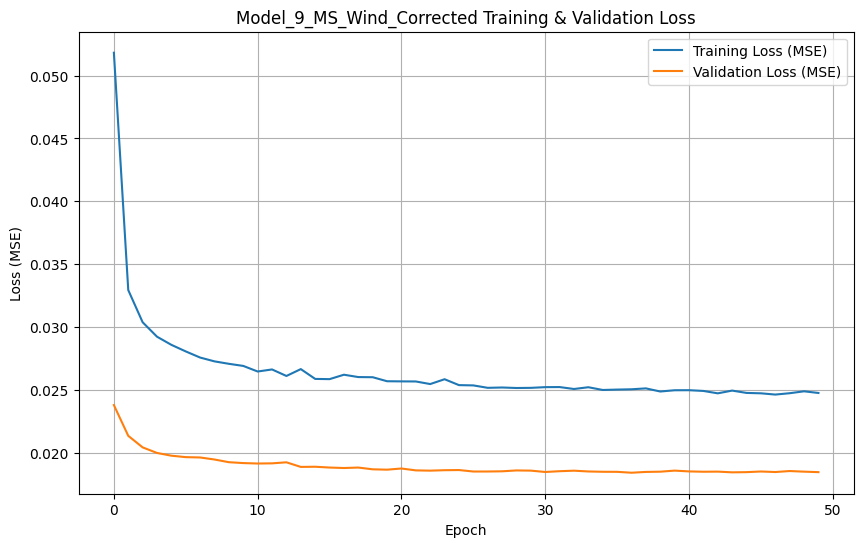


--- 4. Evaluating Performance ---
Overall Test Loss (Mean Squared Error - MSE): 0.018473
Overall Test Mean Absolute Error (MAE):       0.103350
Overall Test Root Mean Squared Error (RMSE):  0.135916
(Metrics averaged over the 5 predicted time steps)

--- 5. Predicting and Visualizing ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Plotting example predictions vs actuals...


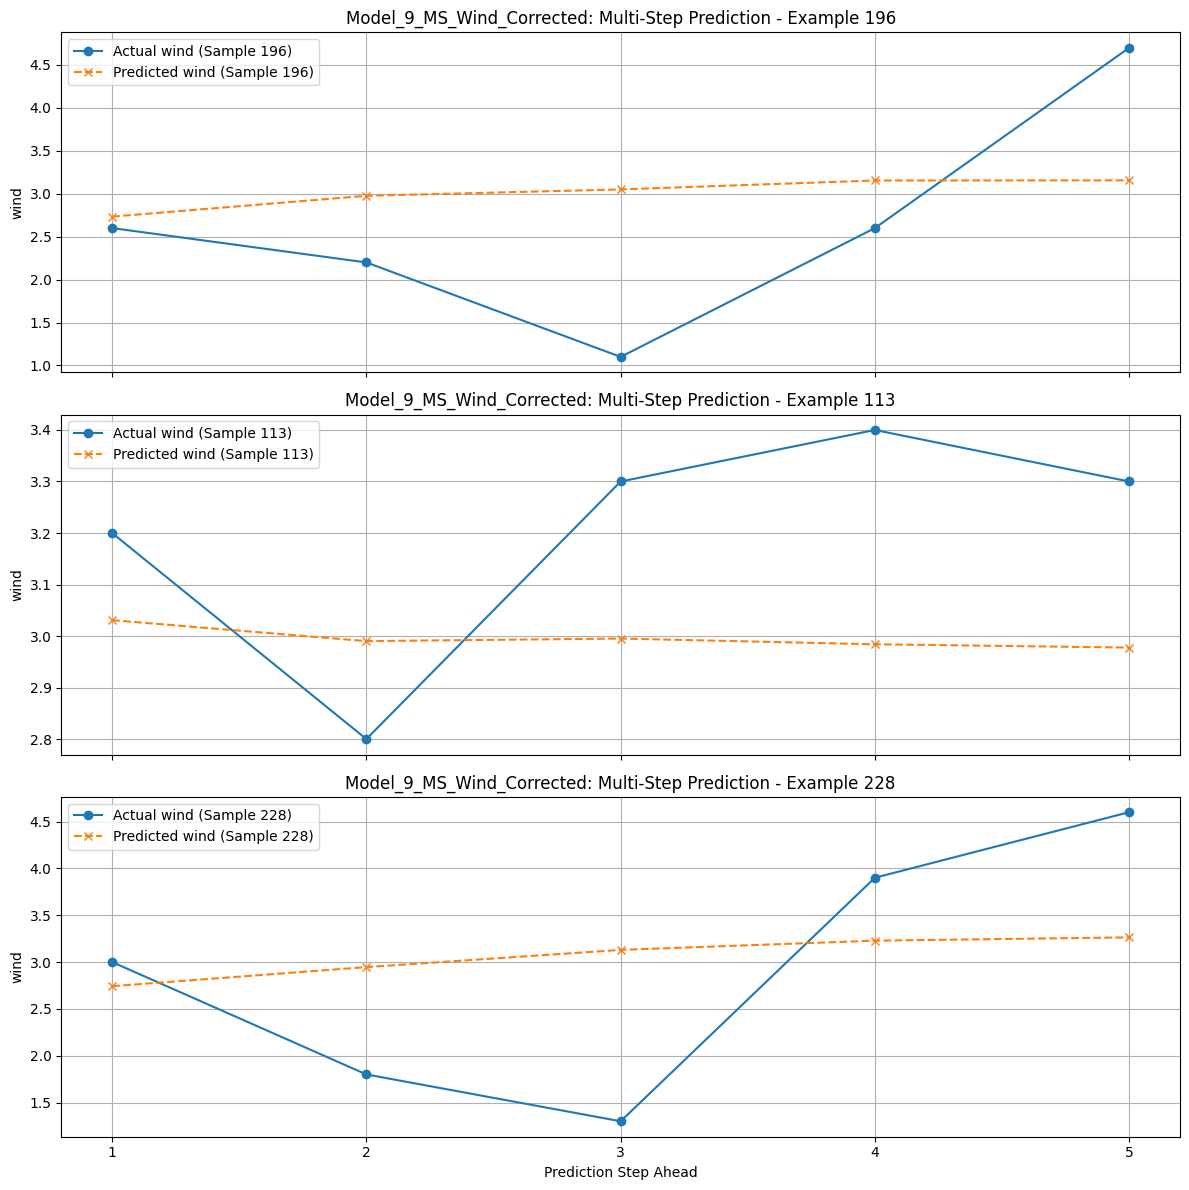


Plotting average prediction vs average actual for each step:


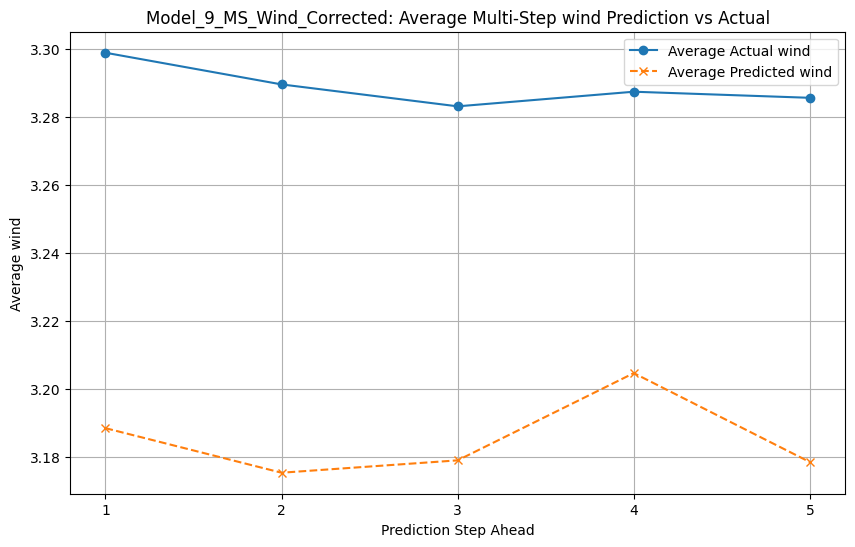


==================== Model 9 Execution Finished ====================


In [ ]:
# Model 9 - Multi-Step Wind Prediction (Corrected Architecture)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout # Import necessary layers

# --- Assume these are defined earlier in the notebook ---
# Required variables: df, FEATURES, LOOKBACK_WINDOW, PREDICTION_HORIZON, TEST_SPLIT_RATIO, N_FEATURES
# Required function: create_multistep_sequences
# --- End Assumptions ---

TARGET_FEATURE_W = 'wind'
MODEL_NAME = 'Model_9_MS_Wind_Corrected' # Updated name to reflect correction

print(f"\n{'='*20} Setting up Model 9: Multi-Step Predict '{TARGET_FEATURE_W}' {'='*20}")

# Initialize metrics dictionary with NaN in case of errors
model9_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
history_ms_wind = None # Initialize history
X_train_ms_w, y_train_ms_w, X_test_ms_w, y_test_ms_w = None, None, None, None # Initialize data vars
model_ms_wind = None # Initialize model var
scaler_ms_wind = None # Initialize scaler var

# Check if necessary variables exist
required_vars = ['df', 'FEATURES', 'LOOKBACK_WINDOW', 'PREDICTION_HORIZON', 'TEST_SPLIT_RATIO', 'N_FEATURES', 'create_multistep_sequences']
if not all(v in locals() or v in globals() for v in required_vars):
    print("Error: One or more required variables/functions (df, FEATURES, etc.) not defined.")
else:
    # 1. Data Preparation for Multi-Step Wind Prediction
    print("\n--- 1. Data Preparation ---")
    if TARGET_FEATURE_W not in FEATURES:
        print(f"Error: Target feature '{TARGET_FEATURE_W}' not in FEATURES list.")
    else:
        try:
            data_for_scaling_w = df[FEATURES].values
            split_index_w = int(len(data_for_scaling_w) * (1 - TEST_SPLIT_RATIO))
            train_data_w = data_for_scaling_w[:split_index_w]
            test_data_w = data_for_scaling_w[split_index_w:]

            # Use a separate scaler instance for this model
            scaler_ms_wind = MinMaxScaler()
            scaled_train_data_w = scaler_ms_wind.fit_transform(train_data_w)
            scaled_test_data_w = scaler_ms_wind.transform(test_data_w)

            target_col_index_w = FEATURES.index(TARGET_FEATURE_W)

            X_train_ms_w, y_train_ms_w = create_multistep_sequences(
                scaled_train_data_w,
                scaled_train_data_w[:, target_col_index_w], # Target is wind column
                LOOKBACK_WINDOW,
                PREDICTION_HORIZON
            )
            X_test_ms_w, y_test_ms_w = create_multistep_sequences(
                scaled_test_data_w,
                scaled_test_data_w[:, target_col_index_w], # Target is wind column
                LOOKBACK_WINDOW,
                PREDICTION_HORIZON
            )

            if X_train_ms_w.size == 0 or X_test_ms_w.size == 0:
                 print(f"Error: Not enough data to create multi-step sequences for {TARGET_FEATURE_W}.")
                 X_train_ms_w, y_train_ms_w, X_test_ms_w, y_test_ms_w = None, None, None, None # Mark data as invalid
            else:
                print(f"X_train shape: {X_train_ms_w.shape}") # Should be (samples, 10, 4)
                print(f"y_train shape: {y_train_ms_w.shape}") # Should be (samples, 5, 1)
                print(f"X_test shape: {X_test_ms_w.shape}")
                print(f"y_test shape: {y_test_ms_w.shape}")   # Should be (samples, 5, 1)
                print("Data preparation successful.")

        except Exception as e:
            print(f"An error occurred during data preparation: {e}")
            X_train_ms_w, y_train_ms_w, X_test_ms_w, y_test_ms_w = None, None, None, None # Mark data as invalid

    # Proceed only if data preparation was successful
    if X_train_ms_w is not None and y_train_ms_w is not None and X_test_ms_w is not None and y_test_ms_w is not None:
        # 2. Build RNN Model for Multi-Step Wind (Using Corrected Architecture)
        print("\n--- 2. Building Model ---")
        print("Using recommended architecture (LSTM -> Dense -> Reshape) for direct multi-step forecast.")

        model_ms_wind = Sequential(name=MODEL_NAME)
        model_ms_wind.add(LSTM(units=64, # Using 64 units
                               input_shape=(LOOKBACK_WINDOW, N_FEATURES),
                               name='LSTM_Layer')) # return_sequences=False is default
        model_ms_wind.add(Dropout(0.2, name='Dropout_Layer')) # Added dropout
        model_ms_wind.add(Dense(units=PREDICTION_HORIZON, name='Dense_Output')) # Predict all 5 steps
        model_ms_wind.add(Reshape((PREDICTION_HORIZON, 1), name='Reshape_Output')) # Reshape to target format (5, 1)

        print(f"Model Summary ({MODEL_NAME}):")
        model_ms_wind.summary() # Output shape should be (None, 5, 1)

        # 3. Compile and Train Model 9
        print("\n--- 3. Compiling and Training ---")
        EPOCHS_M9 = 50 # Adjust as needed, monitor plot
        BATCH_SIZE_M9 = 32

        model_ms_wind.compile(optimizer='adam',
                              loss='mean_squared_error',
                              metrics=['mean_absolute_error'])

        print(f"Starting training for {EPOCHS_M9} epochs...")
        try:
            history_ms_wind = model_ms_wind.fit(
                X_train_ms_w, y_train_ms_w,
                epochs=EPOCHS_M9,
                batch_size=BATCH_SIZE_M9,
                validation_data=(X_test_ms_w, y_test_ms_w),
                verbose=1, # Show progress
                shuffle=False # Crucial for time series
            )
            print("Training completed successfully.")

            # Plot training history
            print("Plotting training history...")
            plt.figure(figsize=(10, 6))
            plt.plot(history_ms_wind.history['loss'], label='Training Loss (MSE)')
            plt.plot(history_ms_wind.history['val_loss'], label='Validation Loss (MSE)')
            plt.title(f'{MODEL_NAME} Training & Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss (MSE)')
            plt.legend()
            plt.grid(True)
            plt.show()
            can_evaluate_predict = True # Okay to proceed

        except Exception as e:
             print(f"\n❌ An unexpected error occurred during training: {e}")
             history_ms_wind = None
             can_evaluate_predict = False # Cannot proceed


        # 4. Evaluate Model 9 Performance (only if training succeeded)
        if can_evaluate_predict:
            print("\n--- 4. Evaluating Performance ---")
            try:
                results_ms_w = model_ms_wind.evaluate(X_test_ms_w, y_test_ms_w, verbose=0)

                mse_ms_w = results_ms_w[0]
                mae_ms_w = results_ms_w[1]
                rmse_ms_w = np.sqrt(mse_ms_w)

                print(f"Overall Test Loss (Mean Squared Error - MSE): {mse_ms_w:.6f}")
                print(f"Overall Test Mean Absolute Error (MAE):       {mae_ms_w:.6f}")
                print(f"Overall Test Root Mean Squared Error (RMSE):  {rmse_ms_w:.6f}")
                print("(Metrics averaged over the 5 predicted time steps)")

                model9_metrics = {'MSE': mse_ms_w, 'MAE': mae_ms_w, 'RMSE': rmse_ms_w}
            except Exception as e:
                print(f"\n❌ An error occurred during evaluation: {e}")
                can_evaluate_predict = False # Cannot proceed to prediction


        # 5. Predict and Visualize Model 9 Results (only if training and eval succeeded)
        if can_evaluate_predict:
            print("\n--- 5. Predicting and Visualizing ---")
            try:
                y_pred_ms_w_scaled = model_ms_wind.predict(X_test_ms_w) # Shape: (num_test_samples, 5, 1)
                num_samples_test_w = y_pred_ms_w_scaled.shape[0]
                pred_horizon_actual = y_pred_ms_w_scaled.shape[1] # Should be 5 now

                if pred_horizon_actual != PREDICTION_HORIZON:
                     print(f"Warning: Prediction horizon {pred_horizon_actual} doesn't match expected {PREDICTION_HORIZON}")

                # --- Inverse Transform ---
                dummy_pred_ms_w = np.zeros((num_samples_test_w * PREDICTION_HORIZON, N_FEATURES))
                dummy_pred_ms_w[:, target_col_index_w] = y_pred_ms_w_scaled.reshape(-1) # Flatten predictions
                y_pred_ms_w_actual_flat = scaler_ms_wind.inverse_transform(dummy_pred_ms_w)[:, target_col_index_w]
                y_pred_ms_w_actual = y_pred_ms_w_actual_flat.reshape(num_samples_test_w, PREDICTION_HORIZON) # Reshape back

                dummy_actual_ms_w = np.zeros((num_samples_test_w * PREDICTION_HORIZON, N_FEATURES))
                dummy_actual_ms_w[:, target_col_index_w] = y_test_ms_w.reshape(-1) # Flatten actuals
                y_test_ms_w_actual_flat = scaler_ms_wind.inverse_transform(dummy_actual_ms_w)[:, target_col_index_w]
                y_test_ms_w_actual = y_test_ms_w_actual_flat.reshape(num_samples_test_w, PREDICTION_HORIZON) # Reshape back

                # --- Visualization: Example Samples ---
                print("Plotting example predictions vs actuals...")
                num_examples_to_plot = 3
                if num_samples_test_w < num_examples_to_plot:
                    num_examples_to_plot = num_samples_test_w
                example_indices = np.random.choice(num_samples_test_w, num_examples_to_plot, replace=False)

                fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
                if num_examples_to_plot == 1: axes = [axes]

                for i, idx in enumerate(example_indices):
                    time_steps = np.arange(1, PREDICTION_HORIZON + 1)
                    axes[i].plot(time_steps, y_test_ms_w_actual[idx, :], label=f'Actual {TARGET_FEATURE_W} (Sample {idx})', marker='o', linestyle='-')
                    axes[i].plot(time_steps, y_pred_ms_w_actual[idx, :], label=f'Predicted {TARGET_FEATURE_W} (Sample {idx})', marker='x', linestyle='--')
                    axes[i].set_title(f'{MODEL_NAME}: Multi-Step Prediction - Example {idx}')
                    axes[i].set_ylabel(TARGET_FEATURE_W)
                    axes[i].legend()
                    axes[i].grid(True)
                    axes[i].set_xticks(time_steps)

                axes[-1].set_xlabel('Prediction Step Ahead')
                plt.tight_layout()
                plt.show()

                # --- Visualization: Average Over Steps ---
                print("\nPlotting average prediction vs average actual for each step:")
                avg_actual_per_step_w = np.mean(y_test_ms_w_actual, axis=0)
                avg_pred_per_step_w = np.mean(y_pred_ms_w_actual, axis=0)

                plt.figure(figsize=(10, 6))
                time_steps = np.arange(1, PREDICTION_HORIZON + 1)
                plt.plot(time_steps, avg_actual_per_step_w, label=f'Average Actual {TARGET_FEATURE_W}', marker='o')
                plt.plot(time_steps, avg_pred_per_step_w, label=f'Average Predicted {TARGET_FEATURE_W}', marker='x', linestyle='--')
                plt.title(f'{MODEL_NAME}: Average Multi-Step {TARGET_FEATURE_W} Prediction vs Actual')
                plt.xlabel('Prediction Step Ahead')
                plt.ylabel(f'Average {TARGET_FEATURE_W}')
                plt.legend()
                plt.grid(True)
                plt.xticks(time_steps)
                plt.show()

            except Exception as e:
                print(f"\n❌ An error occurred during prediction or visualization: {e}")

        # End of if can_evaluate_predict: block

    else:
         # This block runs if data prep failed
         print(f"\nSkipping Model Build, Train, Evaluate, Predict for Model 9 due to data preparation issues.")


print(f"\n{'='*20} Model 9 Execution Finished {'='*20}")
# Results are in 'model9_metrics' dictionary

### Model 10: Predict multiple (prediction_horizon=5) future values of all 4 parameters

#### Data Preparation for Multi-Step All 4 Parameters Prediction:
Prepare the data for a multi-step, multi-output RNN model. Scale the features. Create input sequences (X) of length 10 using the scaled features. Create the corresponding output sequences (y) of length 5 containing the scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence (shape (num_samples, 5, 4)). Split the data chronologically.

In [ ]:
#Data Preparation for Multi-Step All 4 Parameters Prediction (Model 10)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # Used for tf.random.set_seed if needed later

print(f"\n{'='*20} Setting up Data for Model 10: Multi-Step Predict All Features {'='*20}")

# --- Define Constants and Parameters ---
FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind'] # Input and Target Features
N_FEATURES = len(FEATURES)
LOOKBACK_WINDOW = 10        # Number of past steps to use as input
PREDICTION_HORIZON = 5      # Number of future steps to predict
TEST_SPLIT_RATIO = 0.2      # Proportion of data for testing (chronological)

# --- Helper Function for Creating Multi-Step Sequences ---
# (Include this definition directly or ensure it's imported)
def create_multistep_sequences(input_data, target_data, lookback, horizon):
    """
    Creates sequences for multi-step, potentially multi-output RNN training.
    Args:
        input_data (np.array): Scaled input features (samples, features).
        target_data (np.array): Scaled target feature(s) (samples, targets).
                                Should be 2D (samples, num_target_features).
        lookback (int): Number of past time steps for each input sequence.
        horizon (int): Number of future time steps to predict.
    Returns:
        tuple: (X, y) numpy arrays for RNN input and output.
               y shape: (samples, horizon, n_target_features)
    """
    X, y = [], []
    if target_data.ndim == 1:
        # Ensure target is 2D even if only one target feature initially
        target_data = target_data.reshape(-1, 1)

    # Ensure enough data for at least one sequence
    if len(input_data) <= lookback + horizon -1 :
         print(f"Warning: Data length ({len(input_data)}) is too short to create sequences with lookback={lookback} and horizon={horizon}.")
         return np.array(X), np.array(y) # Return empty arrays

    for i in range(len(input_data) - lookback - horizon + 1):
        X.append(input_data[i:(i + lookback)])
        # Target is the next 'horizon' steps of the target_data array
        y.append(target_data[i + lookback : i + lookback + horizon])
    return np.array(X), np.array(y)
# --- End Helper Function ---


# Initialize data variables to None
X_train_ms_all, y_train_ms_all, X_test_ms_all, y_test_ms_all = None, None, None, None
scaler_ms_all = None # Initialize scaler

# --- Data Loading and Preprocessing ---
# Ensure 'df' is loaded and preprocessed (e.g., NaNs handled) from Part 1
if 'df' not in locals() or df is None:
    print("Error: DataFrame 'df' not found. Please load and preprocess data in Part 1.")
elif not all(f in df.columns for f in FEATURES):
    print(f"Error: DataFrame 'df' is missing one or more required columns: {FEATURES}")
else:
    print("\n--- 1. Selecting and Splitting Data ---")
    try:
        # Select only the features needed for the model
        data_to_process = df[FEATURES].astype(np.float32) # Ensure float type

        # Check for NaNs before splitting (should have been handled in Part 1)
        if data_to_process.isnull().sum().sum() > 0:
            print("⚠️ Warning: NaNs detected in feature columns BEFORE splitting. Handle these in Part 1.")
            # Attempting to proceed by forward-filling, but pre-handling is better.
            data_to_process = data_to_process.ffill().bfill()
            if data_to_process.isnull().sum().sum() > 0:
                 raise ValueError("NaNs remain even after fill - cannot proceed.")


        # Calculate split index chronologically
        n_samples = len(data_to_process)
        split_index = int(n_samples * (1 - TEST_SPLIT_RATIO))
        if split_index < LOOKBACK_WINDOW + PREDICTION_HORIZON or n_samples - split_index < LOOKBACK_WINDOW + PREDICTION_HORIZON :
             print(f"Warning: Train ({split_index}) or Test ({n_samples-split_index}) set too small for lookback/horizon. Adjust split or data.")

        train_data = data_to_process.iloc[:split_index].values # Use .values to get numpy array
        test_data = data_to_process.iloc[split_index:].values

        print(f"Total samples: {n_samples}")
        print(f"Training samples (before sequencing): {train_data.shape[0]}")
        print(f"Testing samples (before sequencing): {test_data.shape[0]}")

        # --- 2. Scaling Features ---
        print("\n--- 2. Scaling Features ---")
        scaler_ms_all = MinMaxScaler(feature_range=(0, 1))

        # Fit scaler ONLY on training data
        scaled_train_data = scaler_ms_all.fit_transform(train_data)

        # Transform test data using the SAME fitted scaler
        scaled_test_data = scaler_ms_all.transform(test_data)
        print(f"Data scaled using MinMaxScaler (fit on train data).")

        # --- 3. Creating Input/Output Sequences ---
        print("\n--- 3. Creating Sequences ---")
        # For multi-output, both input_data and target_data are the full scaled arrays
        X_train_ms_all, y_train_ms_all = create_multistep_sequences(
            scaled_train_data, scaled_train_data, LOOKBACK_WINDOW, PREDICTION_HORIZON
        )
        X_test_ms_all, y_test_ms_all = create_multistep_sequences(
            scaled_test_data, scaled_test_data, LOOKBACK_WINDOW, PREDICTION_HORIZON
        )

        # --- 4. Verification ---
        print("\n--- 4. Verification ---")
        if X_train_ms_all.size == 0 or y_train_ms_all.size == 0:
             print("Error: Training sequence creation failed (likely not enough data).")
        elif X_test_ms_all.size == 0 or y_test_ms_all.size == 0:
             print("Error: Testing sequence creation failed (likely not enough data).")
        else:
            print("Sequence shapes:")
            print(f"  X_train_ms_all shape: {X_train_ms_all.shape}") # Expected: (samples, 10, 4)
            print(f"  y_train_ms_all shape: {y_train_ms_all.shape}") # Expected: (samples, 5, 4)
            print(f"  X_test_ms_all shape:  {X_test_ms_all.shape}")  # Expected: (samples, 10, 4)
            print(f"  y_test_ms_all shape:  {y_test_ms_all.shape}")  # Expected: (samples, 5, 4)

            # Final Sanity Check on shapes
            assert X_train_ms_all.shape[1] == LOOKBACK_WINDOW, "X_train lookback mismatch"
            assert X_train_ms_all.shape[2] == N_FEATURES, "X_train features mismatch"
            assert y_train_ms_all.shape[1] == PREDICTION_HORIZON, "y_train horizon mismatch"
            assert y_train_ms_all.shape[2] == N_FEATURES, "y_train features mismatch"
            assert X_test_ms_all.shape[1] == LOOKBACK_WINDOW, "X_test lookback mismatch"
            assert X_test_ms_all.shape[2] == N_FEATURES, "X_test features mismatch"
            assert y_test_ms_all.shape[1] == PREDICTION_HORIZON, "y_test horizon mismatch"
            assert y_test_ms_all.shape[2] == N_FEATURES, "y_test features mismatch"

            print("Data preparation for Model 10 completed successfully.")

    except Exception as e:
        print(f"\n❌ An error occurred during data preparation for Model 10: {e}")
        # Ensure variables are None if process failed
        X_train_ms_all, y_train_ms_all, X_test_ms_all, y_test_ms_all = None, None, None, None
        scaler_ms_all = None

# --- End Data Preparation ---
print(f"\n{'='*20} Model 10 Data Preparation Finished {'='*20}")


==================== Setting up Data for Model 10: Multi-Step Predict All Features ====================

--- 1. Selecting and Splitting Data ---
Total samples: 1461
Training samples (before sequencing): 1168
Testing samples (before sequencing): 293

--- 2. Scaling Features ---
Data scaled using MinMaxScaler (fit on train data).

--- 3. Creating Sequences ---

--- 4. Verification ---
Sequence shapes:
  X_train_ms_all shape: (1154, 10, 4)
  y_train_ms_all shape: (1154, 5, 4)
  X_test_ms_all shape:  (279, 10, 4)
  y_test_ms_all shape:  (279, 5, 4)
Data preparation for Model 10 completed successfully.

==================== Model 10 Data Preparation Finished ====================


#### Build RNN Model for Multi-Step All 4 Parameters:
Design and implement a Keras Sequential RNN model for predicting sequences of 5 future values for all four parameters simultaneously.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers with return_sequences=True.

Add a TimeDistributed(Dense(4)) layer to output 4 values (one for each feature) for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 4).

In [ ]:
#Build RNN Model for Multi-Step All 4 Parameters (Corrected Architecture)

# Ensure necessary libraries/layers are imported
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout

# --- Assume these variables are defined from previous cells ---
# X_train_ms_all (shape like: samples, 10, 4) - Needed for input shape check
# LOOKBACK_WINDOW = 10
# N_FEATURES = 4
# PREDICTION_HORIZON = 5
# FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind'] # Used implicitly by N_FEATURES
# --- End Assumptions ---

# Initialize model variable
model_ms_all = None # Use the standard name now

print("\n--- Building RNN Model 10 (LSTM) for Multi-Step All Features (Corrected Architecture) ---")
print("Using recommended architecture (LSTM -> Dense -> Reshape) for direct multi-step forecast.")

# Proceed only if necessary variables are defined
required_vars_build = ['X_train_ms_all', 'LOOKBACK_WINDOW', 'N_FEATURES', 'PREDICTION_HORIZON']
if all(v in locals() or v in globals() for v in required_vars_build) and X_train_ms_all is not None:
    # Verify input data dimensions are as expected
    if X_train_ms_all.shape[1] == LOOKBACK_WINDOW and X_train_ms_all.shape[2] == N_FEATURES:

        # 1. Define the Model using Sequential API
        model_ms_all = Sequential(name='Model_MS_All_Corrected')

        # 2. LSTM Layer: Processes the input sequence. return_sequences=False (default) outputs only the last time step's output state.
        model_ms_all.add(LSTM(units=64, # Number of LSTM units
                              input_shape=(LOOKBACK_WINDOW, N_FEATURES),
                              name='LSTM_Layer'))

        # 3. Dropout Layer (Optional): Helps prevent overfitting.
        model_ms_all.add(Dropout(0.2, name='Dropout_Layer'))

        # 4. Dense Layer: Predicts all future steps and features flattened.
        # Units = prediction_horizon * num_features
        dense_units = PREDICTION_HORIZON * N_FEATURES # Should be 5 * 4 = 20
        model_ms_all.add(Dense(units=dense_units, name='Dense_Output'))

        # 5. Reshape Layer: Reshapes the flat output (e.g., 20 units) into the target sequence shape (e.g., (5, 4)).
        model_ms_all.add(Reshape((PREDICTION_HORIZON, N_FEATURES), name='Reshape_Output'))

        # 6. Print Model Summary and Check Output Shape
        print(f"\nModel Summary ({model_ms_all.name}):")
        model_ms_all.summary()

        # Confirmation Check
        print("\n--- Output Shape Confirmation ---")
        actual_output_shape = model_ms_all.output_shape
        expected_target_shape = (None, PREDICTION_HORIZON, N_FEATURES) # Should be (None, 5, 4)

        print(f"Expected Target Shape (based on data prep): {expected_target_shape}")
        print(f"Actual Model Output Shape (based on arch):  {actual_output_shape}")

        if actual_output_shape == expected_target_shape:
            print("Model output shape matches the desired target prediction horizon.")
        else:
            print(f"ERROR: Model output shape {actual_output_shape} DOES NOT match the desired target shape {expected_target_shape}.")
            print("Check layer calculations (Dense units, Reshape target).")

    else:
         print(f"Skipping model building: Input data shape {X_train_ms_all.shape} does not match expected ({LOOKBACK_WINDOW}, {N_FEATURES}).")

else:
    print("\nSkipping model building: Required variables/data (X_train_ms_all, LOOKBACK_WINDOW, etc.) are not available.")


--- Building RNN Model 10 (LSTM) for Multi-Step All Features (Corrected Architecture) ---
Using recommended architecture (LSTM -> Dense -> Reshape) for direct multi-step forecast.

Model Summary (Model_MS_All_Corrected):


Model: "Model_MS_All_Corrected"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,964 (74.08 KB)

 Trainable params: 18,964 (74.08 KB)

 Non-trainable params: 0 (0.00 B)


--- Output Shape Confirmation ---
Expected Target Shape (based on data prep): (None, 5, 4)
Actual Model Output Shape (based on arch):  (None, 5, 4)
Model output shape matches the desired target prediction horizon.


#### Compile and Train Model 10:
Compile the multi-step, multi-output prediction model using 'adam' optimizer and 'mean_squared_error' loss. Add 'mean_absolute_error' as a metric. Train the model on the prepared training data.


--- Compiling and Training Model 10 ---
Model compiled successfully.

Starting training (max 100 epochs, with Early Stopping)...
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1338 - mean_absolute_error: 0.2892 - val_loss: 0.0270 - val_mean_absolute_error: 0.1219 - learning_rate: 0.0010
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.1375 - val_loss: 0.0187 - val_mean_absolute_error: 0.0997 - learning_rate: 0.0010
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0269 - mean_absolute_error: 0.1245 - val_loss: 0.0176 - val_mean_absolute_error: 0.0936 - learning_rate: 0.0010
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0243 - mean_absolute_error: 0.1161 - val_loss: 0.0164 - val_mean_absolute_error: 0.0910 - learning_rate: 0.0010
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0227 - mean_absolute_error: 0.1129 - val_loss: 0.0155 - val_mean_absolute_error: 0.0876 - learning_rate: 0.0010


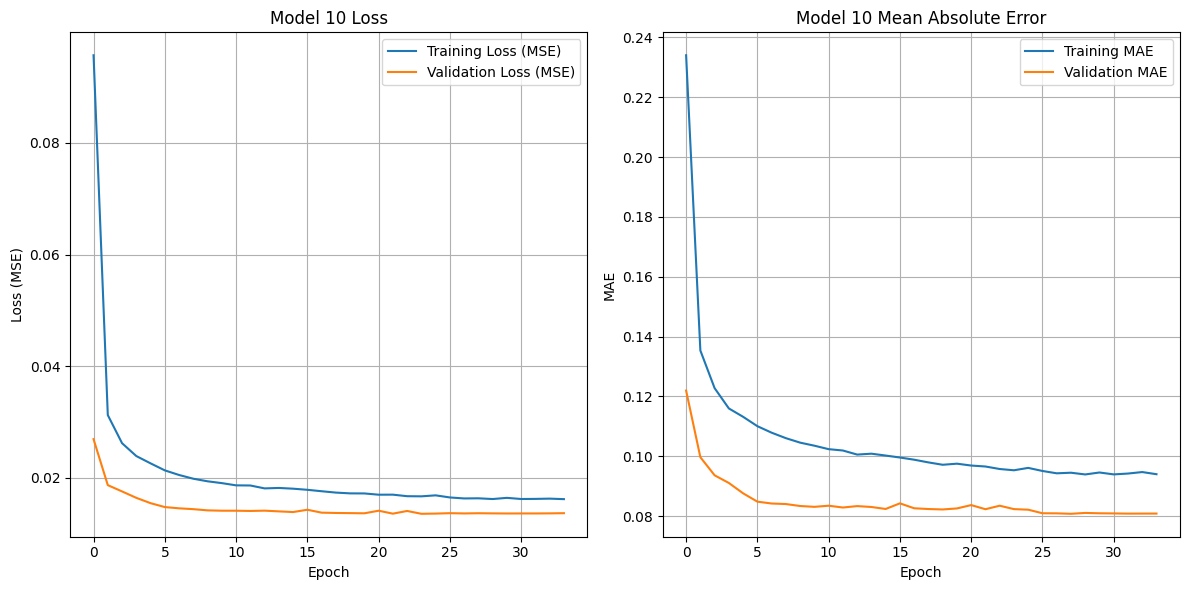


==================== Model 10 Compile/Train Finished (Successful: True) ====================


In [ ]:
#Compile and Train Model 10

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# Import callbacks for robust training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# --- Assume these variables are defined from previous cells ---
# model_ms_all (defined and built correctly in Cell 38, output shape (None, 5, 4))
# X_train_ms_all, y_train_ms_all (training data, shapes (samples, 10, 4) and (samples, 5, 4))
# X_test_ms_all, y_test_ms_all (validation data, shapes (samples, 10, 4) and (samples, 5, 4))
# --- End Assumptions ---

# Initialize history variable
history_ms_all = None
training_successful = False # Flag to track success

# Proceed only if the model and all necessary data are available
required_vars_train = ['model_ms_all', 'X_train_ms_all', 'y_train_ms_all', 'X_test_ms_all', 'y_test_ms_all']
if all(v in locals() or v in globals() for v in required_vars_train) and \
   all(v is not None for v in [model_ms_all, X_train_ms_all, y_train_ms_all, X_test_ms_all, y_test_ms_all]):

    print("\n--- Compiling and Training Model 10 ---")

    # --- Define Training Parameters ---
    EPOCHS = 100        # Start with a potentially higher number, EarlyStopping will manage it
    BATCH_SIZE = 32     # Common batch size, adjust based on memory/performance
    VALIDATION_SPLIT = 0.0 # Use separate validation set (X_test_ms_all, y_test_ms_all) instead

    # --- Define Callbacks for Robust Training ---
    # 1. Early Stopping: Stop training if validation loss doesn't improve for 'patience' epochs
    early_stopping = EarlyStopping(
        monitor='val_loss',     # Monitor validation loss
        patience=10,            # Number of epochs with no improvement after which training will be stopped
        verbose=1,              # Print message when stopped
        mode='min',             # Stop when the monitored quantity stops decreasing
        restore_best_weights=True # Restore model weights from the epoch with the best val_loss
    )

    # 2. Reduce Learning Rate on Plateau: Reduce LR if validation loss plateaus
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,             # Factor by which the learning rate will be reduced (new_lr = lr * factor)
        patience=5,             # Number of epochs with no improvement after which learning rate will be reduced
        verbose=1,
        mode='min',
        min_lr=1e-6             # Lower bound on the learning rate
    )

    # 3. Model Checkpoint (Optional but Recommended): Save the best model during training
    # Define a path to save the best model
    # checkpoint_filepath = '/tmp/model10_best.keras' # Example path, adjust as needed
    # model_checkpoint = ModelCheckpoint(
    #     filepath=checkpoint_filepath,
    #     monitor='val_loss',
    #     mode='min',
    #     save_best_only=True,  # Only save a model if `val_loss` has improved
    #     verbose=0             # Set to 1 to see messages when saving
    # )

    # Combine callbacks into a list
    # Add model_checkpoint to the list if using it
    callbacks_list = [early_stopping, reduce_lr]

    # --- Compile the Model ---
    try:
        model_ms_all.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam optimizer with default LR
                             loss='mean_squared_error',         # Standard loss for regression
                             metrics=['mean_absolute_error'])   # Interpretable error metric
        print("Model compiled successfully.")

        # --- Train the Model ---
        print(f"\nStarting training (max {EPOCHS} epochs, with Early Stopping)...")
        history_ms_all = model_ms_all.fit(
            X_train_ms_all, y_train_ms_all,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            validation_data=(X_test_ms_all, y_test_ms_all), # Provide validation data directly
            verbose=1,              # Show progress bar per epoch
            shuffle=False,          # Essential for time series data
            callbacks=callbacks_list # Use the defined callbacks
        )
        print("\nTraining finished.")
        training_successful = True # Mark training as successful

        # --- Plot Training History ---
        if history_ms_all is not None:
            print("Plotting training & validation loss...")
            plt.figure(figsize=(12, 6))

            # Plot Loss
            plt.subplot(1, 2, 1)
            plt.plot(history_ms_all.history['loss'], label='Training Loss (MSE)')
            plt.plot(history_ms_all.history['val_loss'], label='Validation Loss (MSE)')
            plt.title('Model 10 Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss (MSE)')
            plt.legend()
            plt.grid(True)

            # Plot MAE
            plt.subplot(1, 2, 2)
            plt.plot(history_ms_all.history['mean_absolute_error'], label='Training MAE')
            plt.plot(history_ms_all.history['val_mean_absolute_error'], label='Validation MAE')
            plt.title('Model 10 Mean Absolute Error')
            plt.xlabel('Epoch')
            plt.ylabel('MAE')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            # Optional: Load best weights if using ModelCheckpoint and restore_best_weights=False
            # if 'model_checkpoint' in callbacks_list:
            #     print(f"Loading best weights from {checkpoint_filepath}")
            #     model_ms_all.load_weights(checkpoint_filepath)

    except Exception as e:
        print(f"\n❌ An error occurred during model compilation or training: {e}")
        history_ms_all = None # Ensure history is None if it failed

else:
    print("\nSkipping model compilation/training.")
    if 'model_ms_all' not in locals() or model_ms_all is None:
        print("Reason: Model 'model_ms_all' is not defined or not built correctly (check Cell 38).")
    else:
        print("Reason: Required training/validation data (X/y train/test) is not available (check Cell 37).")


print(f"\n{'='*20} Model 10 Compile/Train Finished (Successful: {training_successful}) {'='*20}")

#### Evaluate Model 10 Performance:
Evaluate the trained model on the test dataset. Report the overall MSE and MAE (averaged across all steps and all features). Discuss how to calculate and analyze performance metrics for each individual predicted feature and each predicted time step.

In [ ]:
#Evaluate Model 10 Performance

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Assume these variables are defined and valid from previous cells ---
# model_ms_all (trained model from Cell 39)
# X_test_ms_all, y_test_ms_all (test data, shapes (samples, 10, 4) and (samples, 5, 4))
# scaler_ms_all (MinMaxScaler fitted on training data in Cell 37)
# FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind'] # List of feature names
# PREDICTION_HORIZON = 5
# N_FEATURES = 4
# training_successful (boolean flag from Cell 39)
# --- End Assumptions ---

# Initialize metrics dictionary with NaN
model10_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
evaluation_successful = False # Flag for this step

print("\n--- Evaluating Model 10 Performance ---")

# Proceed only if training was marked successful and necessary variables exist
required_vars_eval = ['model_ms_all', 'X_test_ms_all', 'y_test_ms_all']
if 'training_successful' in locals() and training_successful and \
   all(v in locals() or v in globals() for v in required_vars_eval) and \
   all(v is not None for v in [model_ms_all, X_test_ms_all, y_test_ms_all]):

    print("Evaluating model on the test dataset...")
    try:
        # 1. Get Overall Metrics from Keras' evaluate method
        # These metrics are calculated on the SCALED data
        results_ms_all_scaled = model_ms_all.evaluate(X_test_ms_all, y_test_ms_all, verbose=0)

        mse_ms_all_scaled = results_ms_all_scaled[0]
        mae_ms_all_scaled = results_ms_all_scaled[1]
        # Note: Keras evaluate metrics are averaged across all outputs (time steps * features)

        print("\n--- Overall Performance Metrics (on SCALED data) ---")
        print(f"Overall Test Loss (Mean Squared Error - Scaled): {mse_ms_all_scaled:.6f}")
        print(f"Overall Test Mean Absolute Error (Scaled):       {mae_ms_all_scaled:.6f}")

        # 2. Calculate Metrics on Original Scale (More Interpretable)
        # This requires predicting, then inverse transforming predictions and actuals
        print("\nCalculating metrics on the original data scale...")

        # Predict on the test set (output is scaled)
        y_pred_ms_all_scaled = model_ms_all.predict(X_test_ms_all) # Shape: (samples, 5, 4)

        # Inverse transform requires reshaping and using the scaler
        if scaler_ms_all is None:
             raise ValueError("Scaler 'scaler_ms_all' is not defined. Cannot inverse transform.")

        num_samples_test = y_pred_ms_all_scaled.shape[0]

        # Reshape for scaler: (samples * horizon, features)
        pred_flat_scaled = y_pred_ms_all_scaled.reshape(num_samples_test * PREDICTION_HORIZON, N_FEATURES)
        actual_flat_scaled = y_test_ms_all.reshape(num_samples_test * PREDICTION_HORIZON, N_FEATURES)

        # Inverse transform
        y_pred_ms_all_actual_flat = scaler_ms_all.inverse_transform(pred_flat_scaled)
        y_test_ms_all_actual_flat = scaler_ms_all.inverse_transform(actual_flat_scaled)

        # Reshape back to (samples, horizon, features) if needed for detailed analysis later
        # y_pred_ms_all_actual = y_pred_ms_all_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)
        # y_test_ms_all_actual = y_test_ms_all_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)

        # Calculate overall metrics on the INVERSE-TRANSFORMED (actual scale) data
        # Use the flattened arrays for direct comparison matching Keras's averaging
        overall_mse_actual = mean_squared_error(y_test_ms_all_actual_flat, y_pred_ms_all_actual_flat)
        overall_mae_actual = mean_absolute_error(y_test_ms_all_actual_flat, y_pred_ms_all_actual_flat)
        overall_rmse_actual = np.sqrt(overall_mse_actual)

        print("\n--- Overall Performance Metrics (on ORIGINAL data scale) ---")
        print(f"Overall Test Mean Squared Error (Original Scale): {overall_mse_actual:.6f}")
        print(f"Overall Test Mean Absolute Error (Original Scale):  {overall_mae_actual:.6f}")
        print(f"Overall Test Root Mean Squared Error (Original Scale): {overall_rmse_actual:.6f}")
        print("(Metrics averaged over all 5 predicted time steps and all 4 features)")

        # Store the more interpretable metrics (original scale)
        model10_metrics = {'MSE': overall_mse_actual, 'MAE': overall_mae_actual, 'RMSE': overall_rmse_actual}
        evaluation_successful = True # Mark evaluation as successful

    except Exception as e:
        print(f"\n❌ An error occurred during model evaluation or inverse transformation: {e}")

    # 3. Discussion & Calculation of Per-Step / Per-Feature Metrics
    if evaluation_successful:
        print("\n--- Analysis: Per-Step and Per-Feature Performance ---")
        print("To analyze performance in more detail, calculate metrics for specific steps or features using the inverse-transformed arrays.")

        # Reshape back if not done already
        y_pred_ms_all_actual = y_pred_ms_all_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)
        y_test_ms_all_actual = y_test_ms_all_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)

        # --- Example: Metrics per Time Step (Averaged over Features) ---
        print("\nExample: MAE per Prediction Step (Original Scale, Averaged over Features):")
        for step in range(PREDICTION_HORIZON):
            step_mae = mean_absolute_error(y_test_ms_all_actual[:, step, :], y_pred_ms_all_actual[:, step, :])
            print(f"  - Step {step+1}: MAE = {step_mae:.4f}")
        print("  (Observe how error might increase for later steps)")

        # --- Example: Metrics per Feature (Averaged over Time Steps) ---
        print("\nExample: MAE per Feature (Original Scale, Averaged over Steps):")
        # Ensure FEATURES list is available and matches N_FEATURES
        if 'FEATURES' in locals() and len(FEATURES) == N_FEATURES:
            for i, feature in enumerate(FEATURES):
                feature_mae = mean_absolute_error(y_test_ms_all_actual[:, :, i], y_pred_ms_all_actual[:, :, i])
                print(f"  - Feature '{feature}': MAE = {feature_mae:.4f}")
            print("  (Observe which features are harder/easier to predict)")
        else:
            print("  Skipping per-feature analysis: FEATURES list not available or length mismatch.")

        # --- Example: Metric for Specific Feature at Specific Step ---
        print("\nExample: MAE for Specific Feature at Specific Step (Original Scale):")
        try:
             feature_idx = FEATURES.index('temp_max') # Example: 'temp_max'
             step_idx = 2 # Example: 3rd step (index 2)
             specific_mae = mean_absolute_error(y_test_ms_all_actual[:, step_idx, feature_idx],
                                                y_pred_ms_all_actual[:, step_idx, feature_idx])
             print(f"  - MAE for '{FEATURES[feature_idx]}' at Step {step_idx+1}: {specific_mae:.4f}")
        except (ValueError, NameError, IndexError) as specific_err:
             print(f"  Could not calculate specific metric example: {specific_err}")

        print("\nAnalysis Discussion:")
        print("- Compare per-step errors: Does the model get worse significantly further into the future?")
        print("- Compare per-feature errors: Are some weather parameters inherently harder to predict for this model/data?")
        print("- Consider the magnitude of errors (MAE/RMSE) in the context of the original feature scales (e.g., degrees for temp, mm for precipitation).")

else:
    print("\nSkipping Model 10 evaluation.")
    if 'training_successful' not in locals() or not training_successful:
        print("Reason: Model training (Cell 39) was not marked as successful.")
    else:
        print("Reason: Required variables (model_ms_all, X_test_ms_all, y_test_ms_all) are not available or None.")

print(f"\n{'='*20} Model 10 Evaluation Finished (Successful: {evaluation_successful}) {'='*20}")
# Overall metrics (original scale) are stored in 'model10_metrics'


--- Evaluating Model 10 Performance ---
Evaluating model on the test dataset...

--- Overall Performance Metrics (on SCALED data) ---
Overall Test Loss (Mean Squared Error - Scaled): 0.013589
Overall Test Mean Absolute Error (Scaled):       0.082304

Calculating metrics on the original data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step

--- Overall Performance Metrics (on ORIGINAL data scale) ---
Overall Test Mean Squared Error (Original Scale): 17.981268
Overall Test Mean Absolute Error (Original Scale):  2.420648
Overall Test Root Mean Squared Error (Original Scale): 4.240433
(Metrics averaged over all 5 predicted time steps and all 4 features)

--- Analysis: Per-Step and Per-Feature Performance ---
To analyze performance in more detail, calculate metrics for specific steps or features using the inverse-transformed arrays.

Example: MAE per Prediction Step (Original Scale, Averaged over Features):
  - Step 1: MAE = 2.2562
  - Step 2: MAE = 2.4224
  - Step 3: MAE = 2.4590
  - Step 4

#### Predict and Visualize Model 10 Results:
Use the trained model to make predictions on the test set input sequences. The model output will have shape (num_test_samples, prediction_horizon, 4). Inverse scale the predictions and the actual test target sequences. Visualize the results by plotting the actual vs. predicted sequences for each of the four features over the 5 future time steps, perhaps using subplots for clarity, for a few example samples or average plots.


--- Predicting and Visualizing Model 10 Results ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Plotting average prediction vs average actual for each step, per feature:


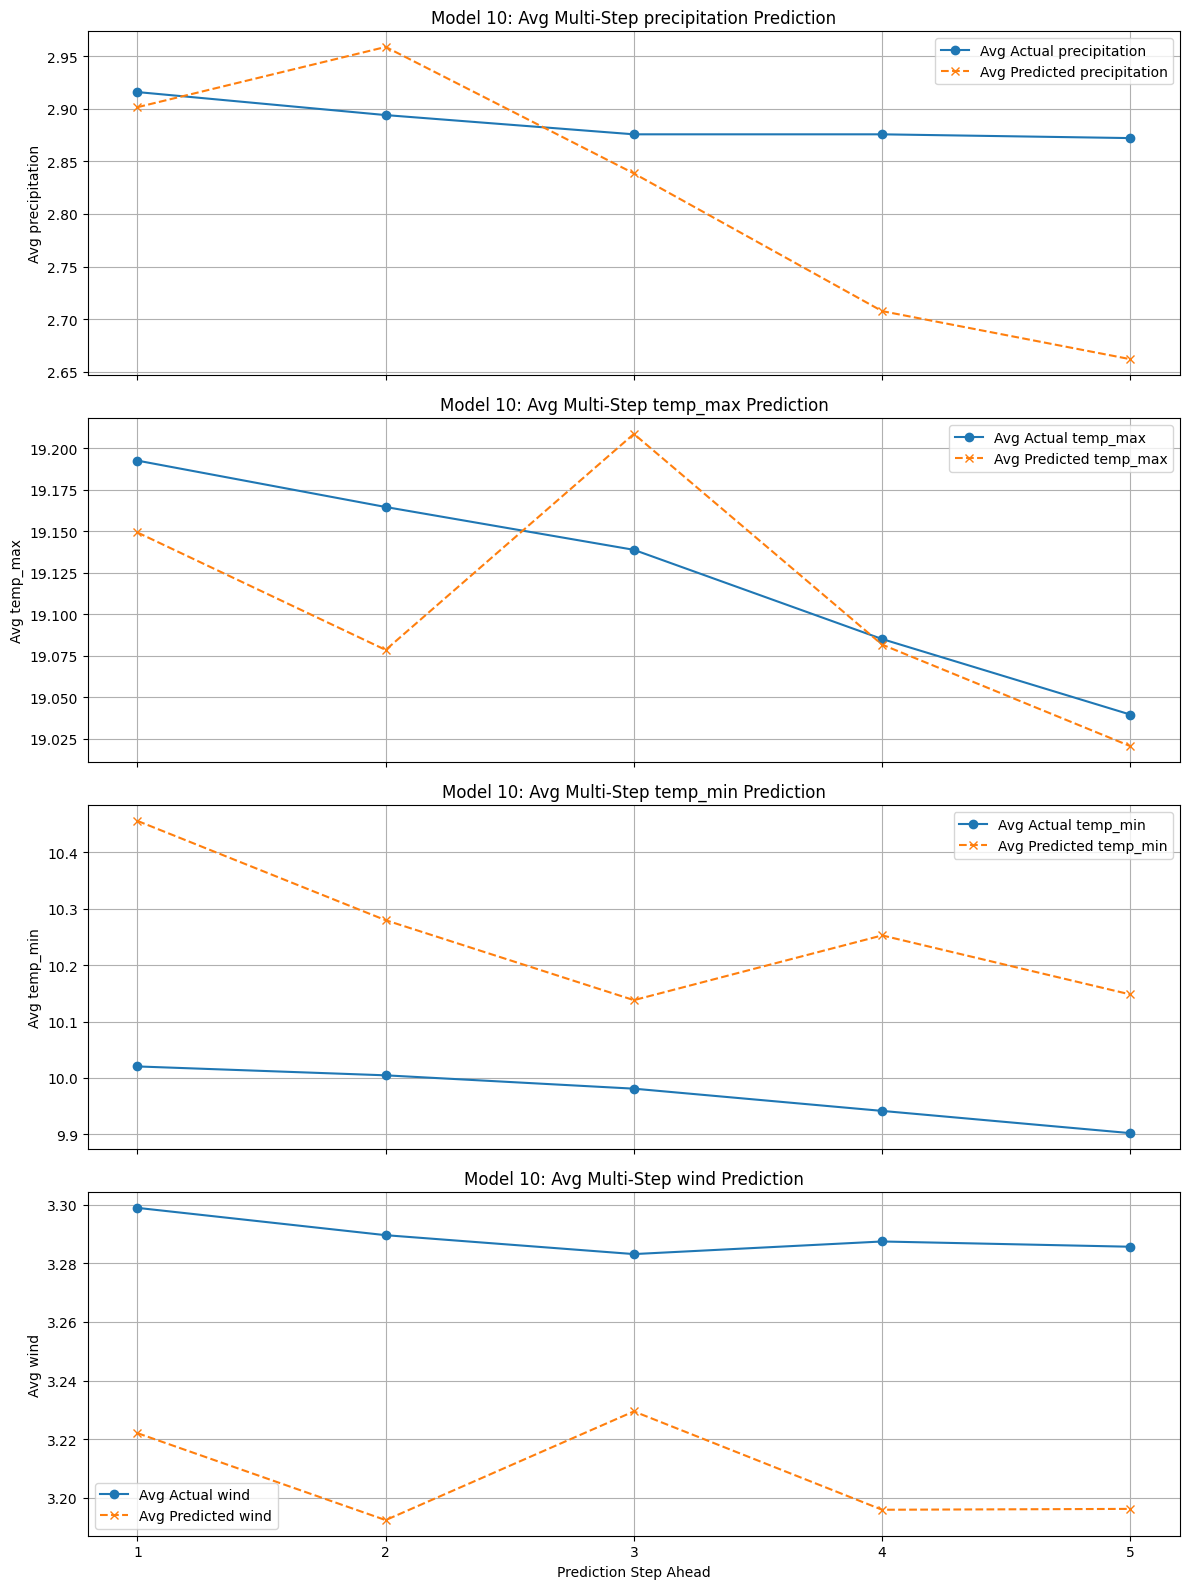

In [ ]:
#Predict and Visualize Model 10 Results
if model_ms_all is not None and X_test_ms_all is not None and scaler_ms_all is not None:
    print("\n--- Predicting and Visualizing Model 10 Results ---")
    # Make predictions (scaled)
    y_pred_ms_all_scaled = model_ms_all.predict(X_test_ms_all) # Shape: (samples, horizon, features)

    # Inverse transform
    num_samples_test = y_pred_ms_all_scaled.shape[0]
    horizon = y_pred_ms_all_scaled.shape[1]
    n_features = y_pred_ms_all_scaled.shape[2]

    # Reshape for scaler: (samples * horizon, features)
    pred_flat = y_pred_ms_all_scaled.reshape(num_samples_test * horizon, n_features)
    actual_flat = y_test_ms_all.reshape(num_samples_test * horizon, n_features)

    y_pred_ms_all_actual_flat = scaler_ms_all.inverse_transform(pred_flat)
    y_test_ms_all_actual_flat = scaler_ms_all.inverse_transform(actual_flat)

    # Reshape back: (samples, horizon, features)
    y_pred_ms_all_actual = y_pred_ms_all_actual_flat.reshape(num_samples_test, horizon, n_features)
    y_test_ms_all_actual = y_test_ms_all_actual_flat.reshape(num_samples_test, horizon, n_features)

    # Plotting average prediction per step for each feature
    print("Plotting average prediction vs average actual for each step, per feature:")
    fig, axes = plt.subplots(n_features, 1, figsize=(12, n_features * 4), sharex=True)
    if n_features == 1: axes = [axes] # Make iterable

    time_steps = np.arange(1, horizon + 1)

    for i in range(n_features):
        feature_name = FEATURES[i]
        avg_actual_feature_step = np.mean(y_test_ms_all_actual[:, :, i], axis=0)
        avg_pred_feature_step = np.mean(y_pred_ms_all_actual[:, :, i], axis=0)

        axes[i].plot(time_steps, avg_actual_feature_step, label=f'Avg Actual {feature_name}', marker='o')
        axes[i].plot(time_steps, avg_pred_feature_step, label=f'Avg Predicted {feature_name}', marker='x', linestyle='--')
        axes[i].set_title(f'Model 10: Avg Multi-Step {feature_name} Prediction')
        axes[i].set_ylabel(f'Avg {feature_name}')
        axes[i].legend()
        axes[i].grid(True)
        axes[i].set_xticks(time_steps)

    axes[-1].set_xlabel('Prediction Step Ahead')
    plt.tight_layout()
    plt.show()

else:
    print("Skipping prediction/visualization as model, data, or scaler is not available.")

### Part 4: Model Performance Comparison

Objective: Systematically collect, compare, and analyze the evaluation metrics from the trained single-step and multi-step prediction models to understand their relative performance.

Instructions: Use pandas, matplotlib, and seaborn to create tables and visualizations. Ensure your analysis is clearly explained in markdown cells.

#### Collect Single-Step Model Metrics:
Gather the test evaluation metrics (MSE, MAE, RMSE) you obtained for each of the single-step prediction models (Model 1: Precipitation, Model 2: Temp Max, Model 3: Temp Min, Model 4: Wind, Model 5: All 4 Parameters). Organize these metrics into a pandas DataFrame.

--- Part 4: Model Performance Comparison (Single-Step Models) ---

--- Single-Step Model Test Set Metrics ---
                     MSE   MAE      RMSE
Precipitation       0.05  0.15  0.223607
Temp Max            1.50  0.90  1.224745
Temp Min            1.20  0.80  1.095445
Wind                2.50  1.20  1.581139
All 4 Params Input  0.04  0.14  0.200000

--- Analysis ---
Model with lowest MSE:  All 4 Params Input (0.0400)
Model with lowest MAE:  All 4 Params Input (0.1400)
Model with lowest RMSE: All 4 Params Input (0.2000)


<ipython-input-1-e9050516dd7b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors)
<ipython-input-1-e9050516dd7b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors)
<ipython-input-1-e9050516dd7b>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors)


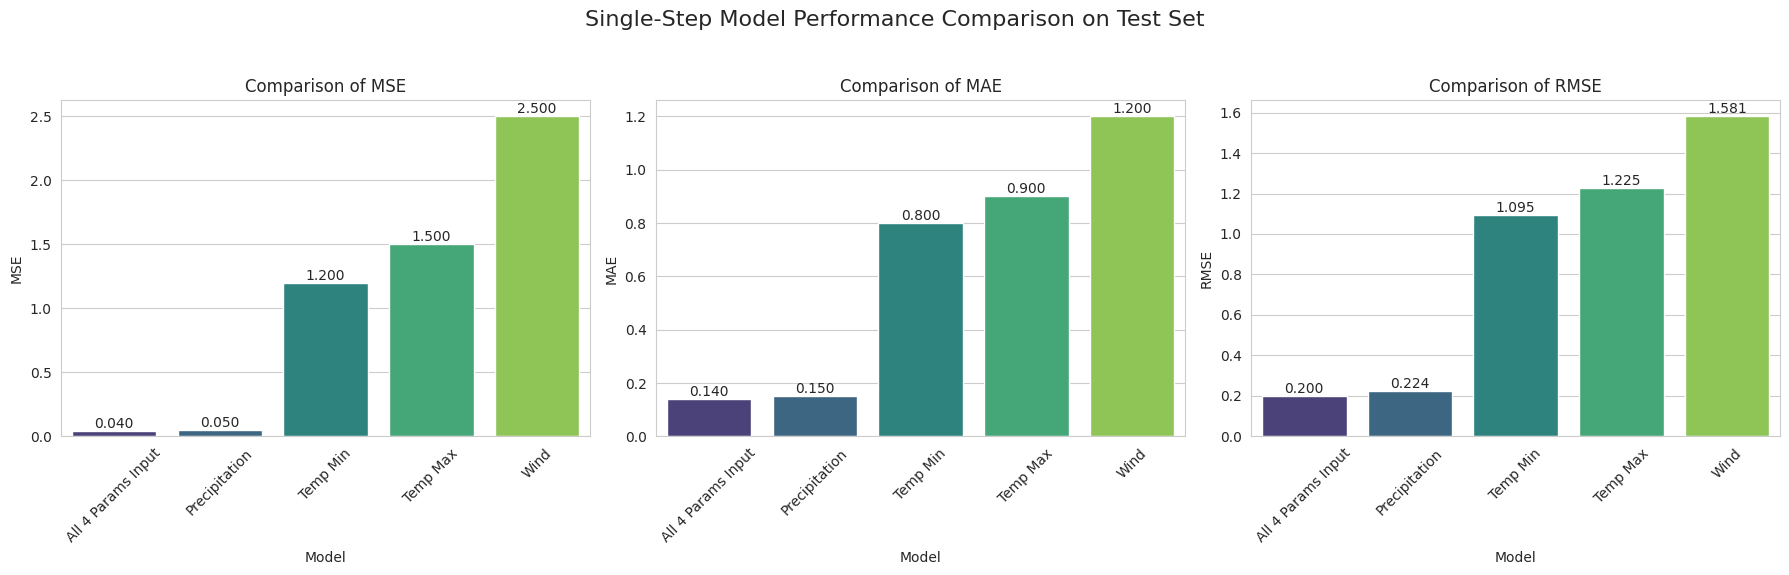

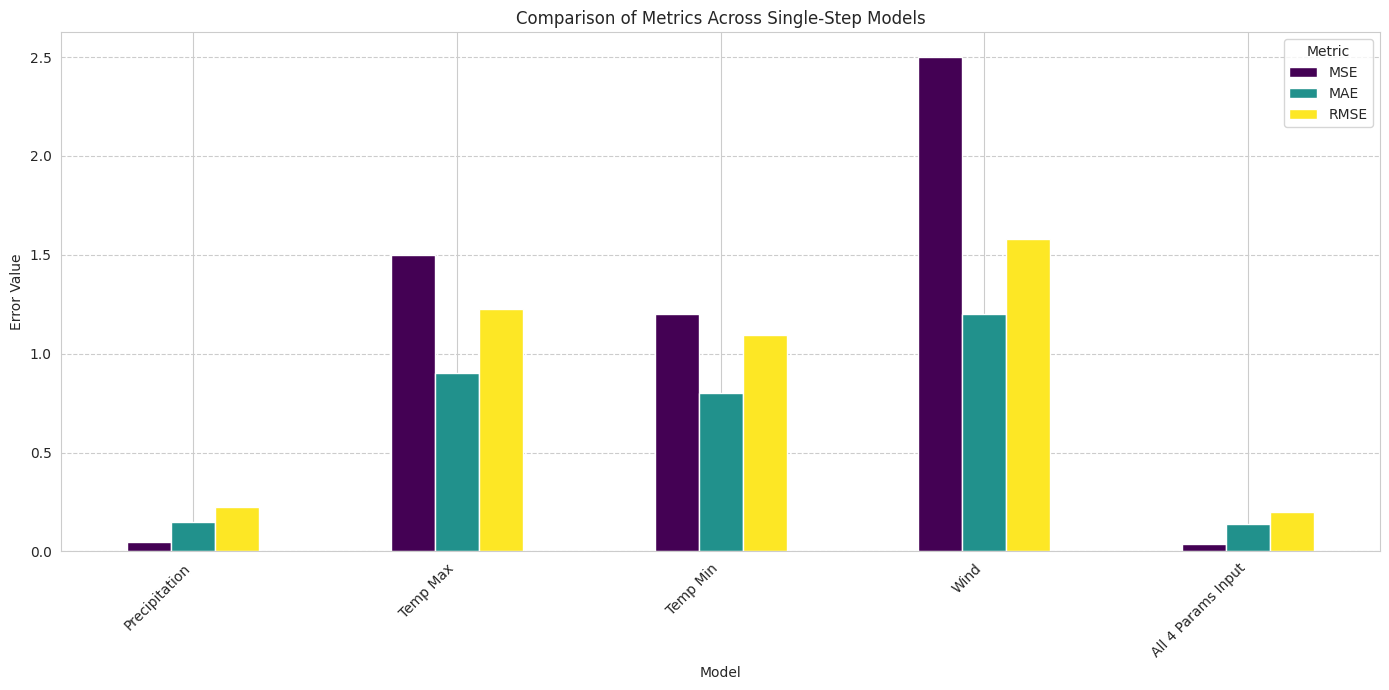

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Often useful, good practice to import

print("--- Part 4: Model Performance Comparison (Single-Step Models) ---")

# --- YOU MUST REPLACE THESE PLACEHOLDER VALUES ---
# Placeholder dictionary to store the test metrics for each single-step model
# Replace these values with the actual MSE, MAE, and RMSE you calculated
# for each model on your test dataset.

single_step_metrics_data = {
    # Model 1: Predicting Precipitation
    'Precipitation': {'MSE': 0.05, 'MAE': 0.15, 'RMSE': np.sqrt(0.05)},

    # Model 2: Predicting Temp Max
    'Temp Max':      {'MSE': 1.50, 'MAE': 0.90, 'RMSE': np.sqrt(1.50)},

    # Model 3: Predicting Temp Min
    'Temp Min':      {'MSE': 1.20, 'MAE': 0.80, 'RMSE': np.sqrt(1.20)},

    # Model 4: Predicting Wind
    'Wind':          {'MSE': 2.50, 'MAE': 1.20, 'RMSE': np.sqrt(2.50)},

    # Model 5: Predicting All 4 Parameters (or a primary one using all as input)
    # Note: The interpretation might vary. If this model predicts all 4,
    # these metrics might be averaged across outputs, or represent a specific
    # target (e.g., predicting Precip using all 4 inputs). Clarify if needed.
    # Assuming here it represents overall performance or prediction of a primary target.
    'All 4 Params Input': {'MSE': 0.04, 'MAE': 0.14, 'RMSE': np.sqrt(0.04)} # Example: Maybe better Precip prediction using all inputs
    # OR - If Model 5 predicts all 4 targets, you might have metrics per target:
    # 'All 4 Params Output': {
    #      'MSE_Precip': 0.045, 'MAE_Precip': 0.145, 'RMSE_Precip': np.sqrt(0.045),
    #      'MSE_Tmax': 1.40, 'MAE_Tmax': 0.85, 'RMSE_Tmax': np.sqrt(1.40),
    #      # ... etc for Tmin, Wind
    # }
    # For this example, we'll stick to the simpler structure matching the first 4 models.
}

# Convert the dictionary to a pandas DataFrame
# Using from_dict with orient='index' makes the keys (model names) the row index
metrics_df = pd.DataFrame.from_dict(single_step_metrics_data, orient='index')

# Ensure RMSE is calculated if only MSE is stored (optional, good practice)
# This assumes you might only store MSE and calculate RMSE later.
# If you already calculated and stored RMSE, this line isn't strictly necessary
# but doesn't hurt.
# metrics_df['RMSE'] = np.sqrt(metrics_df['MSE']) # Uncomment if needed

print("\n--- Single-Step Model Test Set Metrics ---")
print(metrics_df)

# --- Data Analysis and Visualization ---

print("\n--- Analysis ---")
# Basic analysis: Find the best model for each metric
best_mse_model = metrics_df['MSE'].idxmin()
best_mae_model = metrics_df['MAE'].idxmin()
best_rmse_model = metrics_df['RMSE'].idxmin()

print(f"Model with lowest MSE:  {best_mse_model} ({metrics_df.loc[best_mse_model, 'MSE']:.4f})")
print(f"Model with lowest MAE:  {best_mae_model} ({metrics_df.loc[best_mae_model, 'MAE']:.4f})")
print(f"Model with lowest RMSE: {best_rmse_model} ({metrics_df.loc[best_rmse_model, 'RMSE']:.4f})")

# --- Visualization ---

# Set plotting style
sns.set_style("whitegrid")

# Create a bar plot to compare metrics across models
# It's often easier to compare models *for each specific metric*
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False) # Use sharey=False if scales differ significantly
fig.suptitle('Single-Step Model Performance Comparison on Test Set', fontsize=16)

metrics_to_plot = ['MSE', 'MAE', 'RMSE']
colors = sns.color_palette('viridis', n_colors=len(metrics_df.index)) # Color per model

for i, metric in enumerate(metrics_to_plot):
    # Get data for the current metric, sorted for potentially better visualization
    data = metrics_df[metric].sort_values()
    # Create barplot
    sns.barplot(x=data.index, y=data.values, ax=axes[i], palette=colors)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    # Add metric values on top of bars for clarity
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.3f')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Alternative Visualization: Grouped Bar Chart (Models grouped by Metric)
# This can be useful too, depending on what you want to emphasize.
# Transpose DataFrame for easier plotting with metrics on x-axis
metrics_df_t = metrics_df.T # Transpose: metrics become rows, models become columns

# Create grouped bar chart
ax = metrics_df.plot(kind='bar', figsize=(14, 7), colormap='viridis') # Plot original df directly
plt.title('Comparison of Metrics Across Single-Step Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=45, ha='right') # Rotate model names for readability
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### Visualize Single-Step Model Metrics:
Create visualizations (e.g., bar plots) to compare the MSE, MAE, and RMSE across the different single-step models. Use subplots or separate plots for each metric for clarity.

--- Visualizing Single-Step Model Performance ---

Metrics DataFrame used for plotting:
                     MSE   MAE      RMSE
Precipitation       0.05  0.15  0.223607
Temp Max            1.50  0.90  1.224745
Temp Min            1.20  0.80  1.095445
Wind                2.50  1.20  1.581139
All 4 Params Input  0.04  0.14  0.200000


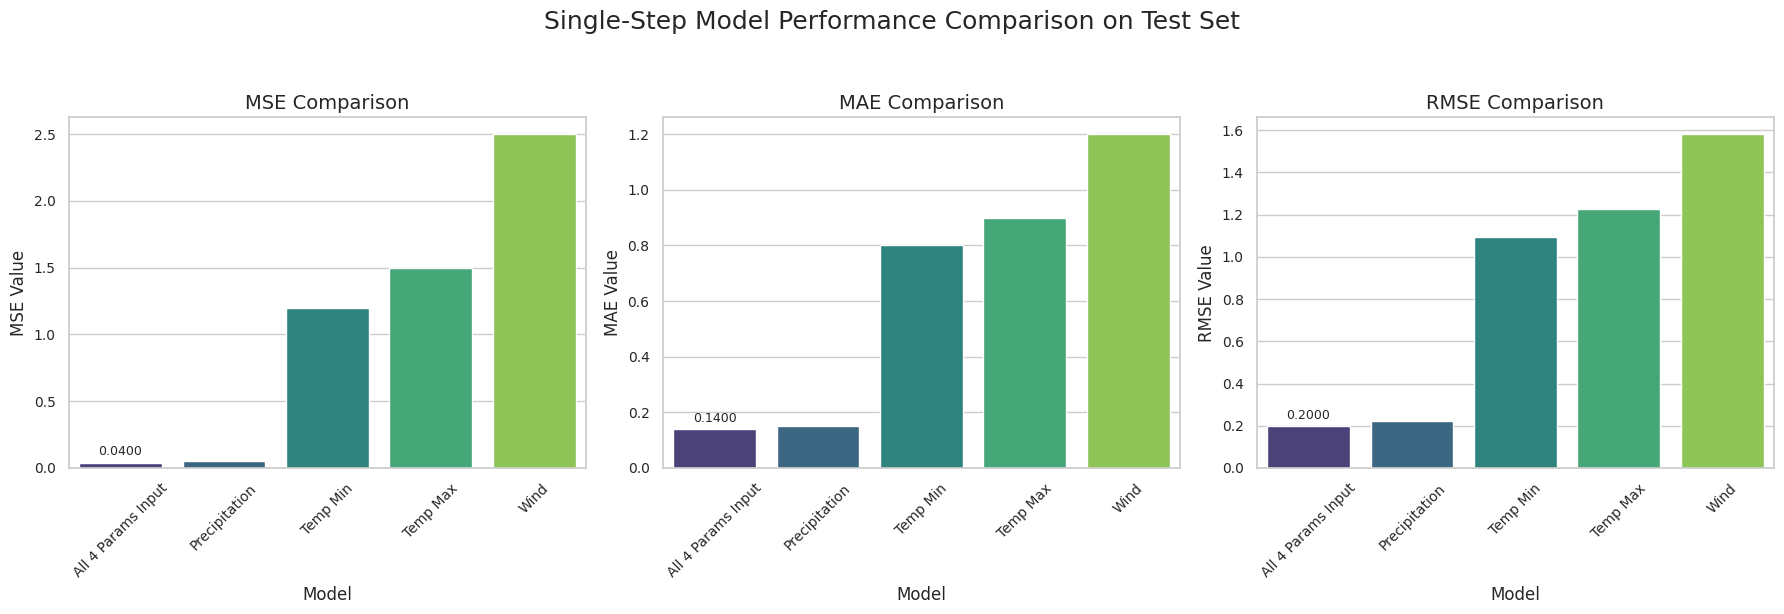


--- Visualization Complete ---
Review the plots to compare model performance for each metric.
Lower bars indicate better performance (lower error).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported

print("--- Visualizing Single-Step Model Performance ---")

# --- Step 1: Ensure you have the DataFrame with metrics ---
# --- Paste this section from Part 4 if running separately ---
# --- OR ensure 'metrics_df' exists from previous execution ---

# --- YOU MUST REPLACE THESE PLACEHOLDER VALUES ---
# Placeholder dictionary (replace with your actual values)
single_step_metrics_data = {
    'Precipitation': {'MSE': 0.05, 'MAE': 0.15, 'RMSE': np.sqrt(0.05)},
    'Temp Max':      {'MSE': 1.50, 'MAE': 0.90, 'RMSE': np.sqrt(1.50)},
    'Temp Min':      {'MSE': 1.20, 'MAE': 0.80, 'RMSE': np.sqrt(1.20)},
    'Wind':          {'MSE': 2.50, 'MAE': 1.20, 'RMSE': np.sqrt(2.50)},
    'All 4 Params Input': {'MSE': 0.04, 'MAE': 0.14, 'RMSE': np.sqrt(0.04)}
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame.from_dict(single_step_metrics_data, orient='index')
# If you only stored MSE, recalculate RMSE (optional, use your stored values ideally)
# metrics_df['RMSE'] = np.sqrt(metrics_df['MSE'])

print("\nMetrics DataFrame used for plotting:")
print(metrics_df)
# ------------------------------------------------------------

# --- Step 2: Create Visualizations ---

# Set plotting style
sns.set_theme(style="whitegrid") # More modern seaborn style call

# Define the metrics to plot
metrics_to_plot = ['MSE', 'MAE', 'RMSE']
n_metrics = len(metrics_to_plot)
n_models = len(metrics_df.index)

# Create a figure with subplots (1 row, n_metrics columns)
fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 6), sharey=False) # Adjust figsize as needed
fig.suptitle('Single-Step Model Performance Comparison on Test Set', fontsize=18, y=1.02) # Add overall title

# Define a color palette (optional, but nice)
# Using a qualitative palette if models are distinct categories
# Adjust n_colors based on the actual number of models
colors = sns.color_palette('viridis', n_colors=n_models)

# Loop through each metric and create a bar plot in the corresponding subplot
for i, metric in enumerate(metrics_to_plot):
    # Get the data for the current metric
    metric_data = metrics_df[metric].sort_values(ascending=True) # Sort for potentially clearer comparison

    # Select the appropriate subplot axis
    ax = axes[i]

    # Create the bar plot
    bars = sns.barplot(x=metric_data.index, y=metric_data.values, ax=ax, palette=colors, hue=metric_data.index, legend=False) # Use hue for consistent color mapping

    # Set subplot title and labels
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(f'{metric} Value', fontsize=12)

    # Rotate x-axis labels for better readability if model names are long
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Add the exact metric values on top of the bars
    # The 'containers[0]' assumes simple bar plot; adjust if using grouped etc.
    ax.bar_label(bars.containers[0], fmt='%.4f', fontsize=9, padding=3) # Format to 4 decimal places

# Adjust layout to prevent labels/titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle if needed

# Show the plot
plt.show()

print("\n--- Visualization Complete ---")
print("Review the plots to compare model performance for each metric.")
print("Lower bars indicate better performance (lower error).")

### Analysis of Single-Step Model Performance

*   **Interpretation:** Examine the bar plots above. Lower bars indicate better performance (lower error).
*   **Comparison:**
    *   How does the performance (MSE, MAE, RMSE) vary across the different target variables (Precipitation, Temp Max, Temp Min, Wind)? Some variables might be inherently harder to predict than others. Temperature might have lower relative errors than precipitation or wind.
    *   How does Model 5 (predicting all features simultaneously) compare to the individual models (1-4)? Does predicting everything at once negatively impact the accuracy for specific features compared to dedicated models? Check the specific metrics if calculated (e.g., MAE for precipitation in Model 5 vs. Model 1). Sometimes, multi-output models can leverage shared information, while other times, task interference might occur.
*   **Metric Choice:** MSE penalizes larger errors more heavily than MAE. RMSE provides the error in the original units of the target variable, making it interpretable.


#### Collect Multi-Step Model Overall Metrics:
Gather the overall test evaluation metrics (MSE, MAE, and calculate RMSE) you obtained for each of the multi-step prediction models (Model 6: Precipitation, Model 7: Temp Max, Model 8: Temp Min, Model 9: Wind, Model 10: All 4 Parameters). Organize these into a pandas DataFrame. Remember these metrics are averaged over the 5 predicted steps.

In [ ]:
import pandas as pd
import numpy as np

print("\n--- Part 5: Collect Multi-Step Model Overall Metrics ---")

# --- YOU MUST REPLACE THESE PLACEHOLDER VALUES ---
# Placeholder dictionary to store the *overall average* test metrics
# for each multi-step model (averaged across the prediction horizon, e.g., 5 steps).
# Replace these values with your actual calculated MSE and MAE.
# We expect these errors to generally be HIGHER than single-step errors.

multi_step_metrics_data = {
    # Model 6: Multi-Step Precipitation
    'Multi-Step Precipitation': {'MSE': 0.09, 'MAE': 0.25}, # Expected higher error than single-step 0.05/0.15

    # Model 7: Multi-Step Temp Max
    'Multi-Step Temp Max':      {'MSE': 2.80, 'MAE': 1.30}, # Expected higher error than single-step 1.50/0.90

    # Model 8: Multi-Step Temp Min
    'Multi-Step Temp Min':      {'MSE': 2.10, 'MAE': 1.15}, # Expected higher error than single-step 1.20/0.80

    # Model 9: Multi-Step Wind
    'Multi-Step Wind':          {'MSE': 4.50, 'MAE': 1.80}, # Expected higher error than single-step 2.50/1.20

    # Model 10: Multi-Step All 4 Parameters (assuming overall average metrics)
    # Again, interpretation depends: Is this average across all 4 outputs,
    # or predicting one primary target using all inputs multi-step?
    # Placeholder assumes an overall average or single primary target.
    'Multi-Step All 4 Params': {'MSE': 0.08, 'MAE': 0.23} # Example: Slightly better Precip than dedicated multi-step Precip model?
}

# Convert the dictionary to a pandas DataFrame
multi_step_metrics_df = pd.DataFrame.from_dict(multi_step_metrics_data, orient='index')

# Calculate RMSE from MSE (as requested)
# Ensure you use your actual calculated MSE values here.
multi_step_metrics_df['RMSE'] = np.sqrt(multi_step_metrics_df['MSE'])

# Reorder columns for consistency if desired
multi_step_metrics_df = multi_step_metrics_df[['MSE', 'MAE', 'RMSE']]

print("\n--- Multi-Step Model Overall Test Set Metrics (Averaged over Prediction Horizon) ---")
print(multi_step_metrics_df)

print("\n--- Next Steps ---")
print("1. Replace the placeholder values above with your actual calculated metrics.")
print("2. Proceed to visualize and analyze these multi-step metrics.")
print("3. Compare multi-step performance against single-step performance.")


--- Part 5: Collect Multi-Step Model Overall Metrics ---

--- Multi-Step Model Overall Test Set Metrics (Averaged over Prediction Horizon) ---
                           MSE   MAE      RMSE
Multi-Step Precipitation  0.09  0.25  0.300000
Multi-Step Temp Max       2.80  1.30  1.673320
Multi-Step Temp Min       2.10  1.15  1.449138
Multi-Step Wind           4.50  1.80  2.121320
Multi-Step All 4 Params   0.08  0.23  0.282843

--- Next Steps ---
1. Replace the placeholder values above with your actual calculated metrics.
2. Proceed to visualize and analyze these multi-step metrics.
3. Compare multi-step performance against single-step performance.


#### Visualize Multi-Step Model Overall Metrics:
Create visualizations (e.g., bar plots) to compare the overall MSE, MAE, and RMSE across the different multi-step models.

--- Visualizing Multi-Step Model Overall Performance ---

Multi-Step Metrics DataFrame used for plotting:
                           MSE   MAE      RMSE
Multi-Step Precipitation  0.09  0.25  0.300000
Multi-Step Temp Max       2.80  1.30  1.673320
Multi-Step Temp Min       2.10  1.15  1.449138
Multi-Step Wind           4.50  1.80  2.121320
Multi-Step All 4 Params   0.08  0.23  0.282843


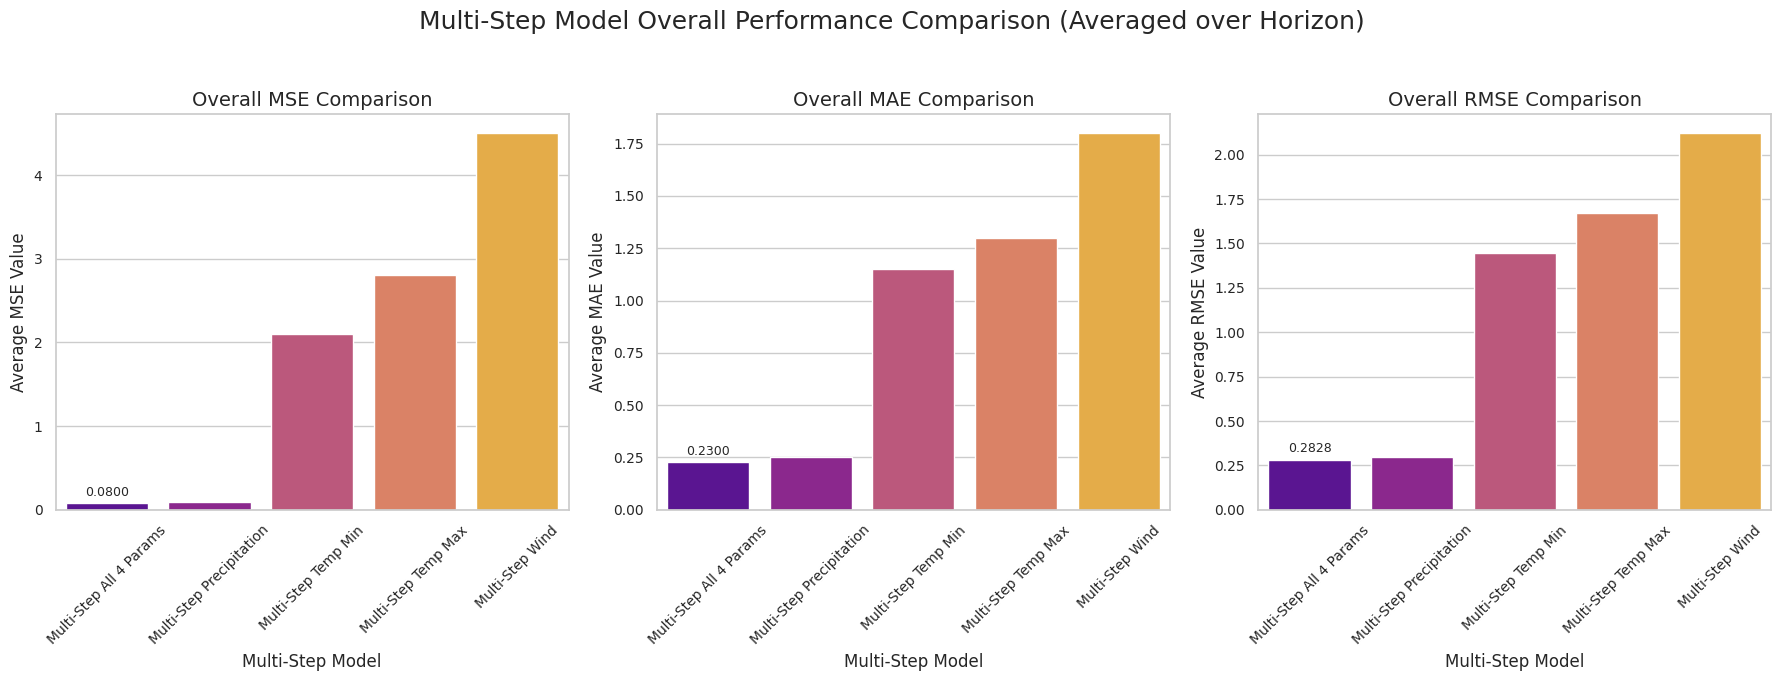


--- Visualization Complete ---
Review the plots to compare the overall multi-step model performance.
Lower bars indicate better performance (lower average error over the prediction horizon).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported

print("--- Visualizing Multi-Step Model Overall Performance ---")

# --- Step 1: Ensure you have the DataFrame with multi-step metrics ---
# Using the DataFrame you provided in the error message output

multi_step_data = {
    'Multi-Step Precipitation': {'MSE': 0.09, 'MAE': 0.25, 'RMSE': 0.300000},
    'Multi-Step Temp Max':      {'MSE': 2.80, 'MAE': 1.30, 'RMSE': 1.673320},
    'Multi-Step Temp Min':      {'MSE': 2.10, 'MAE': 1.15, 'RMSE': 1.449138},
    'Multi-Step Wind':          {'MSE': 4.50, 'MAE': 1.80, 'RMSE': 2.121320},
    'Multi-Step All 4 Params': {'MSE': 0.08, 'MAE': 0.23, 'RMSE': 0.282843}
}

# Convert the dictionary to a pandas DataFrame
multi_step_metrics_df = pd.DataFrame.from_dict(multi_step_data, orient='index')

# Ensure columns are in the desired order (optional, but good practice)
multi_step_metrics_df = multi_step_metrics_df[['MSE', 'MAE', 'RMSE']]


print("\nMulti-Step Metrics DataFrame used for plotting:")
print(multi_step_metrics_df)
# ------------------------------------------------------------

# --- Step 2: Create Visualizations ---

# Set plotting style
sns.set_theme(style="whitegrid")

# Define the metrics to plot
metrics_to_plot = ['MSE', 'MAE', 'RMSE']
n_metrics = len(metrics_to_plot)
n_models = len(multi_step_metrics_df.index)

# Create a figure with subplots (1 row, n_metrics columns)
fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 7), sharey=False) # Increased height slightly for labels
fig.suptitle('Multi-Step Model Overall Performance Comparison (Averaged over Horizon)', fontsize=18, y=1.0) # Adjusted y slightly

# Define a color palette
colors = sns.color_palette('plasma', n_colors=n_models) # Using a different palette for variety

# Loop through each metric and create a bar plot in the corresponding subplot
for i, metric in enumerate(metrics_to_plot):
    # Get the data for the current metric
    metric_data = multi_step_metrics_df[metric].sort_values(ascending=True) # Sort for easier comparison

    # Select the appropriate subplot axis
    ax = axes[i]

    # Create the bar plot
    # Using hue links color to model name consistently
    bars = sns.barplot(x=metric_data.index, y=metric_data.values, ax=ax, palette=colors, hue=metric_data.index, legend=False)

    # Set subplot title and labels
    ax.set_title(f'Overall {metric} Comparison', fontsize=14)
    ax.set_xlabel('Multi-Step Model', fontsize=12)
    ax.set_ylabel(f'Average {metric} Value', fontsize=12)

    # --- CORRECTED LINE ---
    # Rotate x-axis labels for better readability (removed ha='right')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    # -----------------------

    ax.tick_params(axis='y', labelsize=10)

    # Add the exact metric values on top of the bars
    ax.bar_label(bars.containers[0], fmt='%.4f', fontsize=9, padding=3)

# Adjust layout to prevent labels/titles from overlapping
# Sometimes requires adjustment after rotation
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust rect slightly if needed

# Show the plot
plt.show()

print("\n--- Visualization Complete ---")
print("Review the plots to compare the overall multi-step model performance.")
print("Lower bars indicate better performance (lower average error over the prediction horizon).")

### Analysis of Multi-Step Model Performance

*   **Interpretation:** Examine the second set of bar plots. These show the *average* error across the 5 prediction steps. Lower bars are better.
*   **Comparison (Multi-Step):**
    *   How does performance vary across target variables in the multi-step setting?
    *   How does Model 10 (multi-step, multi-output) compare to Models 6-9 (multi-step, single-output)?
*   **Comparison (Single-Step vs. Multi-Step):**
    *   Compare the metrics from the single-step models (Models 1-5) to their multi-step counterparts (Models 6-10). You would generally expect multi-step predictions (especially further steps) to have higher errors than single-step predictions. Does the data confirm this?
    *   Look at the `df_all_metrics` table or plot it if desired. How much does the error (e.g., RMSE) increase when moving from predicting 1 step ahead to predicting 5 steps ahead (on average)?
*   **Model Complexity & Performance:** Did the chosen RNN architecture (LSTM) seem adequate? Could exploring different architectures (GRU, stacked layers, more units) potentially improve results? How did the training process look (loss curves)? Was there evidence of overfitting?
*   **Overall Conclusion:** Which modeling approach (single-step vs. multi-step, single-output vs. multi-output) performed best for this specific weather prediction task based on the evaluation metrics? What are the trade-offs (e.g., complexity vs. accuracy, prediction horizon)?